# Science des reseaux sociaux - Spotify Project 
# Clara Luciani 

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports

import networkx as nx # import package networkx
import matplotlib.pyplot as plt # import matplotlib (to draw better graphs)
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import random
import collections
import community
import scipy.stats
from scipy.optimize import curve_fit
import csv
from scipy.stats import pearsonr
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import community
from sklearn.cluster import KMeans

# I - Create a graph - Super stars general network

In [3]:
# Read the edge list and create a directed graph
superstar_network = nx.read_edgelist('Clara_Luciani_Network_names.txt', comments="Node", create_using=nx.DiGraph(), delimiter=',', data=False)

## A - Basic properties of the graph - Version "all nodes" 

In [4]:
# Number of nodes and edges
superstar_network.number_of_nodes(), superstar_network.number_of_edges()

(412, 1995)

In [5]:
# See nodes
print(superstar_network.nodes())

['Clara Luciani', 'Juliette Armanet', 'Julien Doré', 'Hoshi', 'Zazie', 'Camélia Jordana', 'Eddy de Pretto', 'Les Frangines', '-M-', 'Grand Corps Malade', 'Calogero', 'Marc Lavoine', 'Angèle', 'Christophe Willem', 'Vianney', 'Jenifer', 'Gaëtan Roussel', 'Suzane', 'Benjamin Biolay', 'Michel Berger', 'Therapie TAXI', 'Izïa', 'Brigitte', 'Fishbach', 'Feu! Chatterton', 'Ben Mazué', 'Zaho de Sagazan', 'Véronique Sanson', 'Marie-Flore', 'Adé', 'Étienne Daho', 'Jean-Louis Aubert', 'Raphaël', 'Pascal Obispo', 'BB Brunes', 'Bénabar', 'Florent Pagny', 'Olivia Ruiz', 'Christophe Maé', 'Claudio Capéo', 'Trois Cafés Gourmands', 'Pierre de Maere', 'Boulevard des Airs', 'Mentissa', 'Louane', 'Arcadian', 'Slimane', 'Jérémy Frerot', 'Fréro Delavega', 'Nolwenn Leroy', 'Maurane', 'De Palmas', 'Yannick Noah', 'Axel Bauer', 'Les Enfoirés', 'Vanessa Paradis', 'Emmanuel Moire', 'Grégoire', 'Renan Luce', 'Élodie Frégé', 'Rose', 'La Grande Sophie', 'Joyce Jonathan', 'Anaïs', 'Yseult', 'Gaël Faye', 'Fauve', 'Tim

In [6]:
# See edges
print(superstar_network.edges())

[('Clara Luciani', 'Juliette Armanet'), ('Clara Luciani', 'Julien Doré'), ('Clara Luciani', 'Hoshi'), ('Clara Luciani', 'Zazie'), ('Clara Luciani', 'Camélia Jordana'), ('Clara Luciani', 'Eddy de Pretto'), ('Clara Luciani', 'Les Frangines'), ('Clara Luciani', '-M-'), ('Clara Luciani', 'Grand Corps Malade'), ('Clara Luciani', 'Calogero'), ('Clara Luciani', 'Marc Lavoine'), ('Clara Luciani', 'Angèle'), ('Clara Luciani', 'Christophe Willem'), ('Clara Luciani', 'Vianney'), ('Clara Luciani', 'Jenifer'), ('Clara Luciani', 'Gaëtan Roussel'), ('Clara Luciani', 'Suzane'), ('Clara Luciani', 'Benjamin Biolay'), ('Clara Luciani', 'Michel Berger'), ('Clara Luciani', 'Therapie TAXI'), ('Juliette Armanet', 'Clara Luciani'), ('Juliette Armanet', 'Izïa'), ('Juliette Armanet', 'Brigitte'), ('Juliette Armanet', 'Benjamin Biolay'), ('Juliette Armanet', 'Fishbach'), ('Juliette Armanet', 'Feu! Chatterton'), ('Juliette Armanet', 'Eddy de Pretto'), ('Juliette Armanet', 'Julien Doré'), ('Juliette Armanet', 'Ben

In [7]:
# Indegrees
superstar_network.in_degree()

InDegreeView({'Clara Luciani': 11, 'Juliette Armanet': 17, 'Julien Doré': 6, 'Hoshi': 17, 'Zazie': 18, 'Camélia Jordana': 9, 'Eddy de Pretto': 17, 'Les Frangines': 15, '-M-': 11, 'Grand Corps Malade': 6, 'Calogero': 7, 'Marc Lavoine': 17, 'Angèle': 4, 'Christophe Willem': 23, 'Vianney': 17, 'Jenifer': 22, 'Gaëtan Roussel': 19, 'Suzane': 14, 'Benjamin Biolay': 7, 'Michel Berger': 7, 'Therapie TAXI': 12, 'Izïa': 10, 'Brigitte': 7, 'Fishbach': 3, 'Feu! Chatterton': 10, 'Ben Mazué': 12, 'Zaho de Sagazan': 7, 'Véronique Sanson': 4, 'Marie-Flore': 5, 'Adé': 7, 'Étienne Daho': 6, 'Jean-Louis Aubert': 23, 'Raphaël': 17, 'Pascal Obispo': 18, 'BB Brunes': 5, 'Bénabar': 18, 'Florent Pagny': 11, 'Olivia Ruiz': 23, 'Christophe Maé': 9, 'Claudio Capéo': 17, 'Trois Cafés Gourmands': 14, 'Pierre de Maere': 5, 'Boulevard des Airs': 11, 'Mentissa': 6, 'Louane': 5, 'Arcadian': 13, 'Slimane': 8, 'Jérémy Frerot': 12, 'Fréro Delavega': 12, 'Nolwenn Leroy': 13, 'Maurane': 8, 'De Palmas': 14, 'Yannick Noah': 

In [8]:
# Outdegrees
superstar_network.out_degree()

OutDegreeView({'Clara Luciani': 20, 'Juliette Armanet': 20, 'Julien Doré': 20, 'Hoshi': 20, 'Zazie': 20, 'Camélia Jordana': 20, 'Eddy de Pretto': 20, 'Les Frangines': 20, '-M-': 20, 'Grand Corps Malade': 20, 'Calogero': 20, 'Marc Lavoine': 20, 'Angèle': 20, 'Christophe Willem': 20, 'Vianney': 20, 'Jenifer': 20, 'Gaëtan Roussel': 20, 'Suzane': 20, 'Benjamin Biolay': 20, 'Michel Berger': 20, 'Therapie TAXI': 20, 'Izïa': 20, 'Brigitte': 20, 'Fishbach': 20, 'Feu! Chatterton': 20, 'Ben Mazué': 20, 'Zaho de Sagazan': 20, 'Véronique Sanson': 20, 'Marie-Flore': 20, 'Adé': 20, 'Étienne Daho': 20, 'Jean-Louis Aubert': 20, 'Raphaël': 20, 'Pascal Obispo': 20, 'BB Brunes': 20, 'Bénabar': 20, 'Florent Pagny': 20, 'Olivia Ruiz': 20, 'Christophe Maé': 20, 'Claudio Capéo': 20, 'Trois Cafés Gourmands': 20, 'Pierre de Maere': 20, 'Boulevard des Airs': 20, 'Mentissa': 20, 'Louane': 20, 'Arcadian': 20, 'Slimane': 20, 'Jérémy Frerot': 20, 'Fréro Delavega': 20, 'Nolwenn Leroy': 20, 'Maurane': 20, 'De Palmas'

In [9]:
# Degree (= sum of in and outdegree)
superstar_network.degree()

DiDegreeView({'Clara Luciani': 31, 'Juliette Armanet': 37, 'Julien Doré': 26, 'Hoshi': 37, 'Zazie': 38, 'Camélia Jordana': 29, 'Eddy de Pretto': 37, 'Les Frangines': 35, '-M-': 31, 'Grand Corps Malade': 26, 'Calogero': 27, 'Marc Lavoine': 37, 'Angèle': 24, 'Christophe Willem': 43, 'Vianney': 37, 'Jenifer': 42, 'Gaëtan Roussel': 39, 'Suzane': 34, 'Benjamin Biolay': 27, 'Michel Berger': 27, 'Therapie TAXI': 32, 'Izïa': 30, 'Brigitte': 27, 'Fishbach': 23, 'Feu! Chatterton': 30, 'Ben Mazué': 32, 'Zaho de Sagazan': 27, 'Véronique Sanson': 24, 'Marie-Flore': 25, 'Adé': 27, 'Étienne Daho': 26, 'Jean-Louis Aubert': 43, 'Raphaël': 37, 'Pascal Obispo': 38, 'BB Brunes': 25, 'Bénabar': 38, 'Florent Pagny': 31, 'Olivia Ruiz': 43, 'Christophe Maé': 29, 'Claudio Capéo': 37, 'Trois Cafés Gourmands': 34, 'Pierre de Maere': 25, 'Boulevard des Airs': 31, 'Mentissa': 26, 'Louane': 25, 'Arcadian': 33, 'Slimane': 28, 'Jérémy Frerot': 32, 'Fréro Delavega': 32, 'Nolwenn Leroy': 33, 'Maurane': 28, 'De Palmas':

In [10]:
# Let's look at a node in particular, for example Juliette Armanet
superstar_network.in_degree('Juliette Armanet'), superstar_network.out_degree('Juliette Armanet'), superstar_network.degree('Juliette Armanet')

(17, 20, 37)

In [11]:
# Neighbours of node Juliette Armanet: predecessors
list(superstar_network.predecessors('Juliette Armanet'))

['Clara Luciani',
 'Julien Doré',
 'Camélia Jordana',
 'Eddy de Pretto',
 'Angèle',
 'Suzane',
 'Izïa',
 'Brigitte',
 'Fishbach',
 'Feu! Chatterton',
 'Ben Mazué',
 'Zaho de Sagazan',
 'Adé',
 'Pierre de Maere',
 'Yseult',
 'Tim Dup',
 'Pomme']

The predecessors of a node n are the nodes m such that there exists a directed edge from m to n.

Here the predecessors of a given artist A are all artists who recommends A. 

In [12]:
# Neighbours of node Juliette Armanet: successors
list(superstar_network.successors('Juliette Armanet'))

['Clara Luciani',
 'Izïa',
 'Brigitte',
 'Benjamin Biolay',
 'Fishbach',
 'Feu! Chatterton',
 'Eddy de Pretto',
 'Julien Doré',
 'Ben Mazué',
 'Zaho de Sagazan',
 'Camélia Jordana',
 '-M-',
 'Véronique Sanson',
 'Marie-Flore',
 'Gaëtan Roussel',
 'Adé',
 'Suzane',
 'Hoshi',
 'Étienne Daho',
 'Zazie']

The successors of a node n are the nodes h such that there exists a directed edge from n to h.

Here the successors of a given artist A are all artists who are recommended by A.

The number of successors for an artist will be always 20, because we know that all artists systematically recommend 20 other artists on Spotify.

In [13]:
# Neighbors of node Juliette Armanet --> we get the same results as the list of her predecessors
list(superstar_network.adj['Juliette Armanet'])

['Clara Luciani',
 'Izïa',
 'Brigitte',
 'Benjamin Biolay',
 'Fishbach',
 'Feu! Chatterton',
 'Eddy de Pretto',
 'Julien Doré',
 'Ben Mazué',
 'Zaho de Sagazan',
 'Camélia Jordana',
 '-M-',
 'Véronique Sanson',
 'Marie-Flore',
 'Gaëtan Roussel',
 'Adé',
 'Suzane',
 'Hoshi',
 'Étienne Daho',
 'Zazie']

In [14]:
# Let's choose another particular node, for example Clara Luciani
superstar_network.degree('Clara Luciani')

31

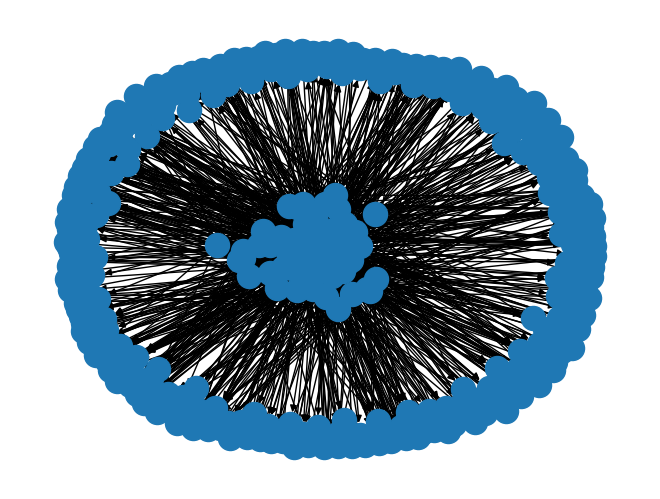

In [15]:
# plot superstar_network
nx.draw(superstar_network)
plt.show()

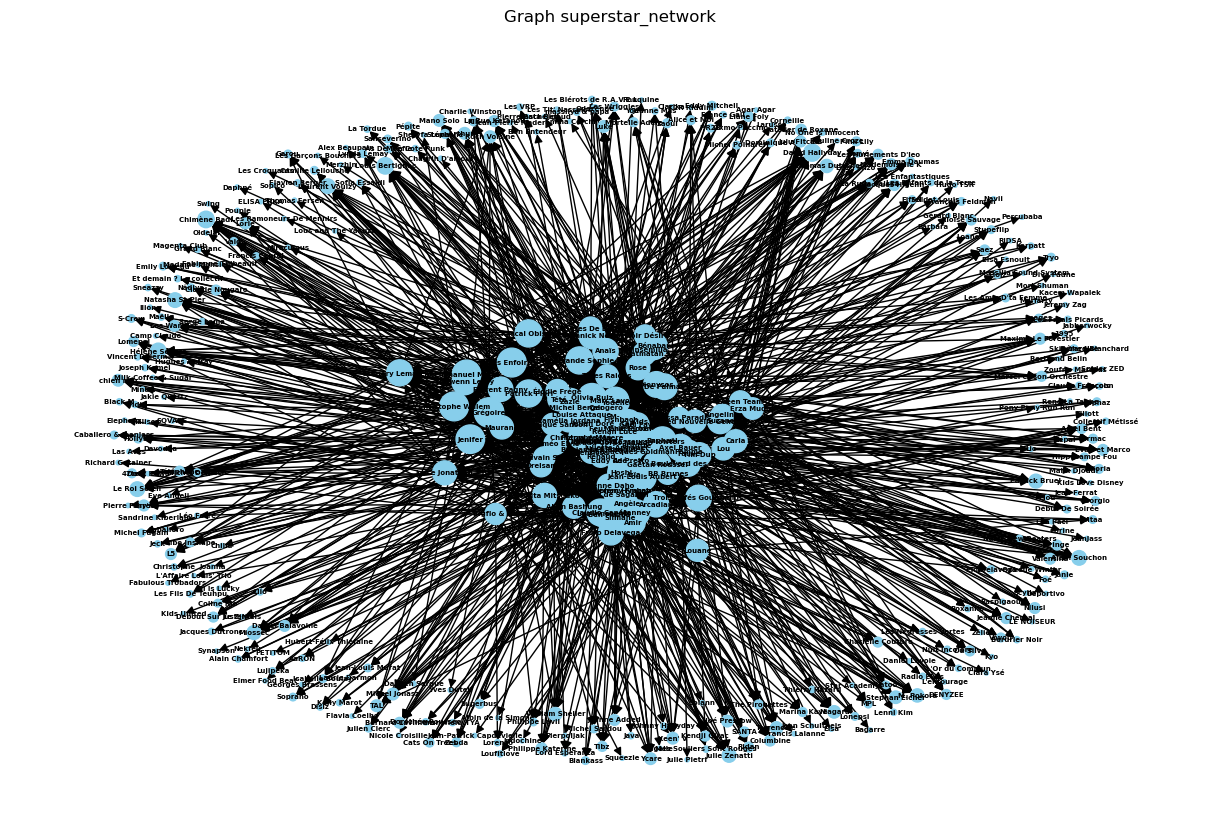

In [16]:
# Calculate the degrees (sum of in-degree and out-degree) of each node
degrees = {node: val for (node, val) in superstar_network.degree()}

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(superstar_network, with_labels=True, node_size=[v * 10 for v in degrees.values()], 
        node_color='skyblue', font_weight='bold', font_size=5, 
        arrowstyle='-|>', arrowsize=12)
plt.title("Graph superstar_network")
plt.show()


In [17]:
## Why does the difference between Graph and DiGraph matter?

# Let's see how many edges superstar_network (directed graph) has:
print(superstar_network.number_of_edges())

# Now, let's repeat the calculation with an undirected version of the superstar_network graph:
superstar_network_undirected = nx.read_edgelist('Clara_Luciani_Network_names.txt', comments="Node", create_using=nx.Graph(), delimiter=',', data=False)
print(superstar_network_undirected.number_of_edges())

1995
1671


The difference in the number of edges between the directed and undirected graphs is due to the fact that in a directed graph, each edge counts as a specific relationship from one entity to another, whereas in an undirected graph, a single edge counts as a relationship that can be considered in both directions between the same entities.

Thus, there are 1195 specific relationships in the directed network, whereas in the undirected network, some of these relationships are counted twice, as they are considered in both directions, thus reducing the total number of edges to 1671.

In our case, we really want to use directed graph, as recommendation between artists are not necessarily reciproqual. 

In [18]:
# Identify nodes without sucessors (i.e. nodes for which we couldn't scrap the recommendations because of API restrictions in the number of request)
no_successors = [node for node, out_degree in superstar_network.out_degree() if out_degree == 0]
print("Nodes without successeurs:", no_successors)

Nodes without successeurs: ['Daniel Balavoine', 'Patrick Bruel', 'David Hallyday', 'Laurent Voulzy', 'Julien Clerc', 'Alain Souchon', 'François Feldman', 'Michel Delpech', 'Eddy Mitchell', 'Lomepal', 'Amel Bent', 'Columbine', 'Vitaa', 'Soprano', 'Chimène Badi', 'Le Roi Soleil', 'Julie Zenatti', 'Natasha St-Pier', 'Hélène Ségara', 'L5', 'M. Pokora', 'Kendji Girac', 'Lorie', "Shy'm", 'TAL', 'Sheryfa Luna', 'Nâdiya', 'Tarmac', 'Da Silva', 'Miossec', 'Louis Bertignac', 'Stephan Eicher', 'Ycare', 'Luke', 'Aloïse Sauvage', 'Terrenoire', 'Alice et Moi', 'The Pirouettes', 'Hervé', 'Vincent Delerm', 'Alex Beaupain', 'Arthur H', 'Dominique A', 'Jean-Louis Murat', 'Jeanne Cherhal', 'Albin de la Simone', 'Thomas Dutronc', 'Jacques Higelin', 'Philippe Katerine', 'Bernard Lavilliers', 'William Sheller', 'Michel Polnareff', 'France Gall', 'Maxime Le Forestier', 'Michel Fugain', 'Michel Jonasz', 'Pierre Bachelet', 'Claude Nougaro', 'Claude François', 'Zaoui', '47ter', 'Bon Entendeur', 'Gringe', 'Holly

To ensure the integrity of our analysis, we opt to exclude nodes that haven't been fully scraped, meaning nodes lacking all 20 recommendations. This decision aims to mitigate potential bias in our results. The rationale is to prevent the inadvertent labeling of certain artists as poorly connected, without discerning whether this perception stems from genuine network characteristics or from the limitations of our ability to collect complete recommendation data due to API constraints.

## B - Version "without no successors nodes"

### B1 - Create a complete version of the graph

In [19]:
superstar_network_restricted = nx.DiGraph()

# Iterate through all nodes in G
for node in superstar_network.nodes():
    # Check if the node has at least 1 successor
    if superstar_network.out_degree(node) > 0:
        # Add the node to G_new
        superstar_network_restricted.add_node(node)
        
        # Also add all outgoing edges from this node to G_new
        for succ in superstar_network.successors(node):
            # Ensure the successor also has a node with successors before adding
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted.add_edge(node, succ)


Here, we create a restricted version of our directed graph. It iterates through each node in the original graph superstar_network and examines whether the node has at least 1 outgoing edges (successors). If a node meets this criterion, it is added to the restricted graph along with all of its outgoing edges. However, when adding the edges, it checks whether each successor node also has at least 1 outgoing edges before adding the edge. This process ensures that only nodes with 1 outgoing connections, as well as their related connections, are included in the restricted graph.

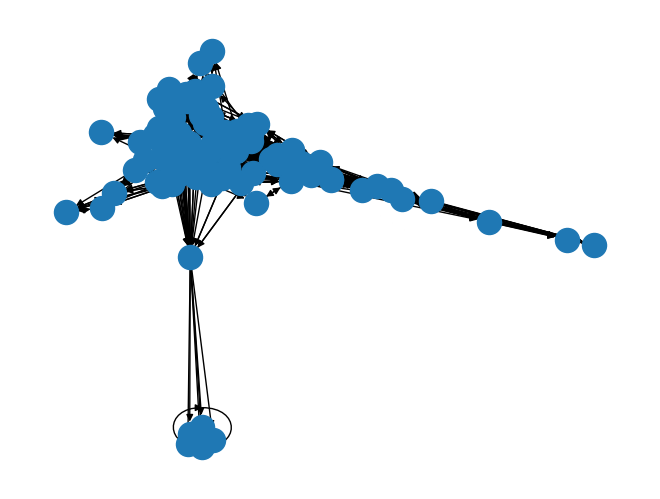

In [20]:
# Plot superstar_network
nx.draw(superstar_network_restricted)
plt.show()

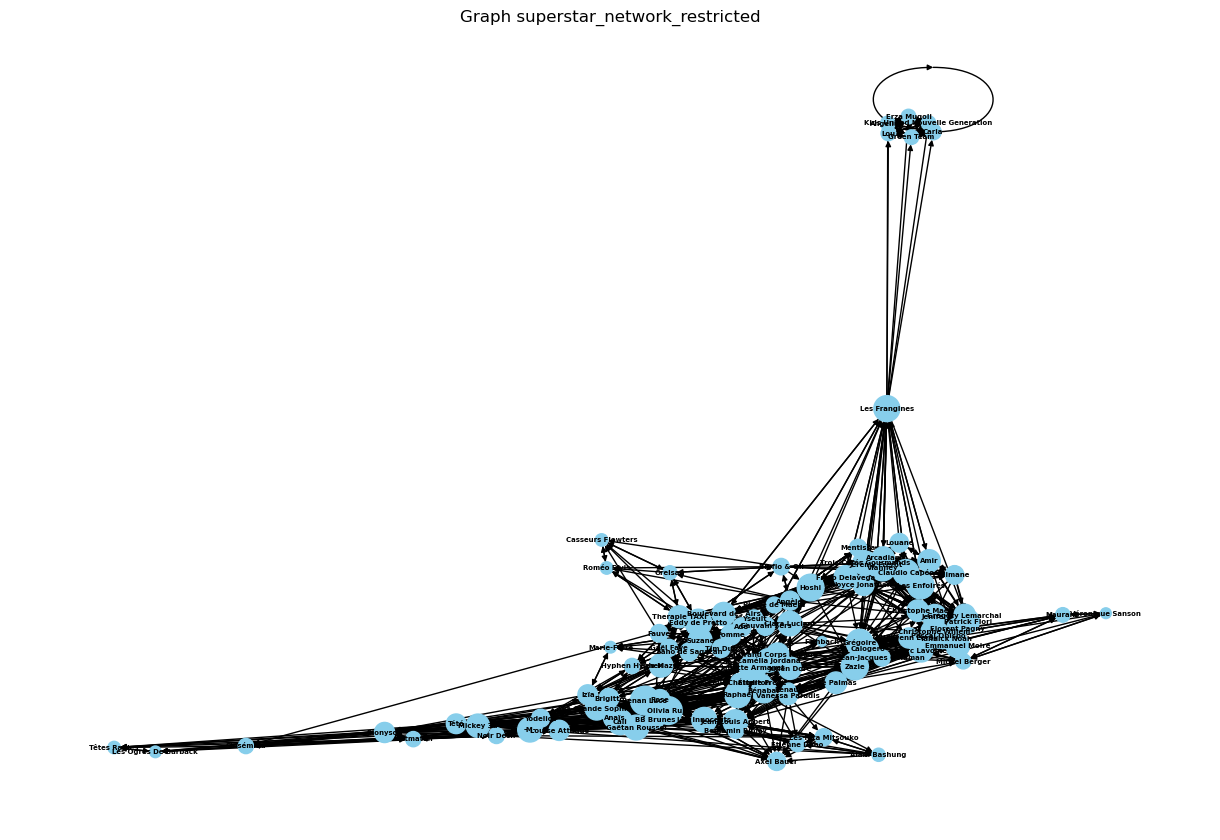

In [21]:
# Calculate the degrees (sum of in-degree and out-degree) of each node
degrees = {node: val for (node, val) in superstar_network_restricted.degree()}

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(superstar_network_restricted, with_labels=True, node_size=[v * 10 for v in degrees.values()], 
        node_color='skyblue', font_weight='bold', font_size=5, 
        arrowstyle='-|>', arrowsize=8)
plt.title("Graph superstar_network_restricted")
plt.show()

### B2 - Basic properties of graph

In [22]:
# Number of nodes and edges
superstar_network_restricted.number_of_nodes(), superstar_network_restricted.number_of_edges()

(100, 1085)

In [23]:
# See nodes 
print(superstar_network_restricted.nodes())

['Clara Luciani', 'Juliette Armanet', 'Julien Doré', 'Hoshi', 'Zazie', 'Camélia Jordana', 'Eddy de Pretto', 'Les Frangines', '-M-', 'Grand Corps Malade', 'Calogero', 'Marc Lavoine', 'Angèle', 'Christophe Willem', 'Vianney', 'Jenifer', 'Gaëtan Roussel', 'Suzane', 'Benjamin Biolay', 'Michel Berger', 'Therapie TAXI', 'Izïa', 'Brigitte', 'Fishbach', 'Feu! Chatterton', 'Ben Mazué', 'Zaho de Sagazan', 'Véronique Sanson', 'Marie-Flore', 'Adé', 'Étienne Daho', 'Jean-Louis Aubert', 'Raphaël', 'Pascal Obispo', 'BB Brunes', 'Bénabar', 'Florent Pagny', 'Olivia Ruiz', 'Christophe Maé', 'Claudio Capéo', 'Trois Cafés Gourmands', 'Pierre de Maere', 'Boulevard des Airs', 'Mentissa', 'Louane', 'Arcadian', 'Slimane', 'Jérémy Frerot', 'Fréro Delavega', 'Nolwenn Leroy', 'Maurane', 'De Palmas', 'Yannick Noah', 'Axel Bauer', 'Les Enfoirés', 'Vanessa Paradis', 'Emmanuel Moire', 'Grégoire', 'Renan Luce', 'Élodie Frégé', 'Rose', 'La Grande Sophie', 'Joyce Jonathan', 'Anaïs', 'Yseult', 'Gaël Faye', 'Fauve', 'Tim

In [24]:
# See edges
print(superstar_network_restricted.edges())

[('Clara Luciani', 'Juliette Armanet'), ('Clara Luciani', 'Julien Doré'), ('Clara Luciani', 'Hoshi'), ('Clara Luciani', 'Zazie'), ('Clara Luciani', 'Camélia Jordana'), ('Clara Luciani', 'Eddy de Pretto'), ('Clara Luciani', 'Les Frangines'), ('Clara Luciani', '-M-'), ('Clara Luciani', 'Grand Corps Malade'), ('Clara Luciani', 'Calogero'), ('Clara Luciani', 'Marc Lavoine'), ('Clara Luciani', 'Angèle'), ('Clara Luciani', 'Christophe Willem'), ('Clara Luciani', 'Vianney'), ('Clara Luciani', 'Jenifer'), ('Clara Luciani', 'Gaëtan Roussel'), ('Clara Luciani', 'Suzane'), ('Clara Luciani', 'Benjamin Biolay'), ('Clara Luciani', 'Michel Berger'), ('Clara Luciani', 'Therapie TAXI'), ('Juliette Armanet', 'Clara Luciani'), ('Juliette Armanet', 'Izïa'), ('Juliette Armanet', 'Brigitte'), ('Juliette Armanet', 'Benjamin Biolay'), ('Juliette Armanet', 'Fishbach'), ('Juliette Armanet', 'Feu! Chatterton'), ('Juliette Armanet', 'Eddy de Pretto'), ('Juliette Armanet', 'Julien Doré'), ('Juliette Armanet', 'Ben

In [25]:
# Indegrees
superstar_network_restricted.in_degree()

InDegreeView({'Clara Luciani': 11, 'Juliette Armanet': 17, 'Julien Doré': 6, 'Hoshi': 17, 'Zazie': 18, 'Camélia Jordana': 9, 'Eddy de Pretto': 17, 'Les Frangines': 15, '-M-': 11, 'Grand Corps Malade': 6, 'Calogero': 7, 'Marc Lavoine': 17, 'Angèle': 4, 'Christophe Willem': 23, 'Vianney': 17, 'Jenifer': 22, 'Gaëtan Roussel': 19, 'Suzane': 14, 'Benjamin Biolay': 7, 'Michel Berger': 7, 'Therapie TAXI': 12, 'Izïa': 10, 'Brigitte': 7, 'Fishbach': 3, 'Feu! Chatterton': 10, 'Ben Mazué': 12, 'Zaho de Sagazan': 7, 'Véronique Sanson': 4, 'Marie-Flore': 5, 'Adé': 7, 'Étienne Daho': 6, 'Jean-Louis Aubert': 23, 'Raphaël': 17, 'Pascal Obispo': 18, 'BB Brunes': 5, 'Bénabar': 18, 'Florent Pagny': 11, 'Olivia Ruiz': 23, 'Christophe Maé': 9, 'Claudio Capéo': 17, 'Trois Cafés Gourmands': 14, 'Pierre de Maere': 5, 'Boulevard des Airs': 11, 'Mentissa': 6, 'Louane': 5, 'Arcadian': 13, 'Slimane': 8, 'Jérémy Frerot': 12, 'Fréro Delavega': 12, 'Nolwenn Leroy': 13, 'Maurane': 8, 'De Palmas': 14, 'Yannick Noah': 

In [26]:
# Outdegrees
superstar_network_restricted.out_degree()

OutDegreeView({'Clara Luciani': 20, 'Juliette Armanet': 20, 'Julien Doré': 20, 'Hoshi': 20, 'Zazie': 20, 'Camélia Jordana': 20, 'Eddy de Pretto': 20, 'Les Frangines': 20, '-M-': 20, 'Grand Corps Malade': 20, 'Calogero': 17, 'Marc Lavoine': 11, 'Angèle': 15, 'Christophe Willem': 13, 'Vianney': 18, 'Jenifer': 8, 'Gaëtan Roussel': 13, 'Suzane': 15, 'Benjamin Biolay': 6, 'Michel Berger': 5, 'Therapie TAXI': 13, 'Izïa': 10, 'Brigitte': 13, 'Fishbach': 2, 'Feu! Chatterton': 7, 'Ben Mazué': 16, 'Zaho de Sagazan': 10, 'Véronique Sanson': 2, 'Marie-Flore': 2, 'Adé': 11, 'Étienne Daho': 6, 'Jean-Louis Aubert': 8, 'Raphaël': 17, 'Pascal Obispo': 14, 'BB Brunes': 14, 'Bénabar': 14, 'Florent Pagny': 12, 'Olivia Ruiz': 17, 'Christophe Maé': 15, 'Claudio Capéo': 17, 'Trois Cafés Gourmands': 16, 'Pierre de Maere': 8, 'Boulevard des Airs': 17, 'Mentissa': 9, 'Louane': 13, 'Arcadian': 12, 'Slimane': 10, 'Jérémy Frerot': 15, 'Fréro Delavega': 16, 'Nolwenn Leroy': 8, 'Maurane': 3, 'De Palmas': 10, 'Yannic

In [27]:
# Degree (= sum of in and outdegree)
superstar_network_restricted.degree()

DiDegreeView({'Clara Luciani': 31, 'Juliette Armanet': 37, 'Julien Doré': 26, 'Hoshi': 37, 'Zazie': 38, 'Camélia Jordana': 29, 'Eddy de Pretto': 37, 'Les Frangines': 35, '-M-': 31, 'Grand Corps Malade': 26, 'Calogero': 24, 'Marc Lavoine': 28, 'Angèle': 19, 'Christophe Willem': 36, 'Vianney': 35, 'Jenifer': 30, 'Gaëtan Roussel': 32, 'Suzane': 29, 'Benjamin Biolay': 13, 'Michel Berger': 12, 'Therapie TAXI': 25, 'Izïa': 20, 'Brigitte': 20, 'Fishbach': 5, 'Feu! Chatterton': 17, 'Ben Mazué': 28, 'Zaho de Sagazan': 17, 'Véronique Sanson': 6, 'Marie-Flore': 7, 'Adé': 18, 'Étienne Daho': 12, 'Jean-Louis Aubert': 31, 'Raphaël': 34, 'Pascal Obispo': 32, 'BB Brunes': 19, 'Bénabar': 32, 'Florent Pagny': 23, 'Olivia Ruiz': 40, 'Christophe Maé': 24, 'Claudio Capéo': 34, 'Trois Cafés Gourmands': 30, 'Pierre de Maere': 13, 'Boulevard des Airs': 28, 'Mentissa': 15, 'Louane': 18, 'Arcadian': 25, 'Slimane': 18, 'Jérémy Frerot': 27, 'Fréro Delavega': 28, 'Nolwenn Leroy': 21, 'Maurane': 11, 'De Palmas': 24

In [28]:
# Let's look at a node in particular, for ex. Juliette Armanet
superstar_network_restricted.in_degree('Juliette Armanet'), superstar_network_restricted.out_degree('Juliette Armanet'), superstar_network_restricted.degree('Juliette Armanet')

(17, 20, 37)

In [29]:
# Neighbours of node Juliette Armanet: predecessors
list(superstar_network_restricted.predecessors('Juliette Armanet'))

['Clara Luciani',
 'Julien Doré',
 'Camélia Jordana',
 'Eddy de Pretto',
 'Angèle',
 'Suzane',
 'Izïa',
 'Brigitte',
 'Fishbach',
 'Feu! Chatterton',
 'Ben Mazué',
 'Zaho de Sagazan',
 'Adé',
 'Pierre de Maere',
 'Yseult',
 'Tim Dup',
 'Pomme']

The predecessors of a node n are the nodes m such that there exists a directed edge from m to n.

Here the predecessors of a given artist A are all artists who recommends A. 

In [30]:
# Neighbours of node Juliette Armanet: successors
list(superstar_network_restricted.successors('Juliette Armanet'))

['Clara Luciani',
 'Izïa',
 'Brigitte',
 'Benjamin Biolay',
 'Fishbach',
 'Feu! Chatterton',
 'Eddy de Pretto',
 'Julien Doré',
 'Ben Mazué',
 'Zaho de Sagazan',
 'Camélia Jordana',
 '-M-',
 'Véronique Sanson',
 'Marie-Flore',
 'Gaëtan Roussel',
 'Adé',
 'Suzane',
 'Hoshi',
 'Étienne Daho',
 'Zazie']

The successors of a node n are the nodes h such that there exists a directed edge from n to h.

Here the successors of a given artist A are all artists who are recommended by A.

The number of successors for an artist will be always 20, because we know that all artists systematically recommend 20 other artists on Spotify.

In [31]:
# Let's choose a particular node, for example Juliette Armanet, and Clara Luciani
superstar_network_restricted.degree('Juliette Armanet'), superstar_network_restricted.degree('Clara Luciani')
# Juliette Armanet has a higher degree than Clara Luciani (while Clara Luciani is #1)

(37, 31)

In [32]:
# Neighbors of node Juliette Armanet --> we get the same results as the list of her predecessors
list(superstar_network_restricted.adj['Juliette Armanet'])

['Clara Luciani',
 'Izïa',
 'Brigitte',
 'Benjamin Biolay',
 'Fishbach',
 'Feu! Chatterton',
 'Eddy de Pretto',
 'Julien Doré',
 'Ben Mazué',
 'Zaho de Sagazan',
 'Camélia Jordana',
 '-M-',
 'Véronique Sanson',
 'Marie-Flore',
 'Gaëtan Roussel',
 'Adé',
 'Suzane',
 'Hoshi',
 'Étienne Daho',
 'Zazie']

# II - Matching graphs and node attributes

In [33]:
# Open attributes of the whole network
network_attributes = pd.read_table("Clara_Luciani_Attr_Network.csv", sep=',')

In [34]:
network_attributes.head()

Artist_Name  NB_Followers  \
0     Clara Luciani        798028   
1  Juliette Armanet        331392   
2       Julien Doré        844750   
3             Hoshi        637233   
4             Zazie        452620   

                                              Genres  Popularity Nationality  \
0                          ['chanson', 'french pop']          57      France   
1  ['chanson', 'electro-pop francais', 'french in...          56      France   
2           ['chanson', 'french pop', 'french rock']          60      France   
3     ['chanson', 'french pop', 'variete francaise']          63      France   
4           ['chanson', 'french pop', 'french rock']          54      France   

    Age  Death    Type  Gender  Total_Release  ...  Acousticness  \
0  32.0  False  Person  female             20  ...      0.159200   
1  40.0  False  Person  female             20  ...      0.355333   
2  42.0  False  Person    male             20  ...      0.439333   
3  28.0  False  Person  female             20  ...      0.437667   
4  60.0  False  Person  female             20  ...      0.566000   

   Danceability    Duration_MS    Energy  Instrumentalness  Liveness  \
0      0.661667  195706.333333  0.759333          0.000240  0.161000   
1      0.701000  203195.666667  0.679333          0.000017  0.153867   
2      0.714000  191346.666667  0.629000          0.176730  0.118000   
3      0.614000  204098.000000  0.703000          0.000003  0.134633   
4      0.602000  200901.666667  0.555000          0.001738  0.126667   

   Loudness  Speechiness       Tempo   Valence  
0 -6.298000     0.047233  113.662000  0.792667  
1 -5.094000     0.037500  128.995333  0.459333  
2 -7.270000     0.044300  125.017000  0.524333  
3 -5.783000     0.146967   99.729667  0.474667  
4 -7.508333     0.037067   90.978333  0.607333  

[5 rows x 23 columns]

In [35]:
network_attributes.shape

(414, 23)

In [36]:
network_attributes.columns

Index(['Artist_Name', 'NB_Followers', 'Genres', 'Popularity', 'Nationality',
       'Age', 'Death', 'Type', 'Gender', 'Total_Release', 'Available_Markets',
       'Year_Last_Release', 'Type_Last_Release', 'Acousticness',
       'Danceability', 'Duration_MS', 'Energy', 'Instrumentalness', 'Liveness',
       'Loudness', 'Speechiness', 'Tempo', 'Valence'],
      dtype='object')

In [37]:
# Remove duplicates based on the 'Artist_Name' column
network_attributes_unique = network_attributes.drop_duplicates(subset=['Artist_Name'])

# Match nodes of digraph with attributes of nodes
network_attributes_data = network_attributes_unique.set_index('Artist_Name').to_dict('index').items()
superstar_network_restricted.add_nodes_from(network_attributes_data)

# View results
print(superstar_network_restricted.nodes(data=True))


[('Clara Luciani', {'NB_Followers': 798028, 'Genres': "['chanson', 'french pop']", 'Popularity': 57, 'Nationality': 'France', 'Age': 32.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2022, 'Type_Last_Release': 'album', 'Acousticness': 0.1592, 'Danceability': 0.6616666666666667, 'Duration_MS': 195706.3333333333, 'Energy': 0.7593333333333333, 'Instrumentalness': 0.0002395766666666, 'Liveness': 0.161, 'Loudness': -6.297999999999999, 'Speechiness': 0.0472333333333333, 'Tempo': 113.662, 'Valence': 0.7926666666666667}), ('Juliette Armanet', {'NB_Followers': 331392, 'Genres': "['chanson', 'electro-pop francais', 'french indie pop', 'french pop', 'nouvelle chanson francaise']", 'Popularity': 56, 'Nationality': 'France', 'Age': 40.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2023, 'Type_Last_Release': 'album', 'Acousticness': 0.35533333333

In [38]:
superstar_network_restricted.number_of_nodes(), superstar_network_restricted.number_of_edges()

(412, 1085)

In [39]:
# view results
print(superstar_network_restricted.edges(data=True))

[('Clara Luciani', 'Juliette Armanet', {}), ('Clara Luciani', 'Julien Doré', {}), ('Clara Luciani', 'Hoshi', {}), ('Clara Luciani', 'Zazie', {}), ('Clara Luciani', 'Camélia Jordana', {}), ('Clara Luciani', 'Eddy de Pretto', {}), ('Clara Luciani', 'Les Frangines', {}), ('Clara Luciani', '-M-', {}), ('Clara Luciani', 'Grand Corps Malade', {}), ('Clara Luciani', 'Calogero', {}), ('Clara Luciani', 'Marc Lavoine', {}), ('Clara Luciani', 'Angèle', {}), ('Clara Luciani', 'Christophe Willem', {}), ('Clara Luciani', 'Vianney', {}), ('Clara Luciani', 'Jenifer', {}), ('Clara Luciani', 'Gaëtan Roussel', {}), ('Clara Luciani', 'Suzane', {}), ('Clara Luciani', 'Benjamin Biolay', {}), ('Clara Luciani', 'Michel Berger', {}), ('Clara Luciani', 'Therapie TAXI', {}), ('Juliette Armanet', 'Clara Luciani', {}), ('Juliette Armanet', 'Izïa', {}), ('Juliette Armanet', 'Brigitte', {}), ('Juliette Armanet', 'Benjamin Biolay', {}), ('Juliette Armanet', 'Fishbach', {}), ('Juliette Armanet', 'Feu! Chatterton', {})

In [40]:
# To view attributes, for example, 'Nationality'
nationalities = nx.get_node_attributes(superstar_network_restricted,'Nationality')
print(nationalities)

{'Clara Luciani': 'France', 'Juliette Armanet': 'France', 'Julien Doré': 'France', 'Hoshi': 'France', 'Zazie': 'France', 'Camélia Jordana': 'France', 'Eddy de Pretto': 'France', 'Les Frangines': 'France', '-M-': nan, 'Grand Corps Malade': 'France', 'Calogero': 'France', 'Marc Lavoine': 'France', 'Angèle': 'Belgium', 'Christophe Willem': 'France', 'Vianney': 'France', 'Jenifer': 'France', 'Gaëtan Roussel': 'France', 'Suzane': 'France', 'Benjamin Biolay': 'France', 'Michel Berger': 'France', 'Therapie TAXI': 'Paris', 'Izïa': 'France', 'Brigitte': 'France', 'Fishbach': 'France', 'Feu! Chatterton': 'France', 'Ben Mazué': 'France', 'Zaho de Sagazan': 'France', 'Véronique Sanson': 'France', 'Marie-Flore': 'France', 'Adé': 'France', 'Étienne Daho': 'France', 'Jean-Louis Aubert': 'France', 'Raphaël': 'France', 'Pascal Obispo': 'France', 'BB Brunes': 'France', 'Bénabar': 'France', 'Florent Pagny': 'France', 'Olivia Ruiz': 'France', 'Christophe Maé': 'France', 'Claudio Capéo': 'France', 'Trois C

In [41]:
# To view the value for a single node (for example, artist Britney Spears)
nationalities['Clara Luciani'] 

'France'

In [42]:
######################### Mini-digression ##############################

### A separate file with nodes (possibly with attributes)
### must be imported separately from the edge list, and 'added' to the graph if there are isolates (which do not appear in edgelists)

superstar_network2 = nx.read_edgelist('Clara_Luciani_Network_names.txt', comments="Node", create_using=nx.DiGraph(), delimiter=',', data=False)
# see nodes
superstar_network2.nodes()

NodeView(('Clara Luciani', 'Juliette Armanet', 'Julien Doré', 'Hoshi', 'Zazie', 'Camélia Jordana', 'Eddy de Pretto', 'Les Frangines', '-M-', 'Grand Corps Malade', 'Calogero', 'Marc Lavoine', 'Angèle', 'Christophe Willem', 'Vianney', 'Jenifer', 'Gaëtan Roussel', 'Suzane', 'Benjamin Biolay', 'Michel Berger', 'Therapie TAXI', 'Izïa', 'Brigitte', 'Fishbach', 'Feu! Chatterton', 'Ben Mazué', 'Zaho de Sagazan', 'Véronique Sanson', 'Marie-Flore', 'Adé', 'Étienne Daho', 'Jean-Louis Aubert', 'Raphaël', 'Pascal Obispo', 'BB Brunes', 'Bénabar', 'Florent Pagny', 'Olivia Ruiz', 'Christophe Maé', 'Claudio Capéo', 'Trois Cafés Gourmands', 'Pierre de Maere', 'Boulevard des Airs', 'Mentissa', 'Louane', 'Arcadian', 'Slimane', 'Jérémy Frerot', 'Fréro Delavega', 'Nolwenn Leroy', 'Maurane', 'De Palmas', 'Yannick Noah', 'Axel Bauer', 'Les Enfoirés', 'Vanessa Paradis', 'Emmanuel Moire', 'Grégoire', 'Renan Luce', 'Élodie Frégé', 'Rose', 'La Grande Sophie', 'Joyce Jonathan', 'Anaïs', 'Yseult', 'Gaël Faye', 'Fau

In [43]:
# See number of nodes
len(superstar_network2.nodes())

412

In [44]:
# See number of nodes
len(superstar_network_restricted.nodes())

412

In [45]:
# now add attributes
superstar_network_restricted.add_nodes_from(network_attributes['Artist_Name'].tolist())

# how many nodes now?
len(superstar_network_restricted.nodes())

############### end of digression ##############

412

# III - Local structures

## A - Isolates, Dyads and Triads

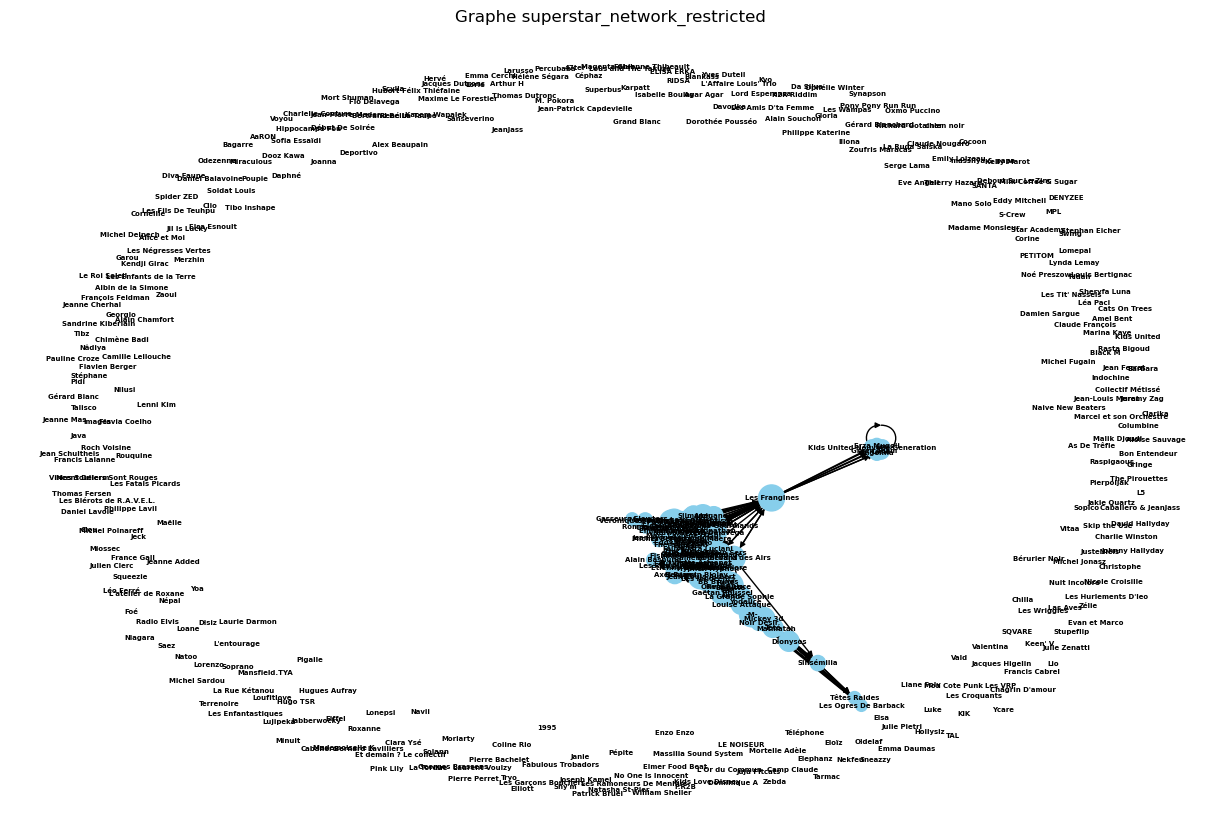

In [46]:
# Calculate the degrees (sum of in-degree and out-degree) of each node
degrees = {node: val for (node, val) in superstar_network_restricted.degree()}

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(superstar_network_restricted, with_labels=True, node_size=[v * 10 for v in degrees.values()], 
        node_color='skyblue', font_weight='bold', font_size=5, 
        arrowstyle='-|>', arrowsize=8)
plt.title("Graphe superstar_network_restricted")
plt.show()

In [47]:
# Identify isolates
list(nx.isolates(superstar_network_restricted))  

['Daniel Balavoine',
 'Patrick Bruel',
 'David Hallyday',
 'Laurent Voulzy',
 'Julien Clerc',
 'Alain Souchon',
 'François Feldman',
 'Michel Delpech',
 'Eddy Mitchell',
 'Lomepal',
 'Amel Bent',
 'Columbine',
 'Vitaa',
 'Soprano',
 'Chimène Badi',
 'Le Roi Soleil',
 'Julie Zenatti',
 'Natasha St-Pier',
 'Hélène Ségara',
 'L5',
 'M. Pokora',
 'Kendji Girac',
 'Lorie',
 "Shy'm",
 'TAL',
 'Sheryfa Luna',
 'Nâdiya',
 'Tarmac',
 'Da Silva',
 'Miossec',
 'Louis Bertignac',
 'Stephan Eicher',
 'Ycare',
 'Luke',
 'Aloïse Sauvage',
 'Terrenoire',
 'Alice et Moi',
 'The Pirouettes',
 'Hervé',
 'Vincent Delerm',
 'Alex Beaupain',
 'Arthur H',
 'Dominique A',
 'Jean-Louis Murat',
 'Jeanne Cherhal',
 'Albin de la Simone',
 'Thomas Dutronc',
 'Jacques Higelin',
 'Philippe Katerine',
 'Bernard Lavilliers',
 'William Sheller',
 'Michel Polnareff',
 'France Gall',
 'Maxime Le Forestier',
 'Michel Fugain',
 'Michel Jonasz',
 'Pierre Bachelet',
 'Claude Nougaro',
 'Claude François',
 'Zaoui',
 '47ter',


In [48]:
isolates_list = list(nx.isolates(superstar_network_restricted))
distinct_isolates_count = len(set(isolates_list))
print("Number distinct of isolats :", distinct_isolates_count)

Number distinct of isolats : 312


In [49]:
# We decide to keep only artists that have at least 1 successors (i.e remove isolats here)
superstar_network_restricted.remove_nodes_from(isolates_list)

# Check the number
print("Number of removed isolates :", len(isolates_list))

Number of removed isolates : 312


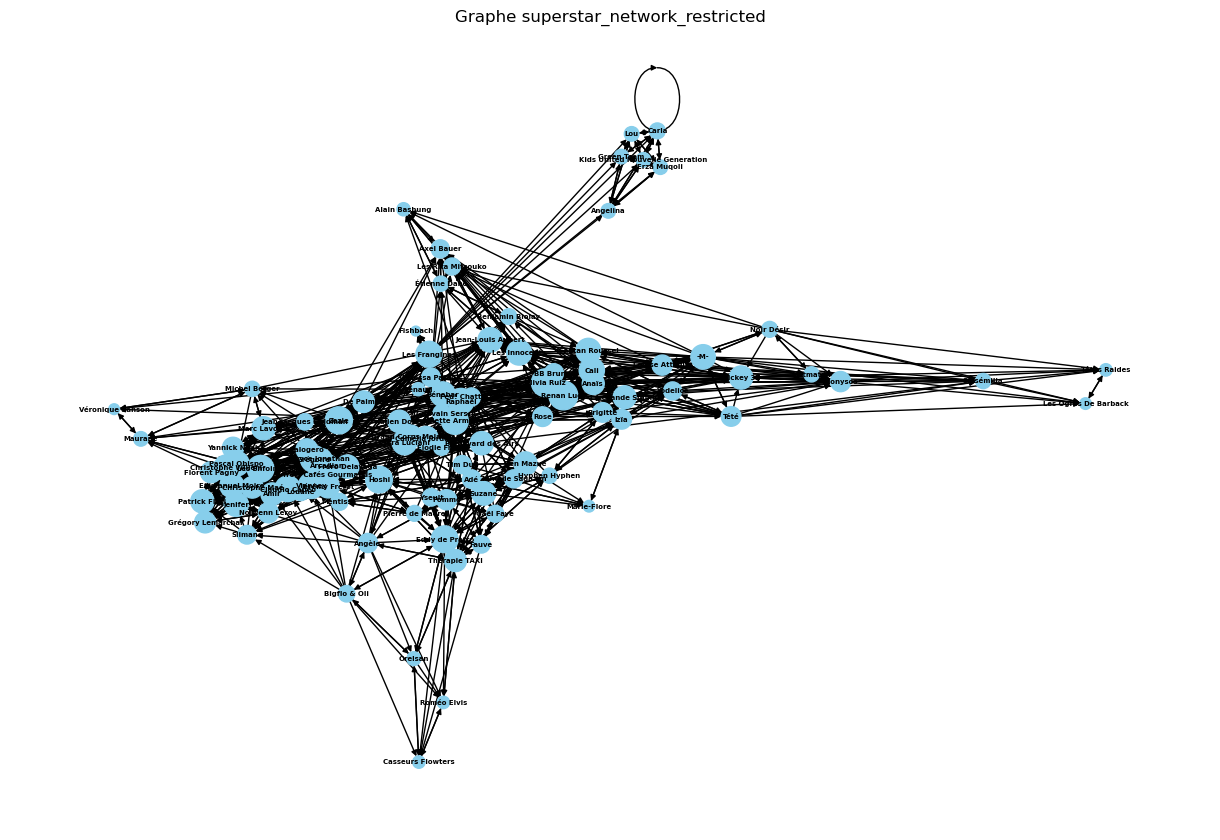

In [50]:
# Calculate the degrees (sum of in-degree and out-degree) of each node
degrees = {node: val for (node, val) in superstar_network_restricted.degree()}

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(superstar_network_restricted, with_labels=True, node_size=[v * 10 for v in degrees.values()], 
        node_color='skyblue', font_weight='bold', font_size=5, 
        arrowstyle='-|>', arrowsize=8)
plt.title("Graphe superstar_network_restricted")
plt.show()

In [51]:
# Dyads: Reciprocity (we can do it because superstar_network_restricted is a directed graph)
nx.reciprocity(superstar_network_restricted)
print(round(nx.reciprocity(superstar_network_restricted)*100,1), "% of recommendations are reciprocical.")

59.7 % of recommendations are reciprocical.


60.0% of recommendations in this network are reciprocal. In our context, reciprocity means that if artist A recommends artist B, then artist B also recommends artist A.

- A reciprocity of 60.0% suggests a significant level of mutual recommendation connections within the Spotify network. This implies that many recommendation relationships are bidirectional, indicating a pattern where if one artist recommends another, there's a high likelihood of mutual recommendation.
- This reciprocity could imply a balanced and reciprocal relationship in the recommendation system provided by Spotify. It may reflect a feature of Spotify's recommendation algorithm, where artists are often recommended in pairs or groups based on similar musical styles or user preferences.
- The high level of reciprocity could also indicate the effectiveness of Spotify's recommendation system in creating interconnected artist networks, where recommendations foster mutual discovery and support among artists.

However, it's essential to note that while the recommendations themselves are made by Spotify's algorithm rather than the artists directly, the presence of reciprocity still reflects underlying patterns of mutual affinity or similarity in the musical tastes of the artists within the network.

In [52]:
# Triads: global transitivity
print(nx.transitivity(superstar_network_restricted)) # this is the global clustering coefficient

0.44295649600473513


The global clustering coefficient, also known as transitivity, measures the degree to which nodes in a network are grouped into cliques or triangles.

The overall clustering coefficient of 0.44 suggests a significant level of clustering within the restricted superstar network. This means that there is a tendency for artists recommended by the same artist to be equally likely to recommend each other. In other words, if artist A recommends both artist B and artist C, it's likely that artists B and C are also connected.

In [53]:
# Triads: local transitivity
print(nx.clustering(superstar_network_restricted))  

{'Clara Luciani': 0.2982456140350877, 'Juliette Armanet': 0.24694189602446484, 'Julien Doré': 0.2772585669781931, 'Hoshi': 0.29236641221374043, 'Zazie': 0.30158730158730157, 'Camélia Jordana': 0.23558897243107768, 'Eddy de Pretto': 0.3049155145929339, 'Les Frangines': 0.3844178082191781, '-M-': 0.25, 'Grand Corps Malade': 0.2625, 'Calogero': 0.42857142857142855, 'Marc Lavoine': 0.3918918918918919, 'Angèle': 0.344311377245509, 'Christophe Willem': 0.42394822006472493, 'Vianney': 0.4159519725557461, 'Jenifer': 0.38901869158878505, 'Gaëtan Roussel': 0.3067484662576687, 'Suzane': 0.4137055837563452, 'Benjamin Biolay': 0.2922077922077922, 'Michel Berger': 0.31746031746031744, 'Therapie TAXI': 0.32525951557093424, 'Izïa': 0.33695652173913043, 'Brigitte': 0.33060109289617484, 'Fishbach': 0.875, 'Feu! Chatterton': 0.3730769230769231, 'Ben Mazué': 0.38934426229508196, 'Zaho de Sagazan': 0.4653846153846154, 'Véronique Sanson': 0.3076923076923077, 'Marie-Flore': 0.7631578947368421, 'Adé': 0.36643

In [54]:
# Let's look at the average local transitivity
print(nx.average_clustering(superstar_network_restricted))
# Triads: global transitivity
print(nx.transitivity(superstar_network_restricted))

0.47294155016131134
0.44295649600473513


- The average local transitivity measure represents the average local clustering coefficient in the network. This means that, on average, the neighbors of a given node have a 47.29% probability of forming triangles with each other. This indicates significant cohesion in the network's local clusters.

- The global transitivity represents the global clustering coefficient, also known as transitivity, which measures the degree to which nodes are grouped into cliques or triangles throughout the network. It is similar to average local transitivity, but measures clustering at the scale of the network as a whole.

Both measures show fairly similar levels of transitivity in the network, with the local average slightly higher than the global transitivity. This suggests that, although local clusters tend to be strongly connected, this cohesion is also maintained at the scale of the network as a whole.

## B - Other indicators of cohesion

In [55]:
# Density
nx.density(superstar_network_restricted)

0.1095959595959596

A network density of 10.96% indicates a relatively sparse network, suggesting that there are a moderate number of connections between artists relative to all possible connections.

This may indicate that there are still opportunities to establish new connections in the network, which could encourage the discovery of new artists and strengthen the cohesion of the artistic community on Spotify.
However, a lower density may also indicate a structured organization of the network, where connections are selectively established according to specific criteria, such as professional relationships or musical affinities.

In [56]:
# To find cliques that are only defined for undirected graphs, we need to convert superstar_network_restricted to an undirected graph
superstar_network_restricted_UG = nx.DiGraph.to_undirected(superstar_network_restricted)
print(list(nx.find_cliques(superstar_network_restricted_UG)))

[['Grégory Lemarchal', 'Slimane', 'Claudio Capéo', 'Christophe Maé', 'Amir', 'Patrick Fiori', 'Jenifer'], ['Grégory Lemarchal', 'Emmanuel Moire', 'Les Enfoirés', 'Christophe Willem', 'Joyce Jonathan', 'Christophe Maé', 'Grégoire'], ['Grégory Lemarchal', 'Emmanuel Moire', 'Les Enfoirés', 'Christophe Willem', 'Joyce Jonathan', 'Christophe Maé', 'Jenifer'], ['Grégory Lemarchal', 'Emmanuel Moire', 'Les Enfoirés', 'Christophe Willem', 'Joyce Jonathan', 'Nolwenn Leroy', 'Grégoire'], ['Grégory Lemarchal', 'Emmanuel Moire', 'Les Enfoirés', 'Christophe Willem', 'Joyce Jonathan', 'Nolwenn Leroy', 'Jenifer'], ['Grégory Lemarchal', 'Emmanuel Moire', 'Les Enfoirés', 'Christophe Willem', 'Patrick Fiori', 'Nolwenn Leroy', 'Jenifer'], ['Grégory Lemarchal', 'Emmanuel Moire', 'Les Enfoirés', 'Christophe Willem', 'Patrick Fiori', 'Nolwenn Leroy', 'Grégoire', 'Pascal Obispo'], ['Grégory Lemarchal', 'Emmanuel Moire', 'Les Enfoirés', 'Christophe Willem', 'Patrick Fiori', 'Claudio Capéo', 'Christophe Maé', '

In [57]:
len(list(nx.find_cliques(superstar_network_restricted_UG)))

265

A clique is a subgraph in which every node is directly connected to every other node. In the context of an artist network and Spotify's recommendation system, this result suggests that there are 265 groups of artists where each member is directly connected to every other member within their respective group.


The presence of 265 cliques in the network suggests a fairly rich and complex community structure. Each clique represents a highly interconnected group of artists who are all linked to each other.
These cliques may represent sub-groups of artists who share similar musical characteristics, label affiliations or frequent collaborations.
The discovery of numerous cliques in the network also indicates a diversity and density in artistic relationships on Spotify, with many groups of artists recommending each other.

Interpreting this in the context of Spotify's artist recommendation system, these cliques could represent cohesive clusters of artists who are frequently recommended together. It indicates that within the network, there are numerous tightly connected groups of artists whose music styles or fan bases often overlap, leading to mutual recommendations. This insight could be valuable for understanding the interconnectedness of artists and enhancing recommendation algorithms to better serve users with similar musical tastes.

## C - Global structures: connectivity

The graph doesn't have any isolates so it is connected and we can define the diameter and the average shortest path length 

In [58]:
print(nx.is_weakly_connected(superstar_network_restricted))
print(nx.is_strongly_connected(superstar_network_restricted))

True
False


Interpreting this in the context of an artist network:

The fact that the network is weakly connected suggests that there is some level of connectivity between different artists, even if the connections are not all direct or one-way.
However, the network not being strongly connected indicates that there are certain groups of artists or subsets within the network that are isolated from others. This might mean that while some artists are closely connected and their influences or collaborations are apparent, there are also artists or groups that have limited connections or interactions within the network.

In [59]:
# To check diameter and average_shortest_path_length we need to use the undirected version of the graph
print(nx.diameter(superstar_network_restricted_UG))
print(nx.average_shortest_path_length(superstar_network_restricted_UG)) # we use the unidrected version of the graph because the graph is not strongly directed

4
2.331111111111111


- Network diameter: The diameter of a network is the maximum length of the shortest path between two nodes furthest apart in the network. Here, the network diameter is 4.

- Average length of shortest path: This is the average of the shortest paths between all pairs of nodes in the network. Here, the average length of the shortest path is about 2.33.

A network diameter of 4 indicates that the network is relatively small, as it only takes 4 steps to get from the farthest artist to another in the network. This suggests strong overall connectivity between artists.

An average shortest path length of around 2.33 indicates that, on average, it takes around 2 steps to get from one artist to another in the network. This indicates relative proximity between artists and good accessibility across the network.

These measurements suggest a well-connected and coherent structure in the superstar network on Spotify, with artists interconnected by relatively short paths. This favors information flow, collaboration and artist discovery within the network.

In [60]:
# The graph is directed so we can use in and out degrees

# indegree centrality (incoming ties, only for directed graphs)
print(nx.in_degree_centrality(superstar_network_restricted))

# outdegree centrality (outgoing ties)
print(nx.out_degree_centrality(superstar_network_restricted))

# degree centrality (sum of in and out degrees)
print(nx.degree_centrality(superstar_network_restricted))

{'Clara Luciani': 0.11111111111111112, 'Juliette Armanet': 0.17171717171717174, 'Julien Doré': 0.06060606060606061, 'Hoshi': 0.17171717171717174, 'Zazie': 0.18181818181818182, 'Camélia Jordana': 0.09090909090909091, 'Eddy de Pretto': 0.17171717171717174, 'Les Frangines': 0.15151515151515152, '-M-': 0.11111111111111112, 'Grand Corps Malade': 0.06060606060606061, 'Calogero': 0.07070707070707072, 'Marc Lavoine': 0.17171717171717174, 'Angèle': 0.04040404040404041, 'Christophe Willem': 0.23232323232323235, 'Vianney': 0.17171717171717174, 'Jenifer': 0.22222222222222224, 'Gaëtan Roussel': 0.19191919191919193, 'Suzane': 0.14141414141414144, 'Benjamin Biolay': 0.07070707070707072, 'Michel Berger': 0.07070707070707072, 'Therapie TAXI': 0.12121212121212122, 'Izïa': 0.10101010101010102, 'Brigitte': 0.07070707070707072, 'Fishbach': 0.030303030303030304, 'Feu! Chatterton': 0.10101010101010102, 'Ben Mazué': 0.12121212121212122, 'Zaho de Sagazan': 0.07070707070707072, 'Véronique Sanson': 0.04040404040

In [61]:
# The 2 artists with the highest indegree centrality
highest_indegree = sorted(nx.in_degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1], reverse=True)[:2]
print("The 2 artists with the highest indegree centrality:")
for artist, centrality in highest_indegree:
    print(artist, centrality)

# The 2 artists with the highest outdegree centrality
highest_outdegree = sorted(nx.out_degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest outdegree centrality:")
for artist, centrality in highest_outdegree:
    print(artist, centrality)

# The 2 artists with the highest degree centrality
highest_degree = sorted(nx.degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest degree centrality:")
for artist, centrality in highest_degree:
    print(artist, centrality)

# The 2 artists with the lowest indegree centrality
lowest_indegree = sorted(nx.in_degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest indegree centrality:")
for artist, centrality in lowest_indegree:
    print(artist, centrality)

# The 2 artists with the lowest outdegree centrality
lowest_outdegree = sorted(nx.out_degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest outdegree centrality:")
for artist, centrality in lowest_outdegree:
    print(artist, centrality)

# The 2 artists with the lowest degree centrality
lowest_degree = sorted(nx.degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest degree centrality:")
for artist, centrality in lowest_degree:
    print(artist, centrality)

The 2 artists with the highest indegree centrality:
Renan Luce 0.27272727272727276
Grégoire 0.25252525252525254

The 2 artists with the highest outdegree centrality:
Clara Luciani 0.20202020202020204
Juliette Armanet 0.20202020202020204

The 2 artists with the highest degree centrality:
Renan Luce 0.43434343434343436
Olivia Ruiz 0.4040404040404041

The 2 artists with the lowest indegree centrality:
Vanessa Paradis 0.020202020202020204
Jean-Jacques Goldman 0.020202020202020204

The 2 artists with the lowest outdegree centrality:
Axel Bauer 0.010101010101010102
Têtes Raides 0.010101010101010102

The 2 artists with the lowest degree centrality:
Fishbach 0.05050505050505051
Véronique Sanson 0.06060606060606061


In [62]:
# Calculate indegrees, outdegrees, and degrees
indegrees = [val for (node, val) in superstar_network_restricted.in_degree()]
outdegrees = [val for (node, val) in superstar_network_restricted.out_degree()]
degrees = [val for (node, val) in superstar_network_restricted.degree()]

# Convert lists to numpy arrays for easy statistical analysis
In = np.array(indegrees)
Out = np.array(outdegrees)
Degrees = np.array(degrees)

# Compute statistics
indegree_min = np.min(In)
indegree_mean = np.mean(In)
indegree_std = np.std(In)
indegree_max = np.max(In)

outdegree_min = np.min(Out)
outdegree_mean = np.mean(Out)
outdegree_std = np.std(Out)
outdegree_max = np.max(Out)

degree_min = np.min(Degrees)
degree_mean = np.mean(Degrees)
degree_std = np.std(Degrees)
degree_max = np.max(Degrees)

# Print statistics
print("Indegree statistics:")
print("Min:", indegree_min)
print("Mean:", indegree_mean)
print("Standard deviation:", indegree_std)
print("Max:", indegree_max)

print("\nOutdegree statistics:")
print("Min:", outdegree_min)
print("Mean:", outdegree_mean)
print("Standard deviation:", outdegree_std)
print("Max:", outdegree_max)

print("\nDegree statistics:")
print("Min:", degree_min)
print("Mean:", degree_mean)
print("Standard deviation:", degree_std)
print("Max:", degree_max)


Indegree statistics:
Min: 2
Mean: 10.85
Standard deviation: 5.988948154726337
Max: 27

Outdegree statistics:
Min: 1
Mean: 10.85
Standard deviation: 5.327992117111286
Max: 20

Degree statistics:
Min: 5
Mean: 21.7
Standard deviation: 9.303225247192502
Max: 43


- Indegree centrality: Measures the proportion of incoming links a node receives in relation to all other nodes. It's a measure of an artist's importance in relation to the number of other artists who recommend it. Values range from 0 to 1, where 0 means no incoming links and 1 means all other artists recommend it.

- Outdegree centrality: Measures the proportion of outdegree links a node sends out in relation to all other nodes. It indicates the effort made by an artist to recommend other artists. As with inbound degree centrality, values range from 0 to 1.

- Degree centrality: The sum of incoming and outgoing degree centrality. It captures both an artist's importance as a recommendation recipient and his or her activity as a recommendation source.

On average, each artist receives around 10.85 recommendations (indegree) and also makes around 10.85 (outdegree). However, there is a wide dispersion around this average, as evidenced by the high standard deviations.

Some artists have a high number of inbound recommendations, up to 27, suggesting that they are highly recommended by other artists. Others may have fewer incoming recommendations, with a minimum of 2, indicating that they are less promoted in the network.

In general, the total number of connections for each artist (degree) varies between 5 and 43, with an average of around 21.7. This shows that some artists are more central in the network, with a greater number of connections, while others are more peripheral.

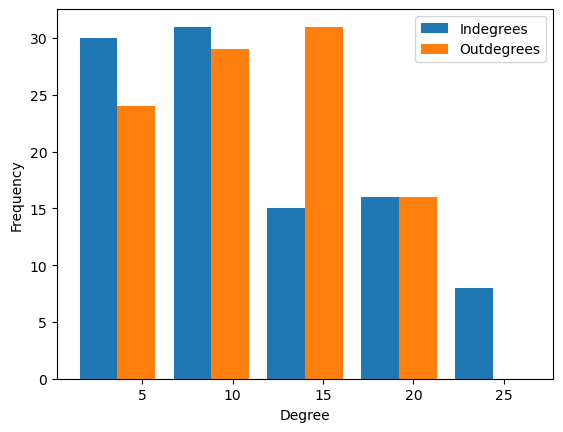

In [63]:
# Let's briefly look at degree distributions
indegrees = [val for (node, val) in superstar_network_restricted.in_degree()]
outdegrees = [val for (node, val) in superstar_network_restricted.out_degree()]

In = np.array(indegrees)
Out = np.array(outdegrees)

plt.hist([In, Out], bins=5, label=['Indegrees', 'Outdegrees'])
plt.legend(loc='upper right')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


In [64]:
# Eigenvector centrality
print(nx.eigenvector_centrality(superstar_network_restricted))
print(nx.eigenvector_centrality(superstar_network_restricted.reverse()))

{'Clara Luciani': 0.0056896252047340225, 'Juliette Armanet': 0.006298478975307501, 'Julien Doré': 0.00319657163664249, 'Hoshi': 0.0154605040328053, 'Zazie': 0.13736935359478838, 'Camélia Jordana': 0.013500530676121064, 'Eddy de Pretto': 0.006018910458756876, 'Les Frangines': 0.054813083267459345, '-M-': 0.012701312385262963, 'Grand Corps Malade': 0.00317315338867539, 'Calogero': 0.04126259443612947, 'Marc Lavoine': 0.1514778331821082, 'Angèle': 0.0011481400257695568, 'Christophe Willem': 0.2397426898362206, 'Vianney': 0.031140886842552905, 'Jenifer': 0.1407292766087736, 'Gaëtan Roussel': 0.09832931814096862, 'Suzane': 0.0057547662996882635, 'Benjamin Biolay': 0.006831217113627843, 'Michel Berger': 0.027101355480085382, 'Therapie TAXI': 0.004472650800507129, 'Izïa': 0.0044816565563593775, 'Brigitte': 0.005349889625007071, 'Fishbach': 0.0010387010782327848, 'Feu! Chatterton': 0.0026546294537643975, 'Ben Mazué': 0.004051934040976541, 'Zaho de Sagazan': 0.00226955589896029, 'Véronique Sans

- Eigenvector Centrality (Direct Graph): This measure evaluates the importance of artists according to their connection to other important artists. Thus, artists with a higher eigenvector centrality are those who are connected to other popular artists. This could indicate artists who are often listened to or followed by the same users, which can be useful for recommending similar music.

- Eigenvector Centrality (Reverse Graph): Looking at the reverse graph, this measure assesses the importance of artists based on their connection to users who listen to many other important artists. Artists with a higher eigenvector centrality in the reverse graph are those whose music is often listened to by users who listen to a lot of popular music. This could be useful for identifying artists whose music is widely appreciated among popular music listeners.

In [65]:
# Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(superstar_network_restricted)
eigenvector_centrality_reverse = nx.eigenvector_centrality(superstar_network_restricted.reverse())

# The 2 artists with the highest Eigenvector Centrality
highest_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:2]
print("The 2 artists with the highest Eigenvector Centrality:")
for artist, centrality in highest_eigenvector:
    print(artist, centrality)

# The 2 artists with the lowest Eigenvector Centrality
lowest_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest Eigenvector Centrality:")
for artist, centrality in lowest_eigenvector:
    print(artist, centrality)

# The 2 artists with the highest Eigenvector Centrality (Reverse Graph)
highest_eigenvector_reverse = sorted(eigenvector_centrality_reverse.items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest Eigenvector Centrality (Reverse Graph):")
for artist, centrality in highest_eigenvector_reverse:
    print(artist, centrality)

# The 2 artists with the lowest Eigenvector Centrality (Reverse Graph)
lowest_eigenvector_reverse = sorted(eigenvector_centrality_reverse.items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest Eigenvector Centrality (Reverse Graph):")
for artist, centrality in lowest_eigenvector_reverse:
    print(artist, centrality)


The 2 artists with the highest Eigenvector Centrality:
Grégoire 0.26719878488522114
Emmanuel Moire 0.24942374034426104

The 2 artists with the lowest Eigenvector Centrality:
Jean-Jacques Goldman 0.00031084210032772164
Renaud 0.00031084210032772164

The 2 artists with the highest Eigenvector Centrality (Reverse Graph):
Hoshi 0.2650256905883129
Eddy de Pretto 0.2400760570390935

The 2 artists with the lowest Eigenvector Centrality (Reverse Graph):
Têtes Raides 9.463625300942739e-51
Les Ogres De Barback 9.463625300942739e-51


In [66]:
# Closeness centrality
print(nx.closeness_centrality(superstar_network_restricted)) # uses the inward distance to a node

{'Clara Luciani': 0.30088656347649156, 'Juliette Armanet': 0.30416896235078056, 'Julien Doré': 0.27789523138360345, 'Hoshi': 0.32802535155476337, 'Zazie': 0.4595959595959596, 'Camélia Jordana': 0.3319304152637486, 'Eddy de Pretto': 0.28451178451178455, 'Les Frangines': 0.3636802810715854, '-M-': 0.3442241343475912, 'Grand Corps Malade': 0.26895969339699244, 'Calogero': 0.348526936026936, 'Marc Lavoine': 0.41615156540529674, 'Angèle': 0.23496197934400184, 'Christophe Willem': 0.4224568921538619, 'Vianney': 0.31328263912533577, 'Jenifer': 0.3964287424003064, 'Gaëtan Roussel': 0.4473072975746773, 'Suzane': 0.2816379281025746, 'Benjamin Biolay': 0.322959322959323, 'Michel Berger': 0.32421110328087077, 'Therapie TAXI': 0.27882154882154886, 'Izïa': 0.29043911335578004, 'Brigitte': 0.29767425141090625, 'Fishbach': 0.232351290684624, 'Feu! Chatterton': 0.2504385169055828, 'Ben Mazué': 0.26895969339699244, 'Zaho de Sagazan': 0.25194718267007427, 'Véronique Sanson': 0.31446039340776183, 'Marie-F

Closeness centrality measures how close a node is to other nodes in the graph, indicating how quickly information can spread from that node to other nodes.

In the context of recommendations for artists on Spotify, closeness centrality can help identify artists who are more central in the network and thus potentially more influential or connected to other artists. Artists with higher closeness centrality values are those that can quickly influence or be influenced by other artists in the network, making them potentially more important for recommendations or collaborations.

In [67]:
# Compute closeness centrality for each artist
closeness_centrality_scores = nx.closeness_centrality(superstar_network_restricted)

# Sort the artists by their closeness centrality scores
sorted_closeness_centrality = sorted(closeness_centrality_scores.items(), key=lambda x: x[1], reverse=True)

# Print the top 2 artists with the highest closeness centrality
print("Top 2 artists with the highest closeness centrality:")
for artist, centrality in sorted_closeness_centrality[:2]:
    print(artist, centrality)

# Print the bottom 2 artists with the lowest closeness centrality
print("\nBottom 2 artists with the lowest closeness centrality:")
for artist, centrality in sorted_closeness_centrality[-2:]:
    print(artist, centrality)


Top 2 artists with the highest closeness centrality:
Renan Luce 0.4807268083130152
Zazie 0.4595959595959596

Bottom 2 artists with the lowest closeness centrality:
Jean-Jacques Goldman 0.21284087696301437
Renaud 0.21284087696301437


In [68]:
# Betweenness centrality
print(nx.betweenness_centrality(superstar_network_restricted))

{'Clara Luciani': 0.04295574019849418, 'Juliette Armanet': 0.07337616960574829, 'Julien Doré': 0.013512110548709962, 'Hoshi': 0.10235166106841687, 'Zazie': 0.0603896633806185, 'Camélia Jordana': 0.09285140078498522, 'Eddy de Pretto': 0.06391576260362773, 'Les Frangines': 0.0710476126002724, '-M-': 0.03992749113471676, 'Grand Corps Malade': 0.027314487906873474, 'Calogero': 0.0078010977877160026, 'Marc Lavoine': 0.016003540540335277, 'Angèle': 0.0047308133557868405, 'Christophe Willem': 0.01212882790438614, 'Vianney': 0.02193666368077264, 'Jenifer': 0.0070871592122846525, 'Gaëtan Roussel': 0.040971566898241454, 'Suzane': 0.021846167182325286, 'Benjamin Biolay': 0.0043564204453993395, 'Michel Berger': 0.010494241256417475, 'Therapie TAXI': 0.034995386454207765, 'Izïa': 0.02050712033799718, 'Brigitte': 0.03604541207275599, 'Fishbach': 0.0, 'Feu! Chatterton': 0.005703909492032373, 'Ben Mazué': 0.024940232589506808, 'Zaho de Sagazan': 0.003306840388610369, 'Véronique Sanson': 0.000939470874

Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes in the network. 

In the context of Spotify artist recommendations, nodes with high betweenness centrality act as bridges connecting different parts of the artist network. Artists with high betweenness centrality are likely to have a significant influence on the flow of information or recommendations between other artists. They may serve as key influencers or connectors within the network, potentially indicating their importance in facilitating the spread of musical styles or genres across different communities or clusters of artists.

In [69]:
# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(superstar_network_restricted)

# Sort nodes by betweenness centrality in descending order
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 2 artists with the highest betweenness centrality
print("Top 2 artists with the highest betweenness centrality:")
for artist, centrality in sorted_betweenness[:2]:
    print(artist, centrality)

# Print the bottom 2 artists with the lowest betweenness centrality
print("\nBottom 2 artists with the lowest betweenness centrality:")
for artist, centrality in sorted_betweenness[-2:]:
    print(artist, centrality)


Top 2 artists with the highest betweenness centrality:
Hoshi 0.10235166106841687
Renan Luce 0.09441806586715493

Bottom 2 artists with the lowest betweenness centrality:
Lou 0.0
Les Ogres De Barback 0.0


In [70]:
# Compute descriptive statistics 

# Create a list to store centrality measures
centrality_measures = {
    "Eigenvector Centrality": nx.eigenvector_centrality(superstar_network_restricted),
    "Eigenvector Centrality (Reverse)": nx.eigenvector_centrality(superstar_network_restricted.reverse()),
    "Closeness Centrality": nx.closeness_centrality(superstar_network_restricted),
    "Betweenness Centrality": nx.betweenness_centrality(superstar_network_restricted)
}

# Loop through centrality measures
for measure, centrality in centrality_measures.items():
    # Convert centrality values to a numpy array
    centrality_values = np.array(list(centrality.values()))
    
    # Compute statistics
    min_value = np.min(centrality_values)
    max_value = np.max(centrality_values)
    mean_value = np.mean(centrality_values)
    std_deviation = np.std(centrality_values)
    
    # Print statistics
    print(f"{measure} statistics:")
    print(f"Min: {min_value:.2f}")
    print(f"Max: {max_value:.2f}")
    print(f"Mean: {mean_value:.2f}")
    print(f"Standard Deviation: {std_deviation:.2f}\n")


Eigenvector Centrality statistics:
Min: 0.00
Max: 0.27
Mean: 0.06
Standard Deviation: 0.08

Eigenvector Centrality (Reverse) statistics:
Min: 0.00
Max: 0.27
Mean: 0.07
Standard Deviation: 0.07

Closeness Centrality statistics:
Min: 0.21
Max: 0.48
Mean: 0.33
Standard Deviation: 0.07

Betweenness Centrality statistics:
Min: 0.00
Max: 0.10
Mean: 0.02
Standard Deviation: 0.02



- **Eigenvector Centrality:** This measure indicates the influence of an artist based on the connections they have with other influential artists. Artists with high eigenvector centrality (closer to 0.27, such as **Grégoire**) are likely to be connected to other influential artists, suggesting that their music might be popular or more frequently listened to. Conversely, artists with low eigenvector centrality (closer to 0, such as **Jean-Jacques Goldman**) might have fewer connections to influential artists, indicating a lower level of popularity or reach.

- **Eigenvector Centrality (Reverse):** This measure considers the influence of artists based on the connections they receive from other influential artists. Similar to eigenvector centrality, higher values suggest that the artist receives recommendations or connections from other influential artists, potentially indicating a broader reach or impact.

- **Closeness Centrality:** It measures how close an artist is to all other artists in the network. Artists with higher closeness centrality (closer to 0.48, such as **Zazie**) are more central in the network and may have closer connections to a broader range of artists. Lower closeness centrality values (closer to 0.21, such as **Jean-Jacques Goldman**) suggest that the artist is less central and may not be as closely connected to other artists.

- **Betweenness Centrality:** It quantifies the extent to which an artist lies on paths between other artists in the network. Artists with higher betweenness centrality (closer to 0.10, such as **Hoshi**) act as bridges or intermediaries between different clusters or communities of artists. Lower betweenness centrality values (closer to 0, such as **Lou**) indicate that the artist has less influence over the flow of recommendations between other artists. However, a maximum of 0.10 is still a very low measure (as the maximum can reach 1), indicating that the artists with maximum betweenness centrality are not crucial bridging points in the Spotify artist recommendation network. This means they are not major intermediaries connecting different parts of the network or communities of artists. 

In summary, these centrality measures help identify influential artists who play a significant role in connecting different parts of the Spotify artist network and may have a greater impact on music recommendations.

## Vizualization

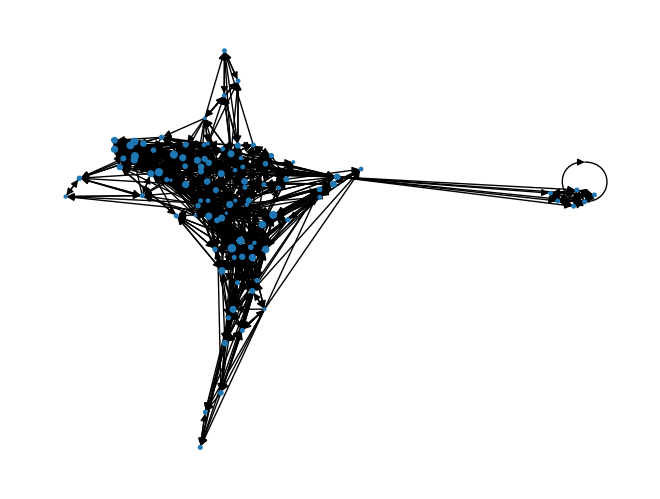

In [71]:
# change node size to reflect indegree

indeg = superstar_network_restricted.in_degree   # sets up the indegree view
indegs = [d for n, d in indeg]   # gets all nodes' degree values 

# draw plot (color = office)
nx.draw(superstar_network_restricted, pos=nx.fruchterman_reingold_layout(superstar_network_restricted), with_labels=False,
        #node_color=node_color, edge_color = "gray", 
        node_size=indegs)
plt.show()


# IV - Personal networks, ego networks

In [72]:
TS_ego = pd.read_csv('Clara_Luciani_Attr_Network.csv')
TS_ego = TS_ego[TS_ego['Artist_Name'] == 'Clara Luciani']

In [73]:
node_names_to_keep = list(superstar_network_restricted.nodes())

In [74]:
len(node_names_to_keep)

100

In [75]:
Network_TS = pd.read_csv('Clara_Luciani_Attr_Network.csv')
Network_TS = Network_TS[Network_TS['Artist_Name'].isin(node_names_to_keep)]

In [76]:
Network_TS.head()

Artist_Name  NB_Followers  \
0     Clara Luciani        798028   
1  Juliette Armanet        331392   
2       Julien Doré        844750   
3             Hoshi        637233   
4             Zazie        452620   

                                              Genres  Popularity Nationality  \
0                          ['chanson', 'french pop']          57      France   
1  ['chanson', 'electro-pop francais', 'french in...          56      France   
2           ['chanson', 'french pop', 'french rock']          60      France   
3     ['chanson', 'french pop', 'variete francaise']          63      France   
4           ['chanson', 'french pop', 'french rock']          54      France   

    Age  Death    Type  Gender  Total_Release  ...  Acousticness  \
0  32.0  False  Person  female             20  ...      0.159200   
1  40.0  False  Person  female             20  ...      0.355333   
2  42.0  False  Person    male             20  ...      0.439333   
3  28.0  False  Person  female             20  ...      0.437667   
4  60.0  False  Person  female             20  ...      0.566000   

   Danceability    Duration_MS    Energy  Instrumentalness  Liveness  \
0      0.661667  195706.333333  0.759333          0.000240  0.161000   
1      0.701000  203195.666667  0.679333          0.000017  0.153867   
2      0.714000  191346.666667  0.629000          0.176730  0.118000   
3      0.614000  204098.000000  0.703000          0.000003  0.134633   
4      0.602000  200901.666667  0.555000          0.001738  0.126667   

   Loudness  Speechiness       Tempo   Valence  
0 -6.298000     0.047233  113.662000  0.792667  
1 -5.094000     0.037500  128.995333  0.459333  
2 -7.270000     0.044300  125.017000  0.524333  
3 -5.783000     0.146967   99.729667  0.474667  
4 -7.508333     0.037067   90.978333  0.607333  

[5 rows x 23 columns]

In [77]:
Network_TS = Network_TS.drop_duplicates(subset=['Artist_Name'])

In [78]:
Network_TS.shape

(100, 23)

In [79]:
Alters_TS = pd.read_csv('Clara_Luciani_Attr_Ego.csv')
print(Alters_TS)

           Artist_Name  NB_Followers  \
0     Juliette Armanet        331392   
1          Julien Doré        844750   
2                Hoshi        637233   
3                Zazie        452620   
4      Camélia Jordana        177475   
5       Eddy de Pretto        529813   
6        Les Frangines        193111   
7                  -M-        477992   
8   Grand Corps Malade        863577   
9             Calogero        754388   
10        Marc Lavoine        403523   
11              Angèle       2691914   
12   Christophe Willem        210096   
13             Vianney       1269524   
14             Jenifer        449319   
15      Gaëtan Roussel        143451   
16              Suzane        116281   
17     Benjamin Biolay        175444   
18       Michel Berger        388277   
19       Therapie TAXI        526208   

                                               Genres  Popularity Nationality  \
0   ['chanson', 'electro-pop francais', 'french in...          56      France 

In [80]:
# use pandas to import edgelist (of Ego Clara Luciani) as a table
EgoEdgesTS = pd.read_table('Clara_Luciani_Ego.txt', sep=',')
EgoEdgesTS

Node1               Node2
0           Suzane      Eddy de Pretto
1           Suzane               Hoshi
2           Suzane       Therapie TAXI
3           Suzane    Juliette Armanet
4           Suzane     Camélia Jordana
..             ...                 ...
86  Eddy de Pretto              Suzane
87  Eddy de Pretto               Hoshi
88  Eddy de Pretto    Juliette Armanet
89  Eddy de Pretto  Grand Corps Malade
90  Eddy de Pretto         Julien Doré

[91 rows x 2 columns]

In [81]:
# generate graph from pandas edgelist
# it is an directed graph
EgoNetTS = nx.from_pandas_edgelist(EgoEdgesTS, 'Node1', 'Node2', create_using=nx.DiGraph()) 
print(EgoNetTS)

DiGraph with 20 nodes and 91 edges


In [82]:
# Match nodes of graph with attributes of nodes
NodeData = Alters_TS.set_index('Artist_Name').to_dict('index').items()
EgoNetTS.add_nodes_from(NodeData)

# View results
print(EgoNetTS.nodes(data=True))

[('Suzane', {'NB_Followers': 116281, 'Genres': "['french pop', 'nouvelle chanson francaise']", 'Popularity': 44, 'Nationality': 'France', 'Age': 34.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20, 'Available_Markets': 185, 'Year_Last_Release': 2023, 'Type_Last_Release': 'album', 'Acousticness': 0.0887333333333333, 'Danceability': 0.775, 'Duration_MS': 159115.33333333334, 'Energy': 0.577, 'Instrumentalness': 1.123333333333333e-06, 'Liveness': 0.0970333333333333, 'Loudness': -7.559666666666668, 'Speechiness': 0.1402, 'Tempo': 115.84566666666667, 'Valence': 0.4763333333333333}), ('Eddy de Pretto', {'NB_Followers': 529813, 'Genres': "['french pop', 'french rock', 'pop quebecois']", 'Popularity': 57, 'Nationality': 'France', 'Age': 31.0, 'Death': False, 'Type': 'Person', 'Gender': 'male', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2024, 'Type_Last_Release': 'album', 'Acousticness': 0.3256, 'Danceability': 0.586, 'Duration_MS': 188969.0, 

In [83]:
# View edges
print(EgoNetTS.edges(data=True))

[('Suzane', 'Eddy de Pretto', {}), ('Suzane', 'Hoshi', {}), ('Suzane', 'Therapie TAXI', {}), ('Suzane', 'Juliette Armanet', {}), ('Suzane', 'Camélia Jordana', {}), ('Eddy de Pretto', 'Therapie TAXI', {}), ('Eddy de Pretto', 'Suzane', {}), ('Eddy de Pretto', 'Hoshi', {}), ('Eddy de Pretto', 'Juliette Armanet', {}), ('Eddy de Pretto', 'Grand Corps Malade', {}), ('Eddy de Pretto', 'Julien Doré', {}), ('Hoshi', 'Eddy de Pretto', {}), ('Hoshi', 'Les Frangines', {}), ('Hoshi', 'Gaëtan Roussel', {}), ('Hoshi', 'Suzane', {}), ('Hoshi', 'Zazie', {}), ('Hoshi', 'Vianney', {}), ('Hoshi', 'Grand Corps Malade', {}), ('Hoshi', 'Jenifer', {}), ('Hoshi', 'Therapie TAXI', {}), ('Therapie TAXI', 'Eddy de Pretto', {}), ('Therapie TAXI', 'Suzane', {}), ('Therapie TAXI', 'Hoshi', {}), ('Therapie TAXI', 'Angèle', {}), ('Juliette Armanet', 'Benjamin Biolay', {}), ('Juliette Armanet', 'Eddy de Pretto', {}), ('Juliette Armanet', 'Julien Doré', {}), ('Juliette Armanet', 'Camélia Jordana', {}), ('Juliette Armane

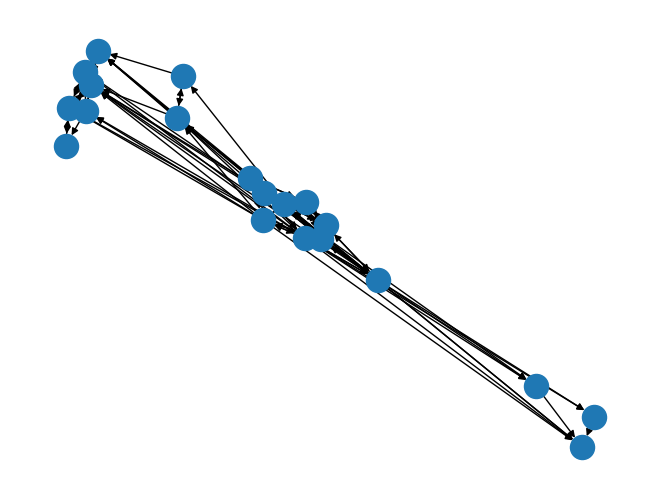

In [84]:
# Draw graph
nx.draw(EgoNetTS)
plt.show()

## A - Overall network composition indicators

### A1 - Numerical variables

In [85]:
# Is the whole network homogeneous ? 

for column in Network_TS.select_dtypes(include=['float64', 'int64']).columns:
    print("Column:", column)
    print("Clara Luciani's", column, TS_ego[column].iloc[0])
    print("Mean:", Network_TS[column].mean())
    print("Variance:", Network_TS[column].var())
    print("Standard Deviation:", Network_TS[column].std())
    print("Quantiles:", Network_TS[column].quantile([0.25, 0.5, 0.75]))
    print("Minimum:", Network_TS[column].min())
    print("Maximum:", Network_TS[column].max())
    print("\n")

Column: NB_Followers
Clara Luciani's NB_Followers 798028
Mean: 382854.15
Variance: 211342821959.74496
Standard Deviation: 459720.37366179994
Quantiles: 0.25    110831.75
0.50    199970.50
0.75    457092.75
Name: NB_Followers, dtype: float64
Minimum: 21463
Maximum: 2691914


Column: Popularity
Clara Luciani's Popularity 57
Mean: 49.91
Variance: 67.37565656565657
Standard Deviation: 8.208267573955942
Quantiles: 0.25    44.00
0.50    50.00
0.75    56.25
Name: Popularity, dtype: float64
Minimum: 28
Maximum: 66


Column: Age
Clara Luciani's Age 32.0
Mean: 39.202127659574465
Variance: 265.64687714481806
Standard Deviation: 16.298677159353087
Quantiles: 0.25    29.0
0.50    40.0
0.75    49.0
Name: Age, dtype: float64
Minimum: 4.0
Maximum: 75.0


Column: Total_Release
Clara Luciani's Total_Release 20
Mean: 19.18
Variance: 6.351111111111114
Standard Deviation: 2.5201410895247736
Quantiles: 0.25    20.0
0.50    20.0
0.75    20.0
Name: Total_Release, dtype: float64
Minimum: 4
Maximum: 20


Column

The overall network consists of artists with diverse characteristics and attributes. Here's an interpretation based on the provided statistics:

- **Follower Count:** The network comprises artists with varying degrees of popularity, as indicated by their follower counts. The mean follower count of approximately 382,854.15 suggests a wide range of artists, from relatively unknown to highly popular ones.

- **Popularity:** Artists in the network exhibit varying levels of popularity, with a mean popularity score of 49.91. This indicates that while some artists are widely recognized and listened to, others may have a more niche audience.

- **Age:** The average age of artists in the network is around 39.20 years old. This suggests a mix of both emerging and established artists, with some having longer careers and others being relatively new to the industry.

- **Release Activity:** On average, artists in the network have released approximately 19.18 albums or tracks. This indicates a significant level of productivity within the network, with artists consistently putting out new music.

- **Market Availability:** Artists in the network have their music available in various markets, with an average of around 167.34 markets per artist. This suggests a global reach, with artists catering to listeners across different regions and countries.

- **Release Years:** The mean release year of artists' most recent releases is approximately 2022.68, indicating that the network includes both established artists with extensive discographies and newer artists with recent releases.

- **Musical Attributes:** The network encompasses a wide range of musical styles and characteristics, as reflected in attributes such as Acousticness, Danceability, Energy, Instrumentalness, Liveness, Loudness, Speechiness, and Tempo. These attributes highlight the diversity of musical expressions within the network.
  
Overall, the network represents a dynamic ecosystem of artists with varied levels of popularity, ages, release activity, market availability, and musical styles. It reflects the rich tapestry of the music industry, where artists from different backgrounds and genres contribute to the cultural landscape.

Clara Luciani appears to be above average in terms of popularity, follower count, availability in markets, and consistency in releasing music. However, her age is slightly below the network average.

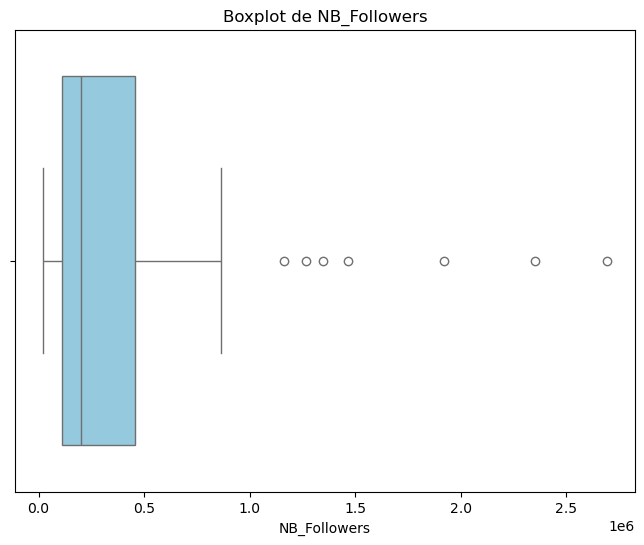

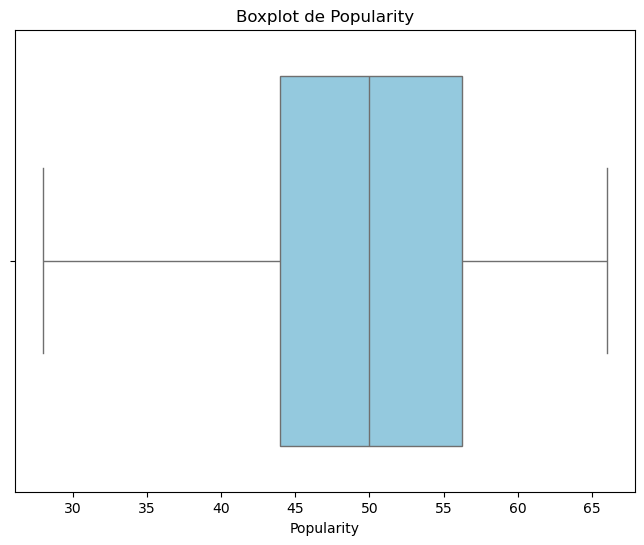

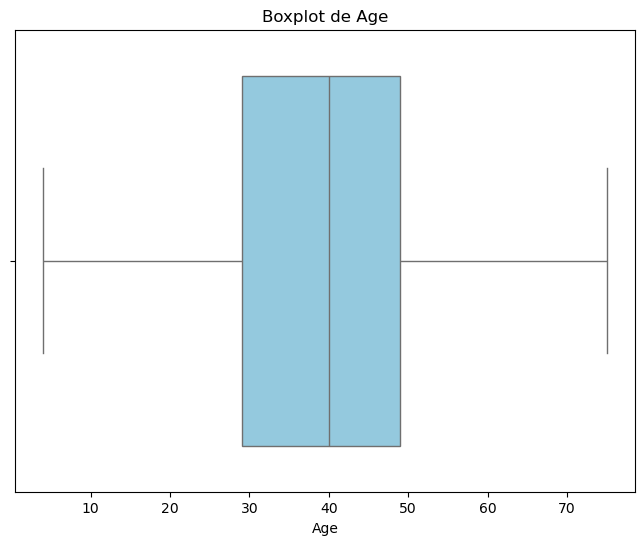

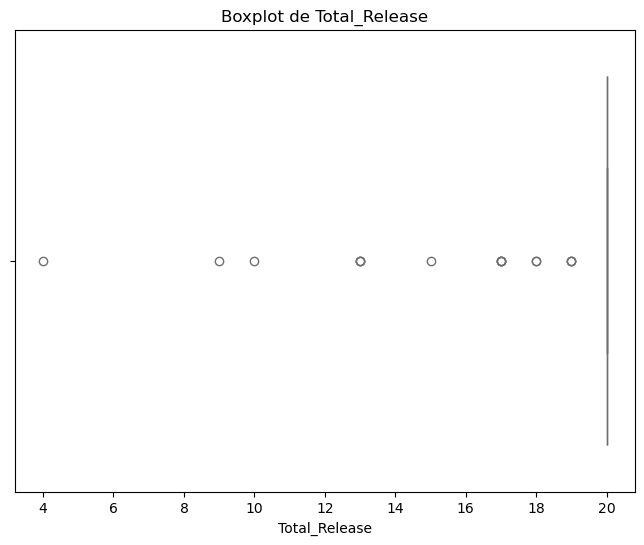

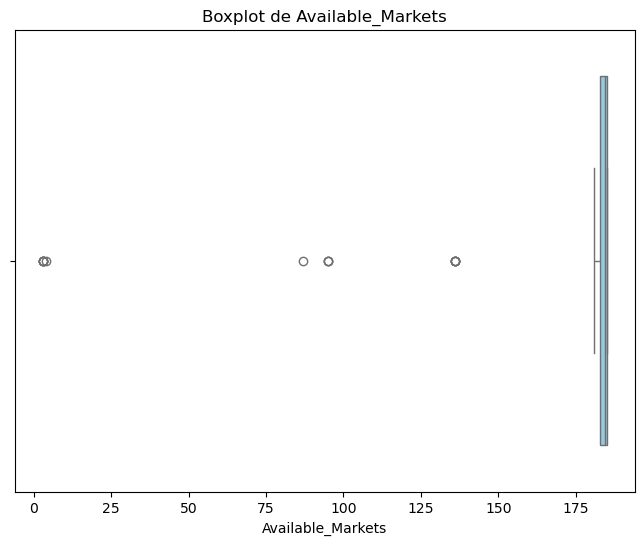

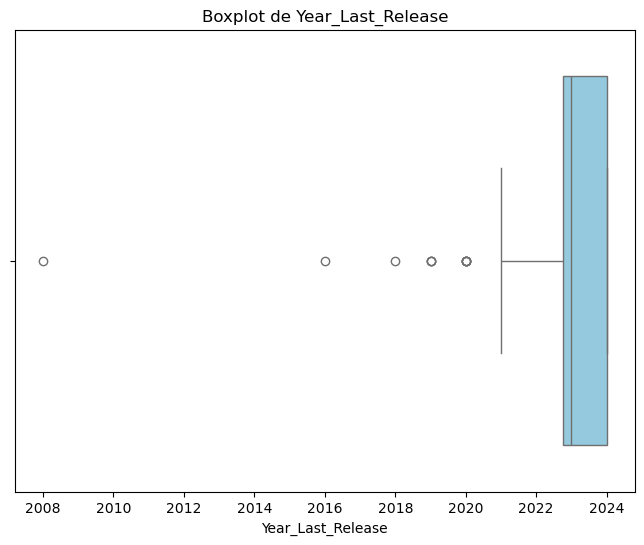

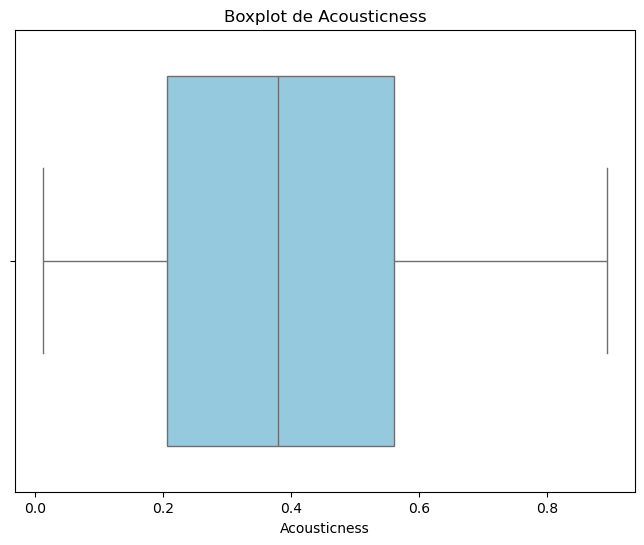

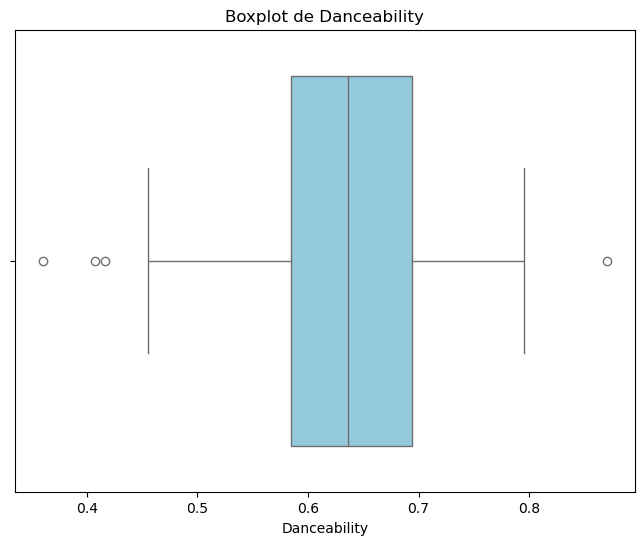

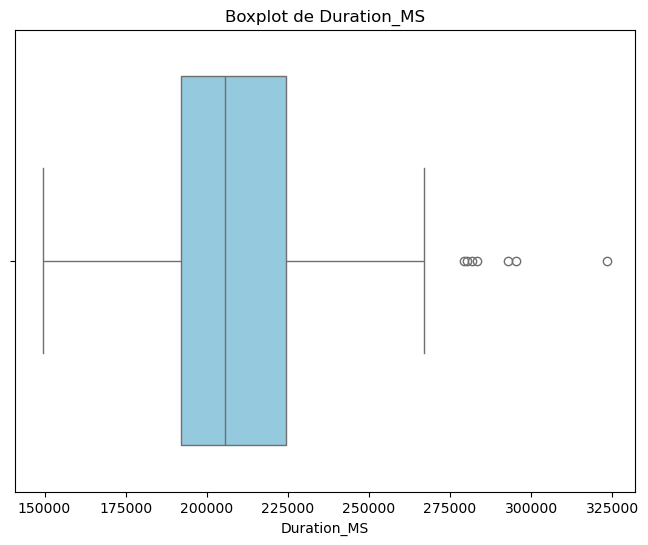

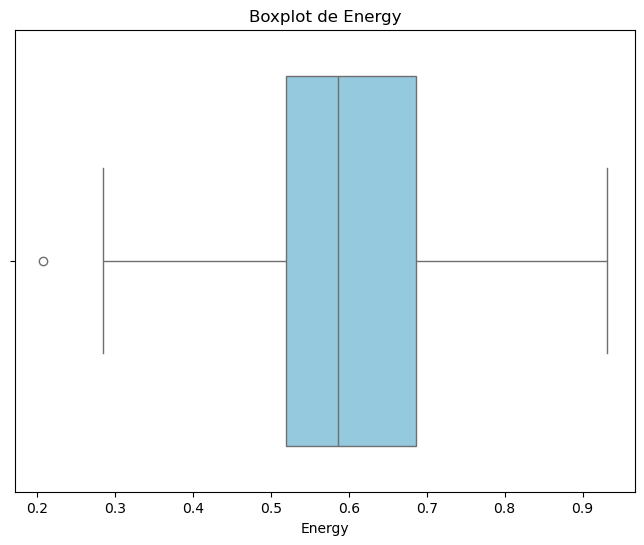

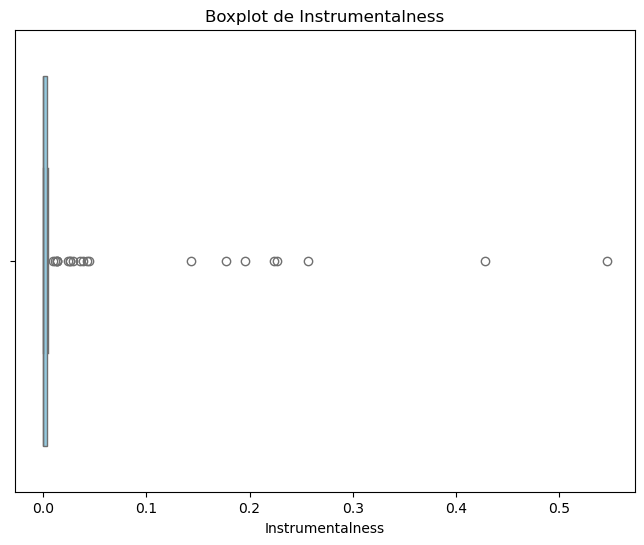

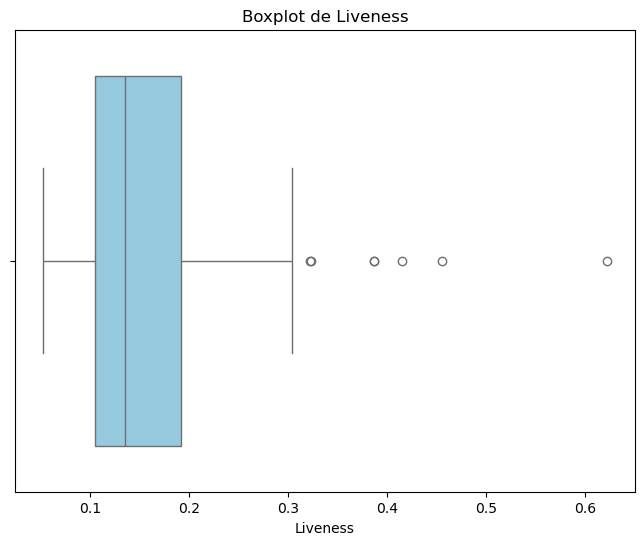

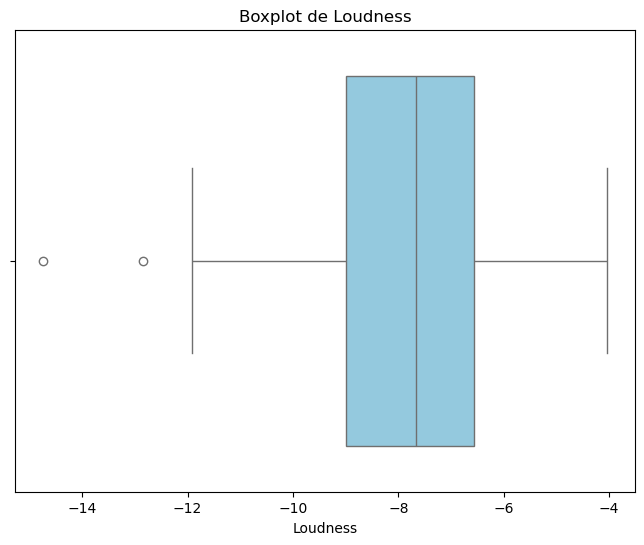

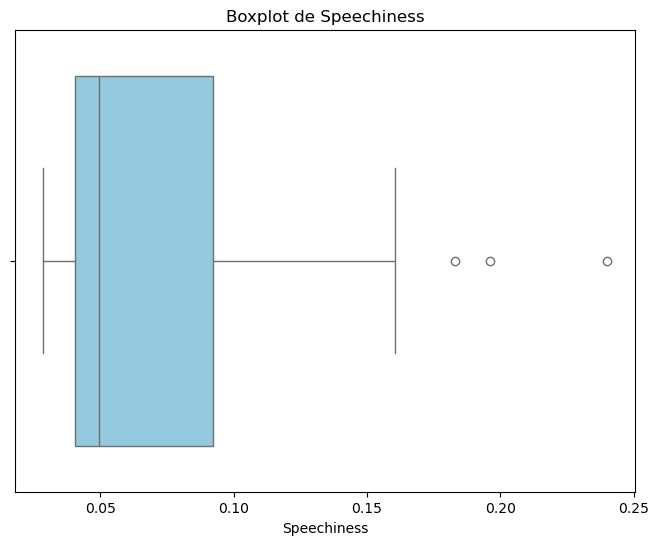

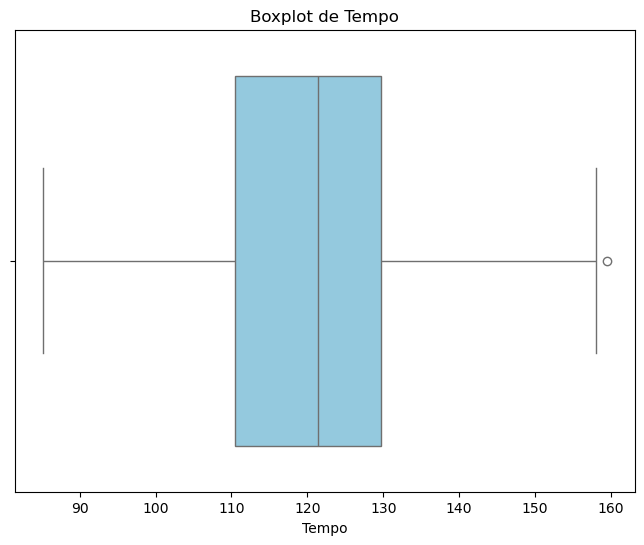

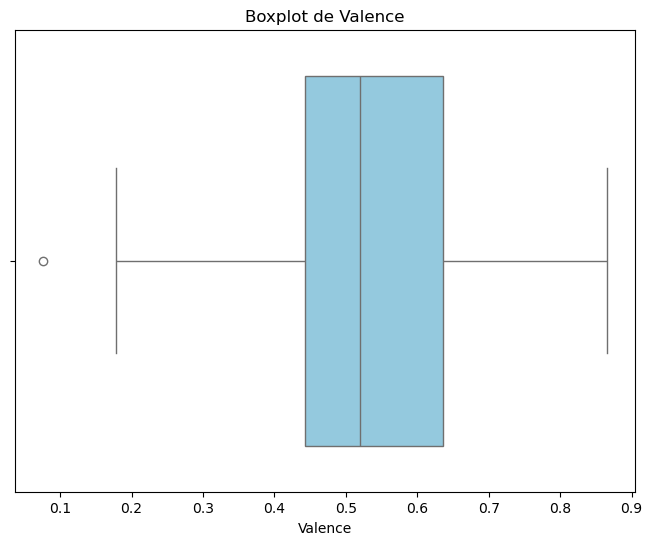

In [86]:
# Draw boxplots for all numerical variables

numeric_columns = Network_TS.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Network_TS[column], color='skyblue')
    plt.title(f'Boxplot de {column}')
    plt.show()

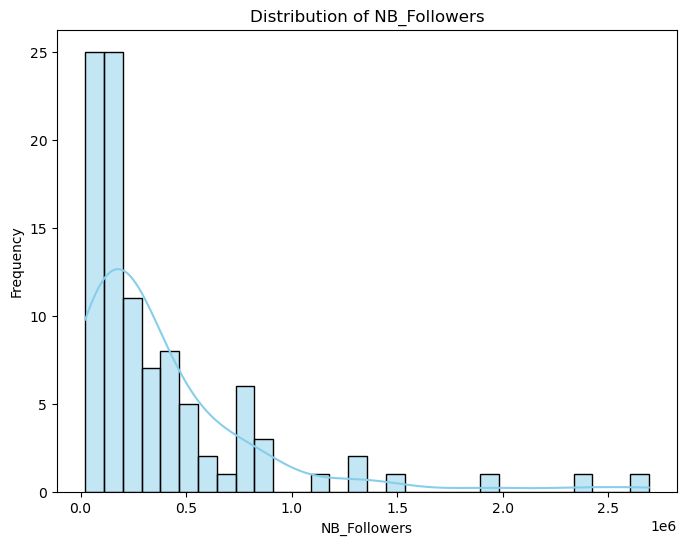

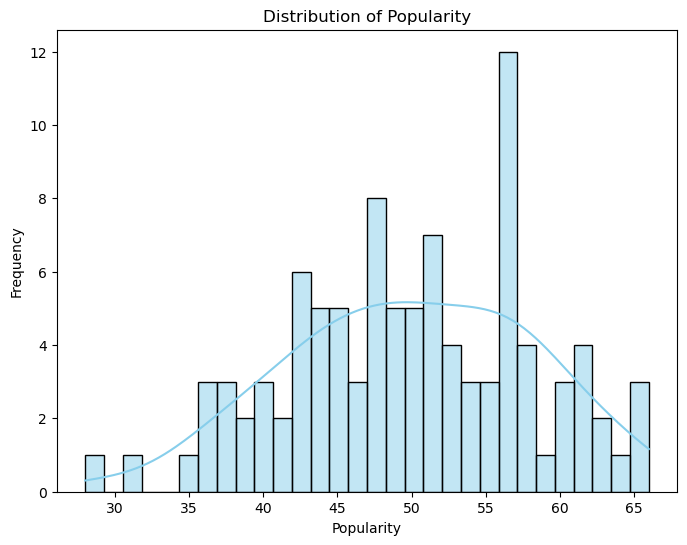

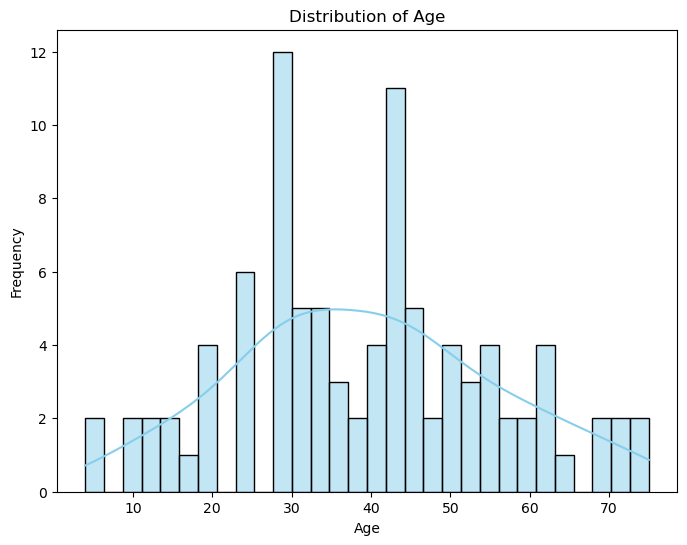

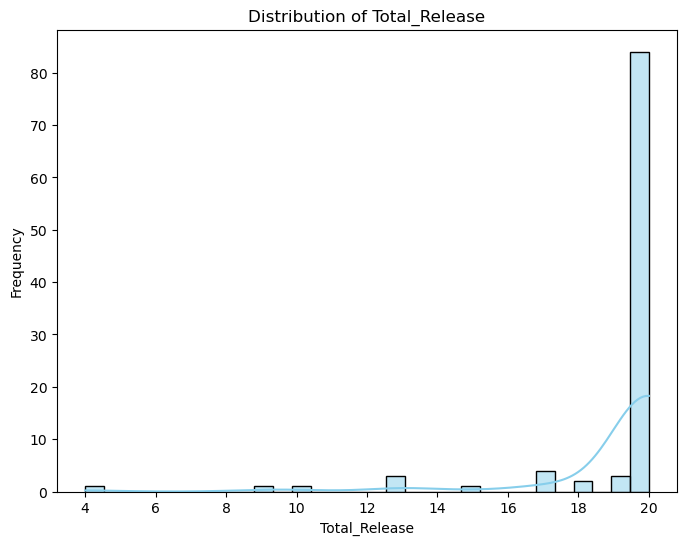

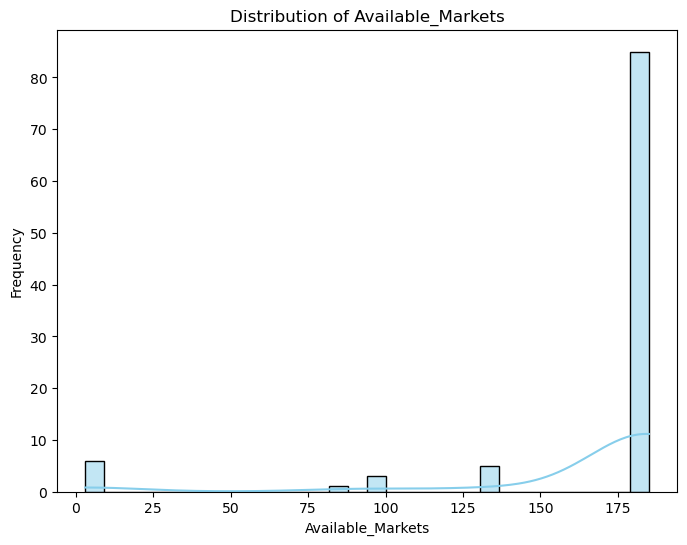

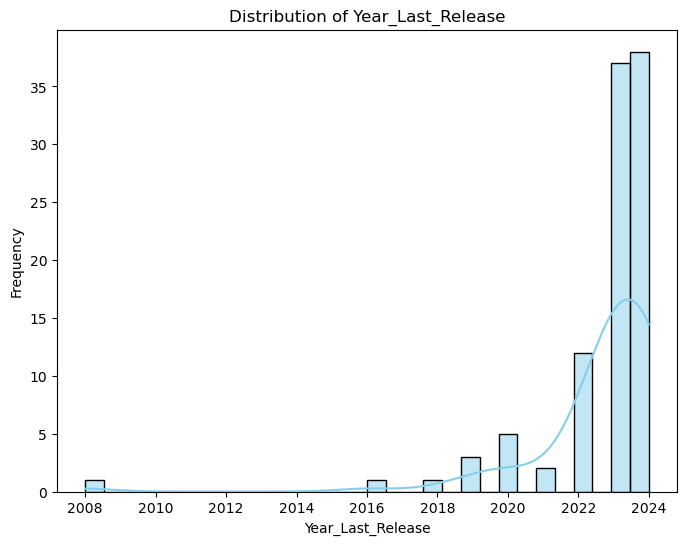

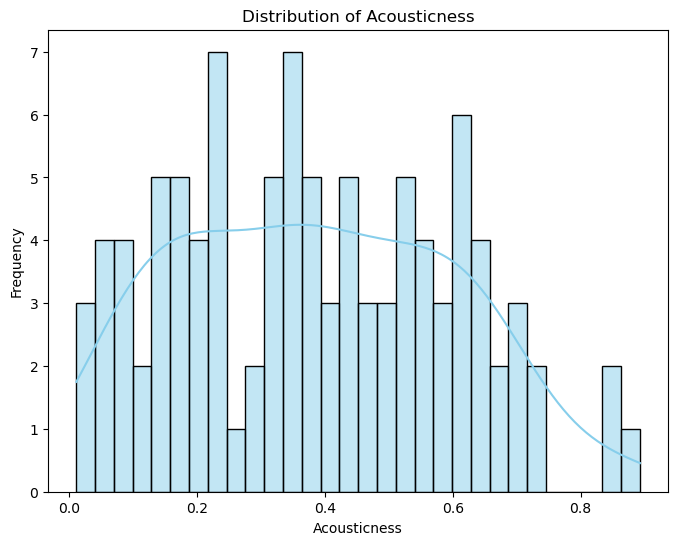

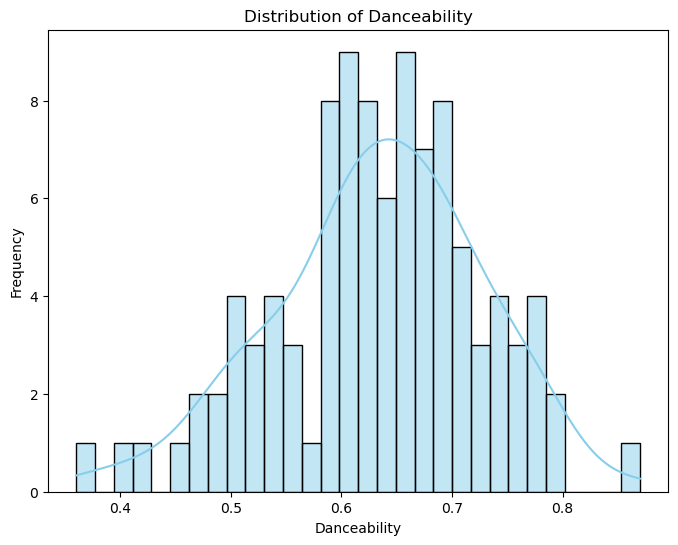

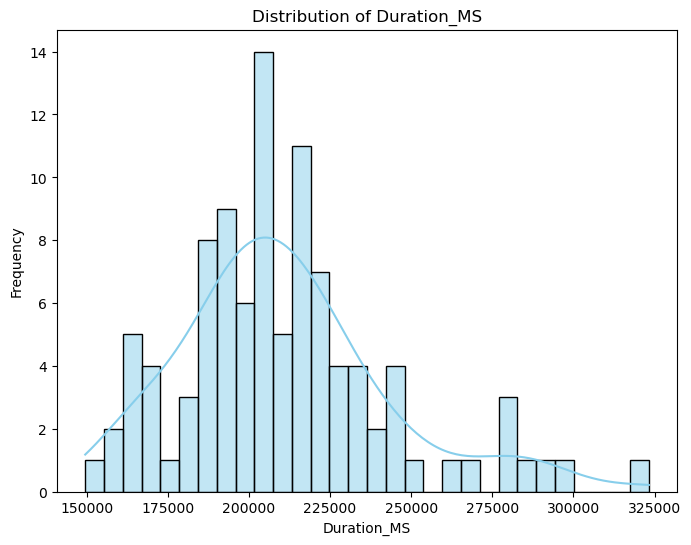

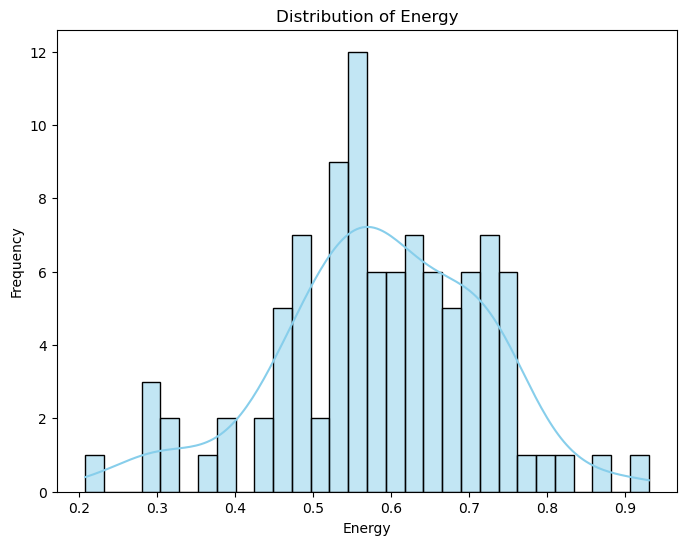

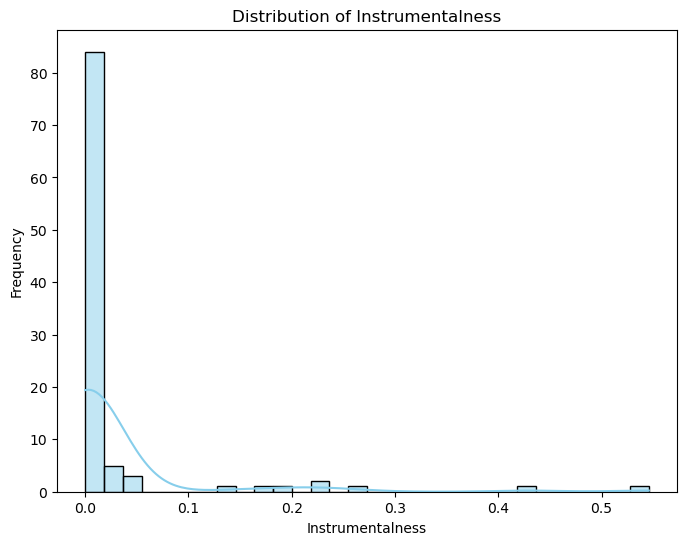

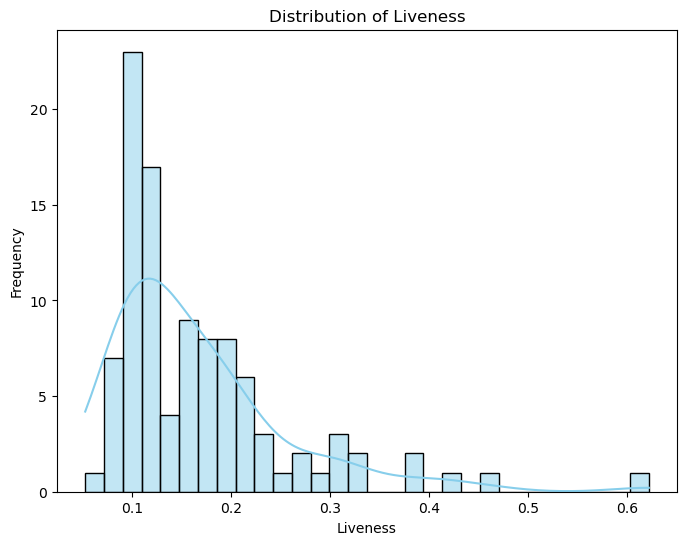

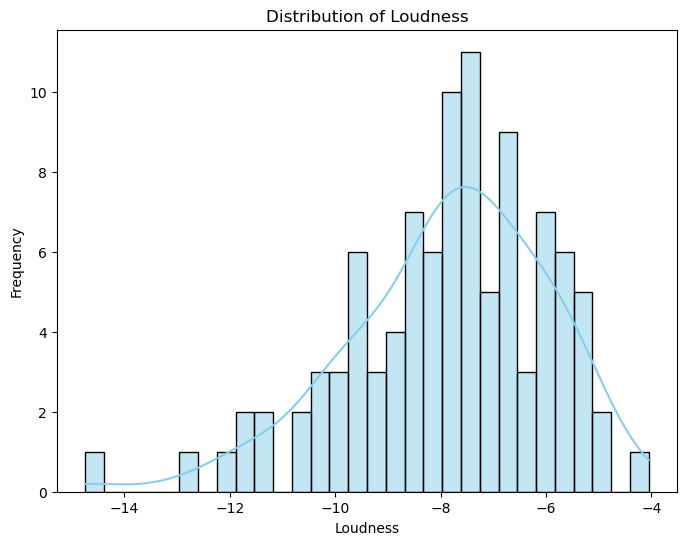

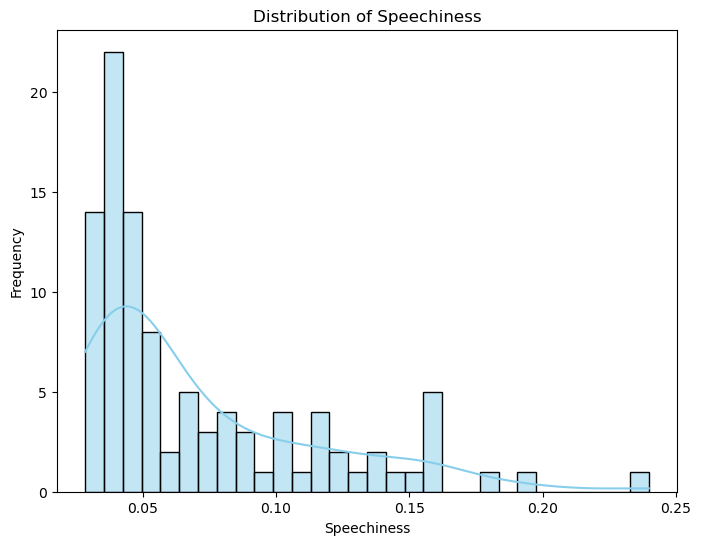

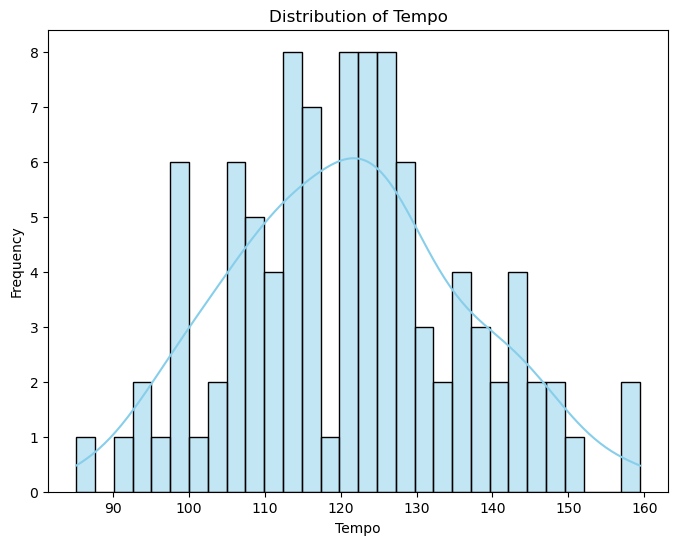

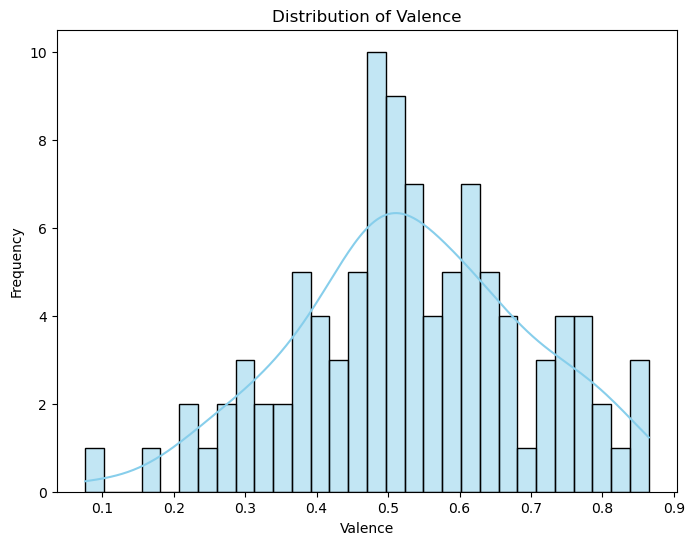

In [87]:
numeric_columns = Network_TS.select_dtypes(include=['float64', 'int64']).columns

# Draw distribution plots for numerical variables 
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=Network_TS, x=column, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### A2 - Categorical variables

In [88]:
# Define a function to compare categorical variables
def compare_categorical_variable(df_1, df_2, variable):
    print(f"Comparison of {variable}:")
    print(f"Clara Luciani's {variable}: {df_1[variable].iloc[0]}")
    print(f"Clara Luciani's alters {variable}:")
    print(df_2[[variable]].value_counts(normalize=True) * 100)
    print("\n")

# Loop through each categorical variable
for col in Network_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name":
        compare_categorical_variable(TS_ego, Network_TS, col)


Comparison of Genres:
Clara Luciani's Genres: ['chanson', 'french pop']
Clara Luciani's alters Genres:
Genres                                                                                                         
['chanson', 'french pop']                                                                                          21.0
['chanson', 'french pop', 'french rock', 'nouvelle chanson francaise']                                             10.0
['chanson', 'french pop', 'french rock']                                                                            9.0
['french pop']                                                                                                      8.0
['french pop', 'variete francaise']                                                                                 6.0
['chanson', 'french rock']                                                                                          5.0
['french indie pop', 'french pop', 'nouvelle chanson francaise'] 

- **Genres:** Within the artist network, the most prevalent genre is "french pop." However, there is a diverse range of genre combinations, including variations like "french rock," "nouvelle chanson francaise," and "variete francaise." This diversity reflects the eclectic musical tastes and influences present among the network.
  
- **Nationality:** In the network, the vast majority, arround 90%, is of French nationality, indicating a strong representation of French artists within the network. Additionally, there are smaller percentages of Belgian and American artists, suggesting a degree of international collaboration and influence in her musical sphere.

- **Type:** The majority (72%) are classified as "Person," representing individual artists. However, there is also a notable presence of groups (27%), indicating collaborative projects or bands. A small proportion falls under the category of "Other," highlighting diverse entities within her network.
  
- **Gender:** There is a balanced distribution of genders, with males, females, and groups each constituting significant proportions. However, the majority are male (43.43%) and female (29.29%), indicating a slightly higher representation of male artists. Additionally, the presence of groups (27.27%) adds to the diversity of gender representations within her network.

Overall, the network exhibits a diverse and inclusive mix of artists across different genders and identities.

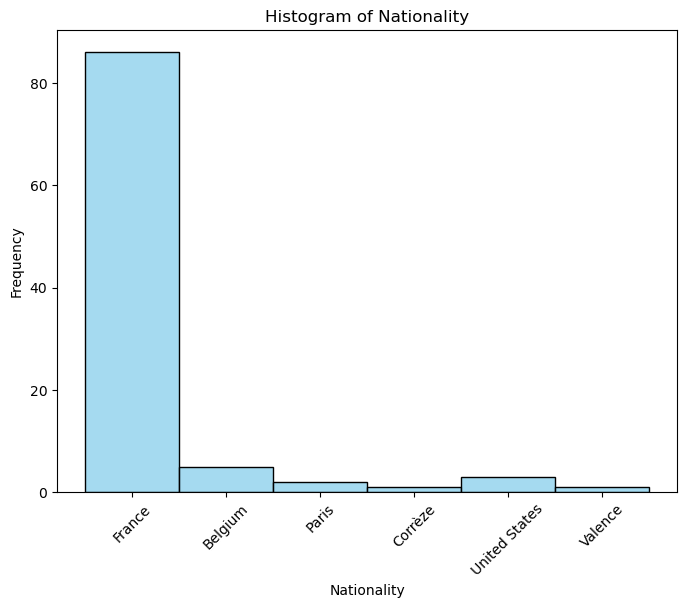

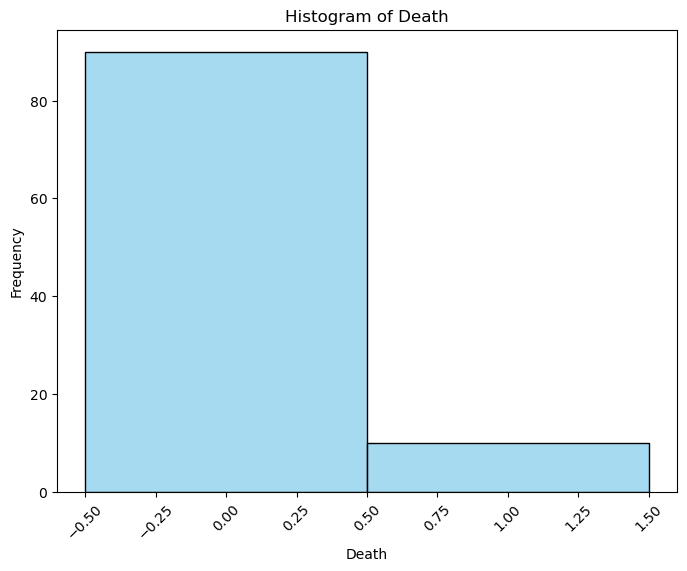

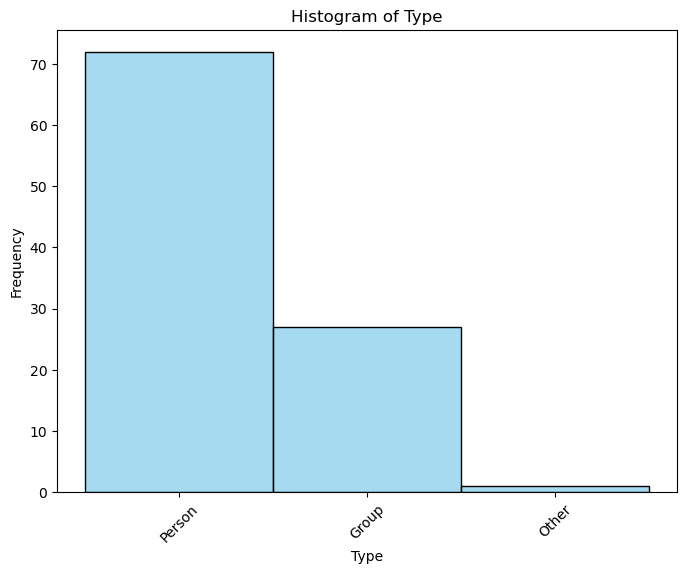

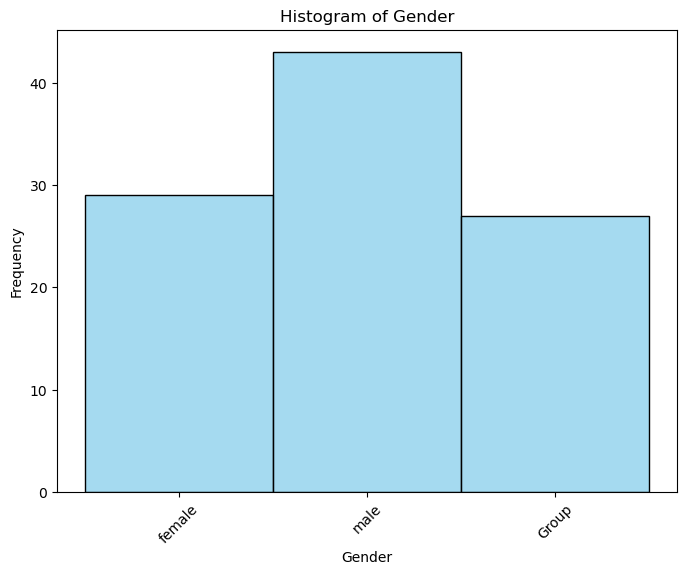

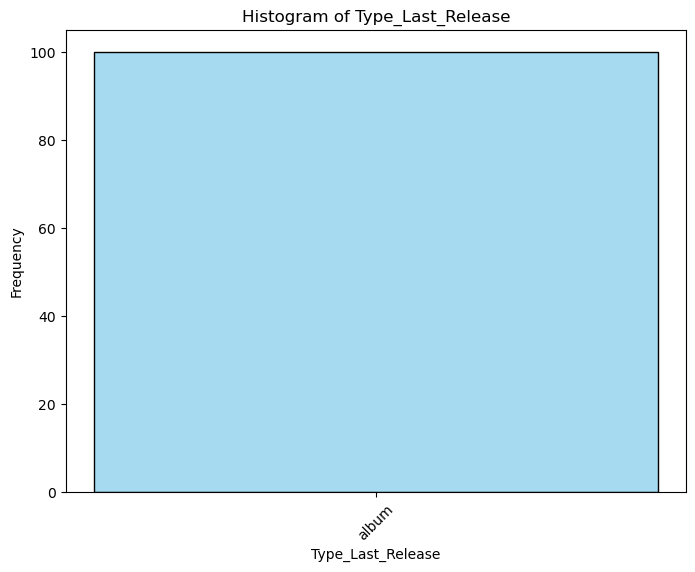

In [89]:
# Loop through each categorical variable except "Artist_Name"
for col in Network_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name" and col != "Genres":
        plt.figure(figsize=(8, 6))
        sns.histplot(data=Network_TS, x=col, color='skyblue', discrete=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

In [90]:
## Blau index (for a categorical variable with more than 2 categories)

# Function
def blau(df, col):
    return (1- ((df[col].value_counts() / df[col].count()) ** 2).sum())
    
# List to store Blau index results
blau_results = {}

# List to store Index of Qualitative Variation results
# This is a normalized version of Blau
# It is equal to Blau * k/(k-1), where k is the number of categories
iqv_results = {}

# List to store Herfindahl-Hirschman index (HHI) results
# equal to 1 - Blau
hhi_results = {}

# Loop through categorical columns except "Artist_Name"
for col in Network_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name" and Network_TS[col].nunique() > 2:  # Check if the column has more than 2 distinct categories
        blau_results[col] = blau(Network_TS, col)  # Calculate Blau index and store the result
        iqv_results[col] = blau(Network_TS, col)*Network_TS[col].nunique()/(Network_TS[col].nunique()-1)
        hhi_results[col] = 1 - blau(Network_TS, col)

# Print Blau index for each eligible categorical variable
for col, index in blau_results.items():
    print(f"Blaux Index for {col}: {index}")

# Print IQV for each eligible categorical variable
for col, index in iqv_results.items():
    print(f"Index of Qualitative Variation for {col}: {index}")

# Print HHI for each eligible categorical variable
for col, index in hhi_results.items():
    print(f"Herfindahl-Hirschman index for {col}: {index}")

Blaux Index for Genres: 0.9174
Blaux Index for Nationality: 0.2257392753019576
Blaux Index for Type: 0.4086000000000001
Blaux Index for Gender: 0.651158045097439
Index of Qualitative Variation for Genres: 0.9428833333333334
Index of Qualitative Variation for Nationality: 0.2708871303623491
Index of Qualitative Variation for Type: 0.6129000000000001
Index of Qualitative Variation for Gender: 0.9767370676461585
Herfindahl-Hirschman index for Genres: 0.0826
Herfindahl-Hirschman index for Nationality: 0.7742607246980424
Herfindahl-Hirschman index for Type: 0.5913999999999999
Herfindahl-Hirschman index for Gender: 0.348841954902561


These statistics provide insights into the diversity and concentration of attributes within Spotify's artist recommendation network:

- **Blaux Index:**
    - For Genres: The Blaux Index of 0.9174 suggests a high level of diversity among the artists' genres. This indicates that a wide range of musical genres is represented, offering users a varied selection of music.
    - For Nationality: With a Blaux Index of 0.2257, there is relatively low diversity in terms of artists' nationalities. This suggests that the recommended artists predominantly hail from a few select countries, potentially reflecting the dominance of certain music markets in Spotify's recommendations.
    - For Type: The Blaux Index of 0.4086 indicates moderate diversity in the types of artists recommended. This suggests a mix of individual artists and groups or bands being recommended to users.
    - For Gender: The Blaux Index of 0.6512 suggests a relatively high diversity in the gender representation of recommended artists. This indicates a balanced or varied mix of male, female, and other gender identities among the recommendations.

- **Index of Qualitative Variation:**
    - For Genres: The Index of Qualitative Variation of 0.9429 reaffirms the high diversity of musical genres among the recommended artists, similar to the Blaux Index.
    - For Nationality: With an Index of Qualitative Variation of 0.2709, there is again a relatively low diversity in the nationalities of recommended artists, consistent with the Blaux Index.
    - For Type: The Index of Qualitative Variation of 0.6129 suggests a moderate level of diversity in the types of recommended artists, similar to the Blaux Index.
    - For Gender: The Index of Qualitative Variation of 0.9767 indicates a very high diversity in the gender representation of recommended artists, echoing the findings from the Blaux Index.

- **Herfindahl-Hirschman Index (HHI):**
    - For Genres: The HHI of 0.0826 suggests a low concentration of recommended artists within specific genres. This indicates a more evenly distributed recommendation of artists across various musical styles.
    - For Nationality: With an HHI of 0.7743, there is a high concentration of recommended artists from certain nationalities. This suggests that the recommendations may be biased towards artists from specific countries or regions.
    - For Type: The HHI of 0.5914 indicates a moderate concentration of recommended artists in terms of their classification as individuals or groups.
    - For Gender: The HHI of 0.3488 suggests a relatively low concentration of recommended artists based on gender, indicating a more balanced representation across different gender identities.

Overall, these statistics highlight the diverse nature of Spotify's artist recommendation network in terms of musical genres, artist types, and gender representation, with some concentration observed in terms of nationality.

## B - Personal network composition indicators

In [91]:
Alters_TS.columns

Index(['Artist_Name', 'NB_Followers', 'Genres', 'Popularity', 'Nationality',
       'Age', 'Death', 'Type', 'Gender', 'Total_Release', 'Available_Markets',
       'Year_Last_Release', 'Type_Last_Release', 'Acousticness',
       'Danceability', 'Duration_MS', 'Energy', 'Instrumentalness', 'Liveness',
       'Loudness', 'Speechiness', 'Tempo', 'Valence'],
      dtype='object')

In [92]:
Alters_TS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Artist_Name        20 non-null     object 
 1   NB_Followers       20 non-null     int64  
 2   Genres             20 non-null     object 
 3   Popularity         20 non-null     int64  
 4   Nationality        19 non-null     object 
 5   Age                18 non-null     float64
 6   Death              20 non-null     bool   
 7   Type               20 non-null     object 
 8   Gender             19 non-null     object 
 9   Total_Release      20 non-null     int64  
 10  Available_Markets  20 non-null     int64  
 11  Year_Last_Release  20 non-null     int64  
 12  Type_Last_Release  20 non-null     object 
 13  Acousticness       20 non-null     float64
 14  Danceability       20 non-null     float64
 15  Duration_MS        20 non-null     float64
 16  Energy             20 non-nu

### B1 - Numerical variables

In [93]:
# Is the network of Clara Luciani homogeneous ? 

for column in Alters_TS.select_dtypes(include=['float64', 'int64']).columns:
    print("Column:", column)
    print("Clara Luciani's", column, TS_ego[column].iloc[0])
    print("Mean:", Alters_TS[column].mean())
    print("Variance:", Alters_TS[column].var())
    print("Standard Deviation:", Alters_TS[column].std())
    print("Quantiles:", Alters_TS[column].quantile([0.25, 0.5, 0.75]))
    print("Minimum:", Alters_TS[column].min())
    print("Maximum:", Alters_TS[column].max())
    print("\n")


Column: NB_Followers
Clara Luciani's NB_Followers 798028
Mean: 581819.4
Variance: 332441916155.0947
Standard Deviation: 576577.762452815
Quantiles: 0.25    205849.75
0.50    450969.50
0.75    666521.75
Name: NB_Followers, dtype: float64
Minimum: 116281
Maximum: 2691914


Column: Popularity
Clara Luciani's Popularity 57
Mean: 54.8
Variance: 44.168421052631594
Standard Deviation: 6.645932669884009
Quantiles: 0.25    49.0
0.50    55.5
0.75    60.0
Name: Popularity, dtype: float64
Minimum: 44
Maximum: 66


Column: Age
Clara Luciani's Age 32.0
Mean: 40.333333333333336
Variance: 187.64705882352942
Standard Deviation: 13.698432714129359
Quantiles: 0.25    32.25
0.50    41.50
0.75    50.00
Name: Age, dtype: float64
Minimum: 4.0
Maximum: 62.0


Column: Total_Release
Clara Luciani's Total_Release 20
Mean: 20.0
Variance: 0.0
Standard Deviation: 0.0
Quantiles: 0.25    20.0
0.50    20.0
0.75    20.0
Name: Total_Release, dtype: float64
Minimum: 20
Maximum: 20


Column: Available_Markets
Clara Lucian

Comparing the characteristics of the overall artist network on Spotify and those recommended when listening to Clara Luciani, several observations can be made regarding the characteristics potentially used by Spotify in its artist recommendation process:

- **Number of followers (NB_Followers):** In the overall network, the average number of followers is 382,854, while for artists recommended with Clara Luciani, it's slightly higher, with an average of 581,819.4. This suggests that Spotify may recommend artists with a similar or larger fan base than Clara Luciani.

- **Popularity:** The average popularity in the overall network is 49.91, while for artists recommended with Clara Luciani, it's slightly higher, with an average of 54.8. This indicates that Spotify might prioritize recommending similarly popular artists to Clara Luciani.

- **Age:** Clara Luciani is 32 yo. The average age of artists in the overall network is 39.20 years old, while for artists recommended with Clara Luciani, it's slightly higher, with an average of 40.33 years old. This suggests that Spotify could recommend artists with similar or greater experience than Clara Luciani.

- **Total releases (Total_Release):** In the overall network, the average number of releases is 19.18, and for artists recommended with Clara Luciani, it's 20. This suggests that Spotify might prioritize artists with a more extensive history of music releases.

- **Availability in markets (Available_Markets):** The average availability in markets in the overall network is 167.34, while for artists recommended with Clara Luciani, it's slightly lower, with an average of 156.95. This suggests that Spotify could recommend artists with a slightly less extensive global presence than Clara Luciani, who is availbale on 183 markets.

- **Year of last release (Year_Last_Release):** The average year of last release in the overall network is 2022.68, while for artists recommended with Clara Luciani, it's slightly higher, with an average of 2023.25. This indicates that Spotify might recommend newer or more recently active artists in priority.

- **Audio characteristics (Acousticness, Danceability, Energy, etc.):** Audio characteristics such as acousticness, danceability, energy, etc., may also be considered by Spotify to recommend artists with similar musical styles and sound.
  
In summary, Spotify appears to use a combination of factors such as popularity, age, recent activity, fan base size, and audio characteristics to recommend artists similar to Clara Luciani in its artist recommendation process.

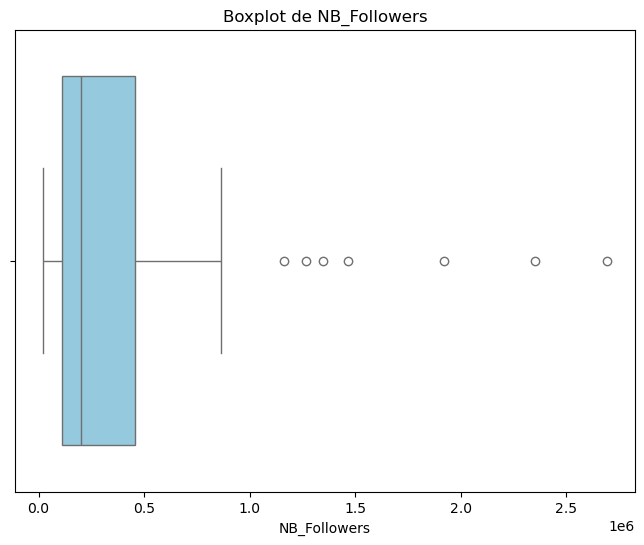

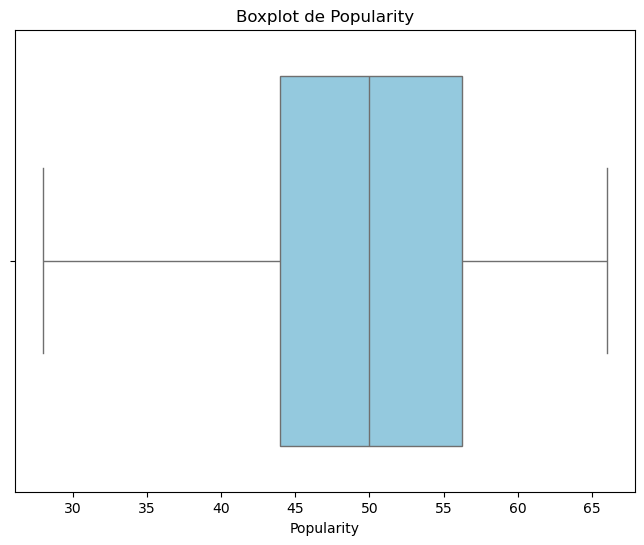

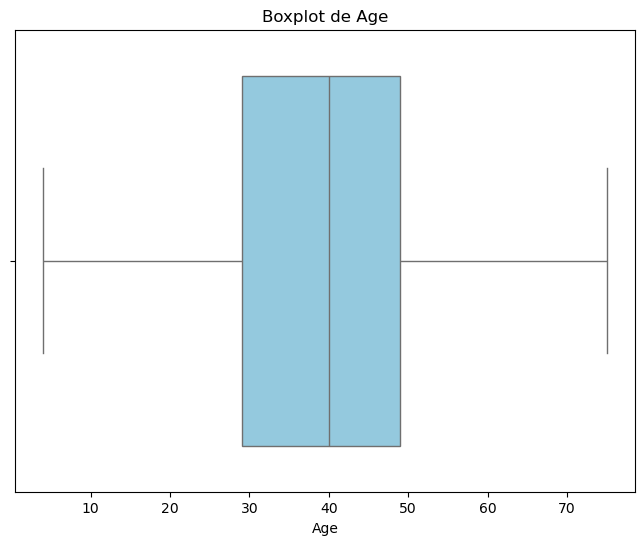

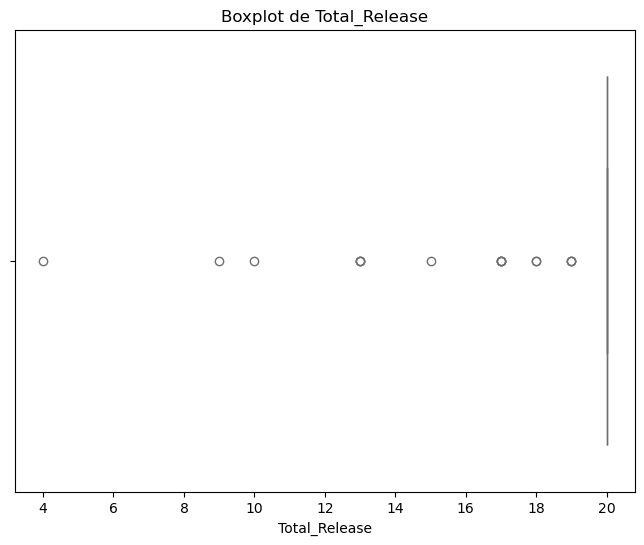

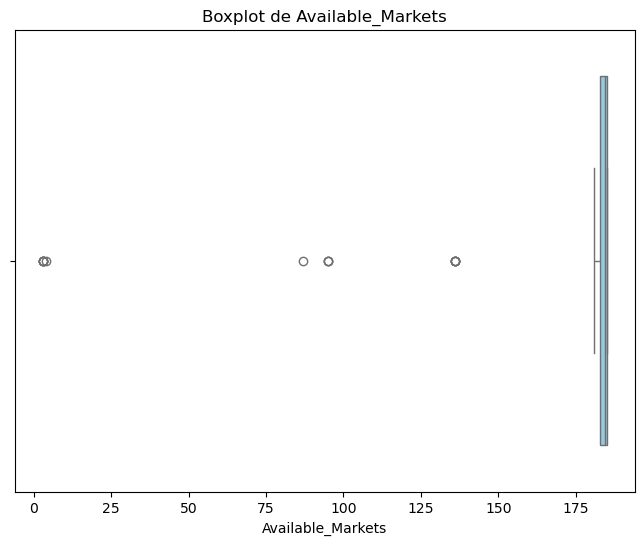

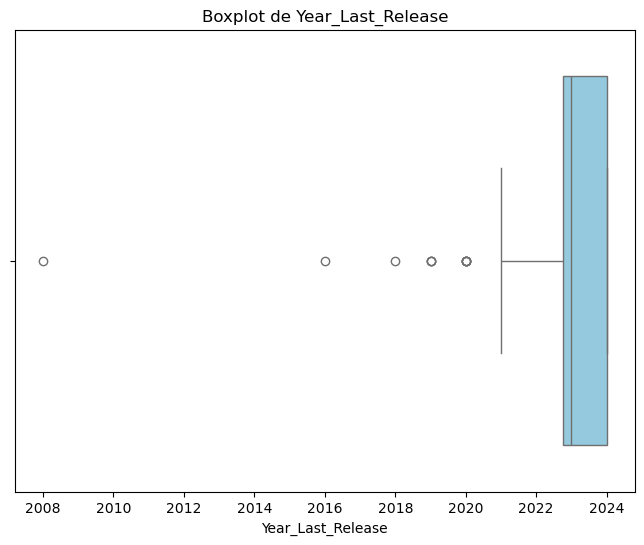

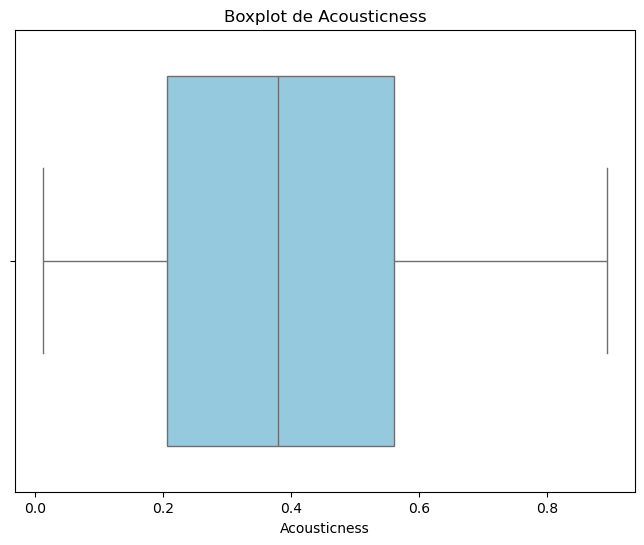

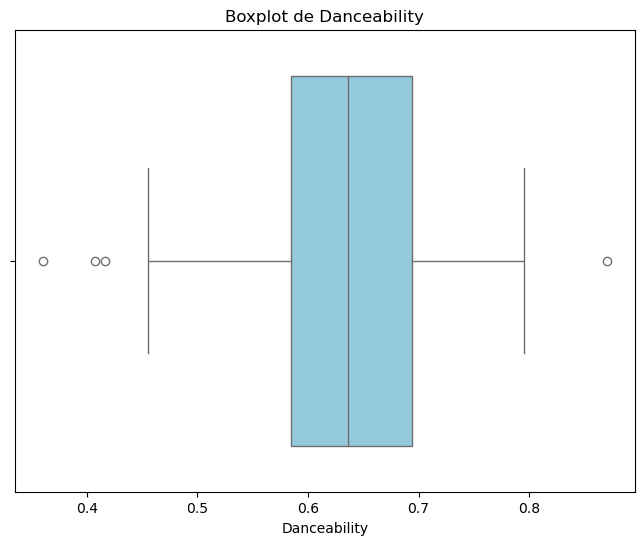

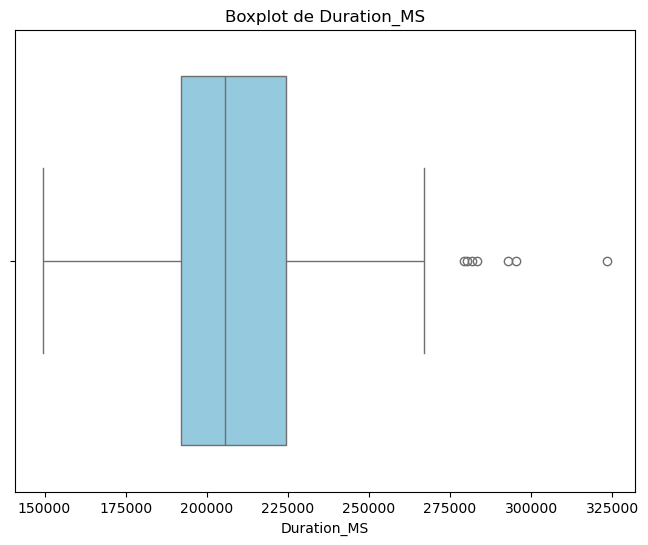

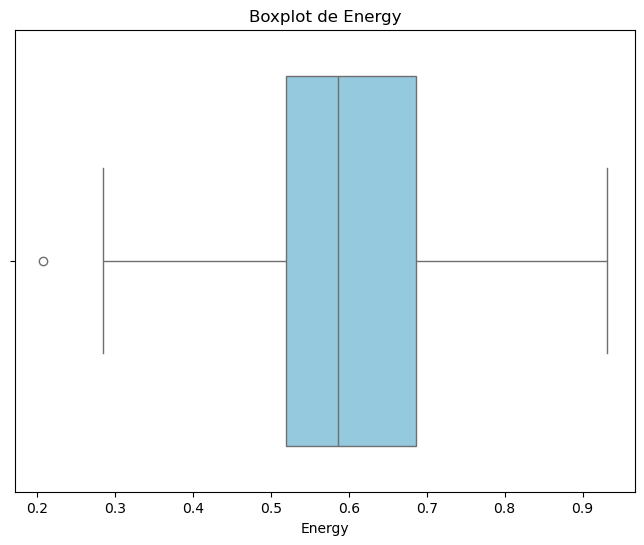

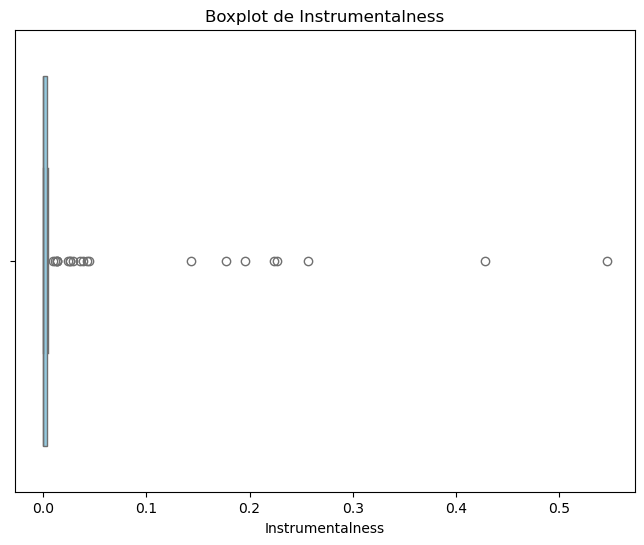

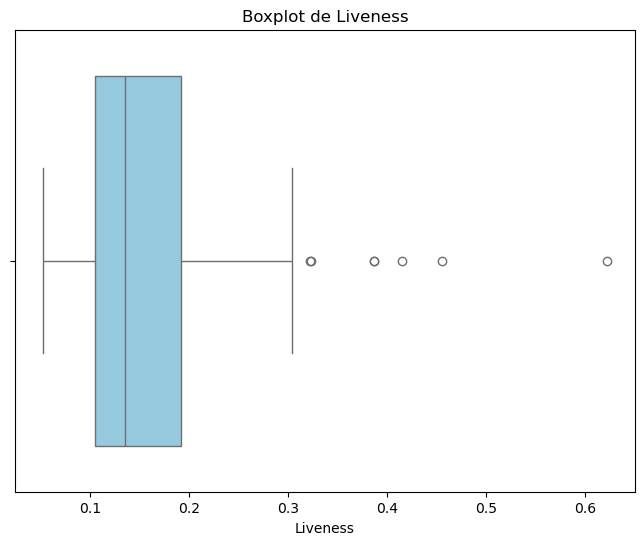

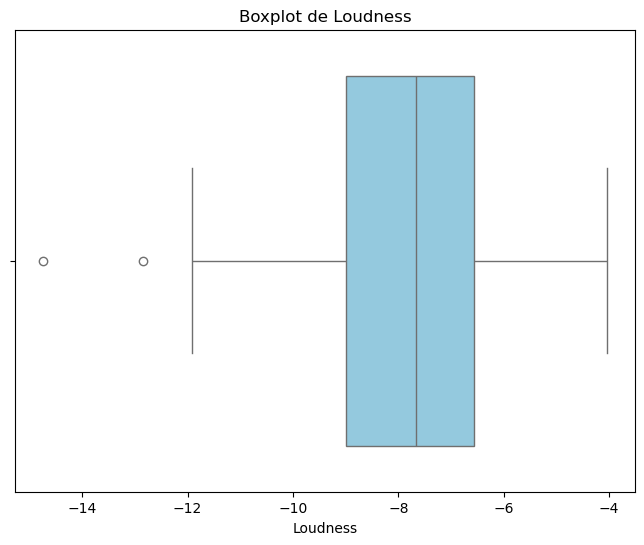

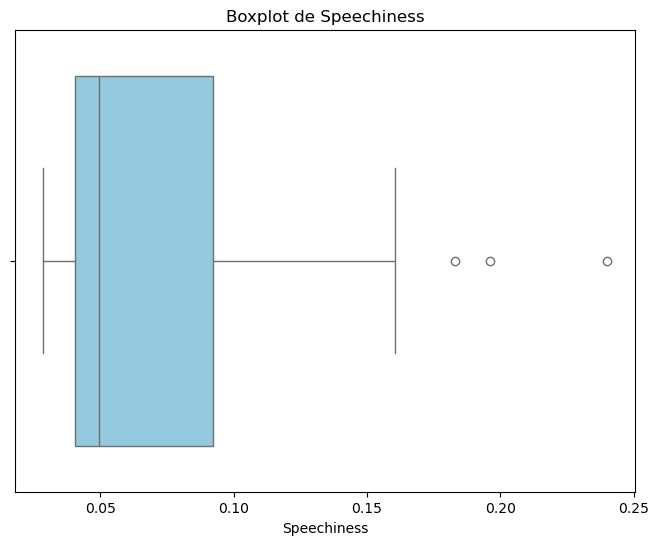

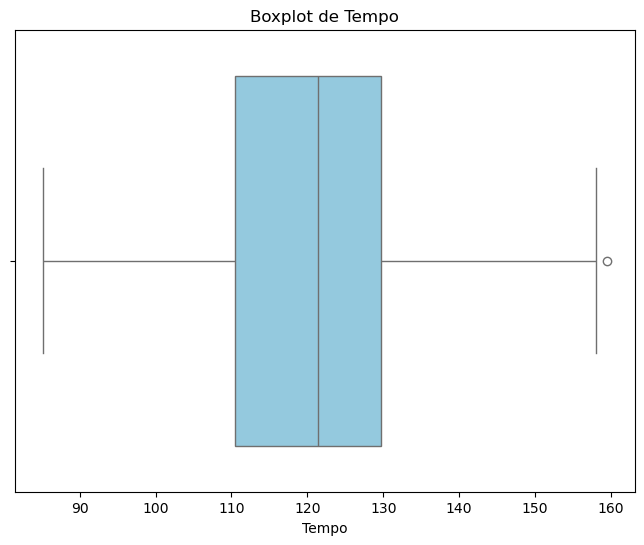

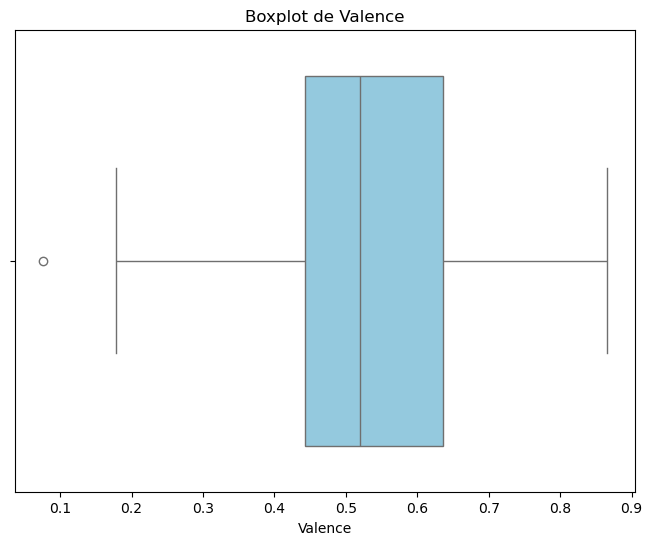

In [94]:
# Draw boxplots for all numerical variables

numeric_columns = Alters_TS.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Network_TS[column], color='skyblue')
    plt.title(f'Boxplot de {column}')
    plt.show()

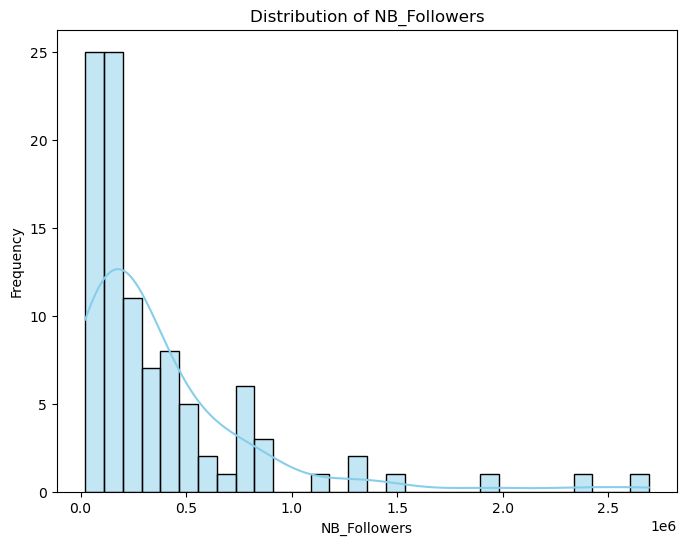

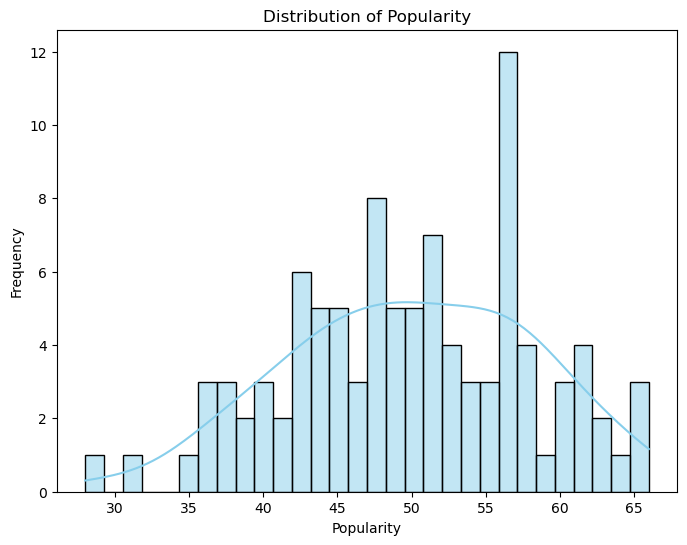

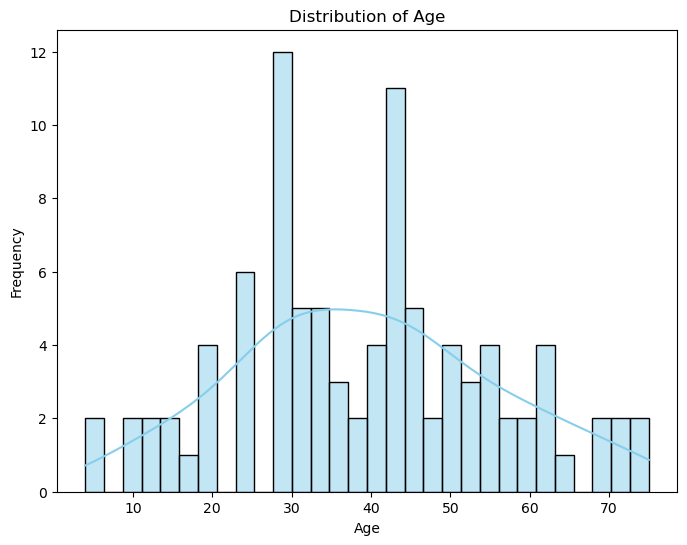

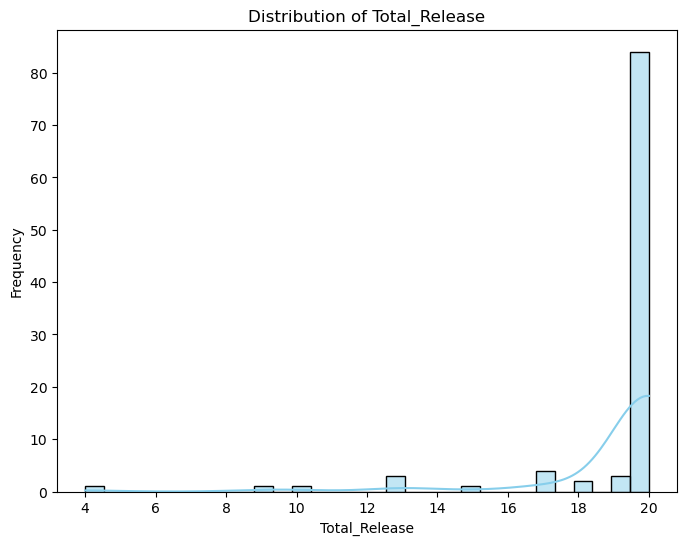

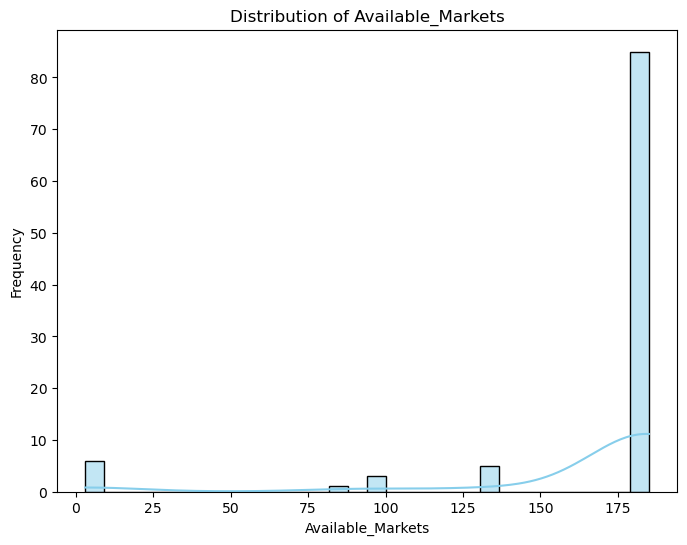

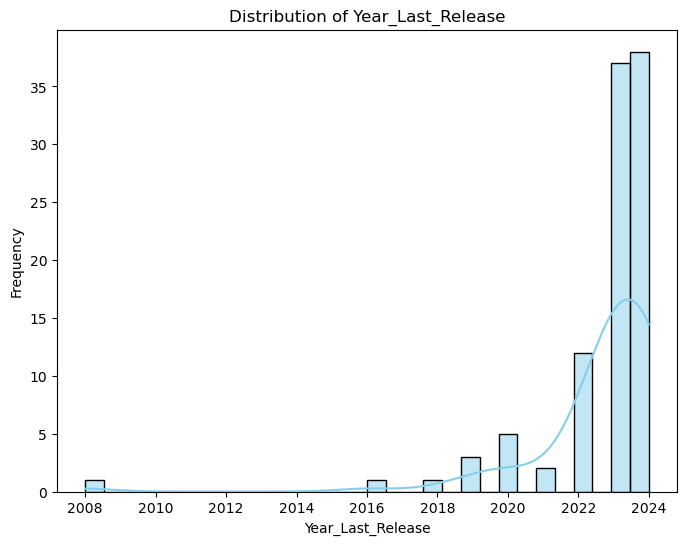

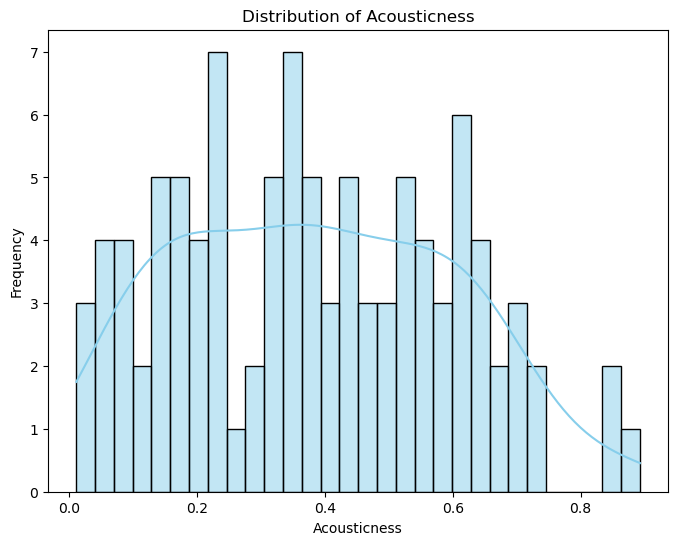

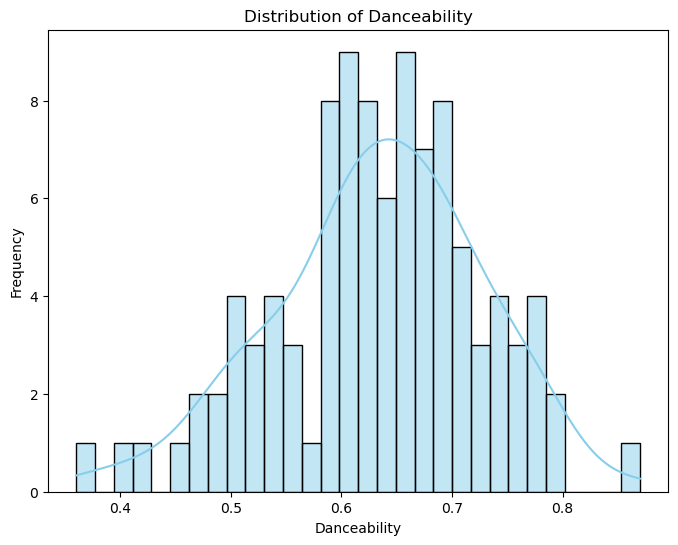

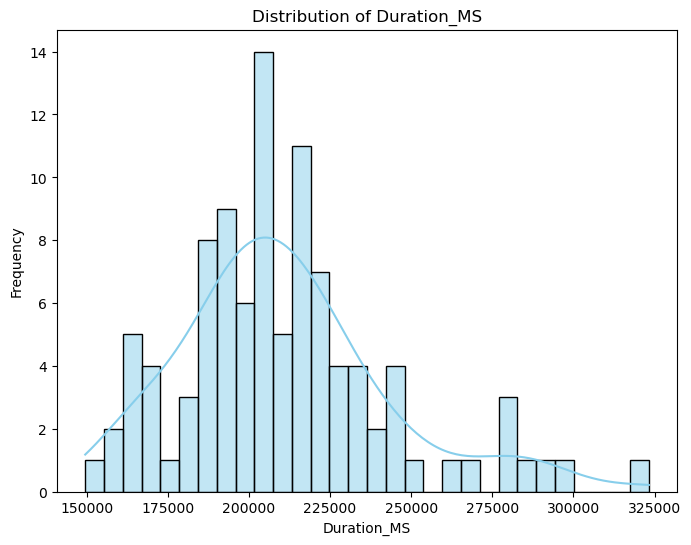

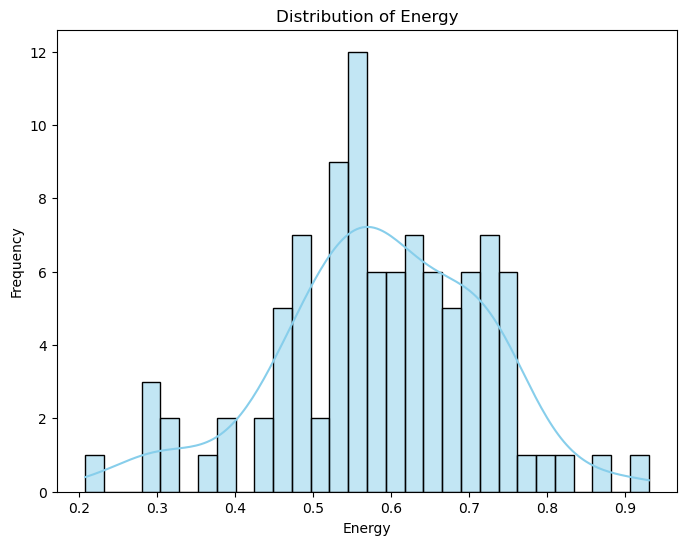

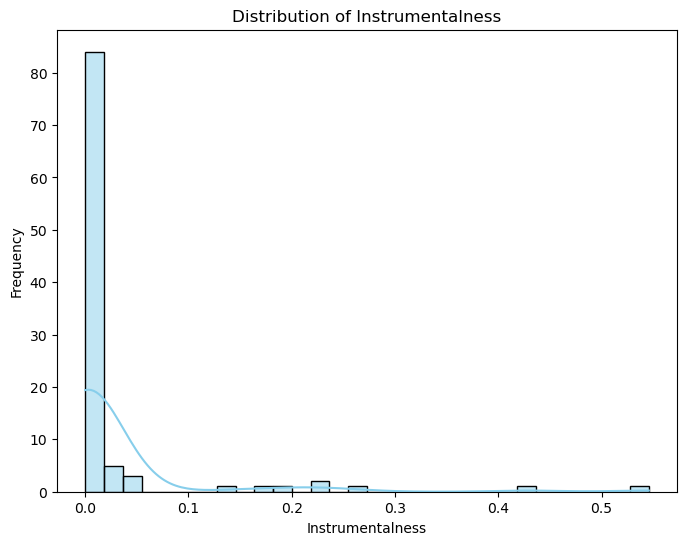

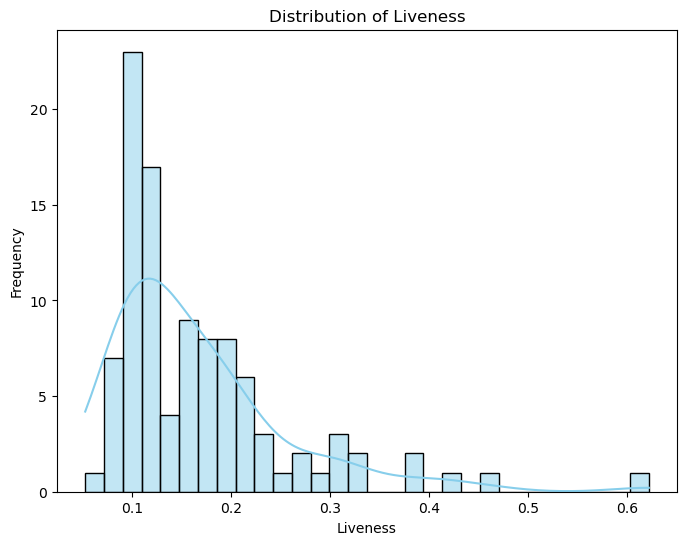

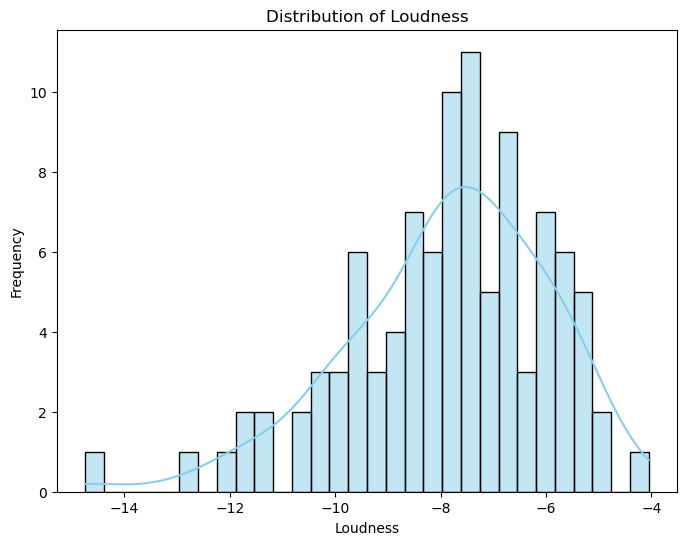

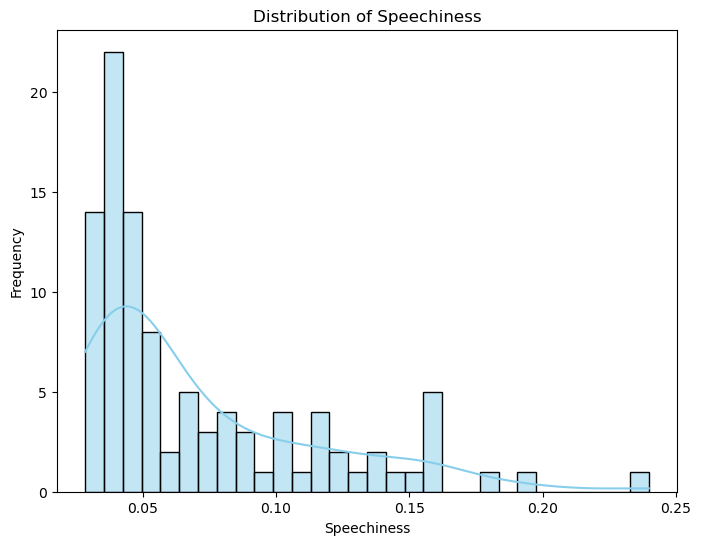

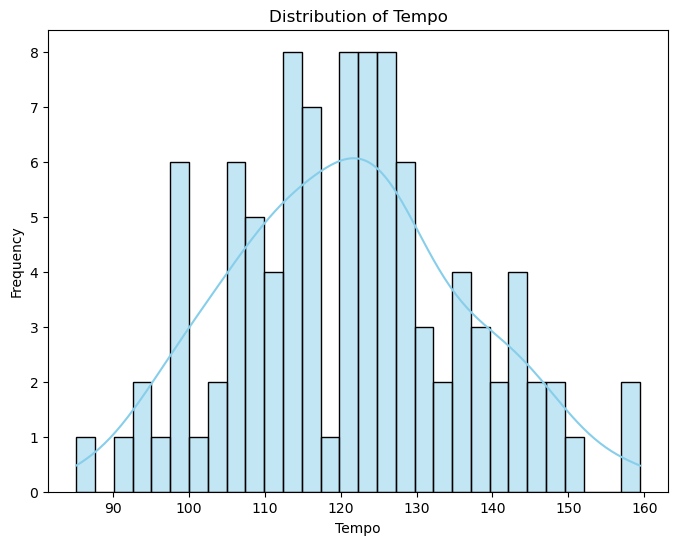

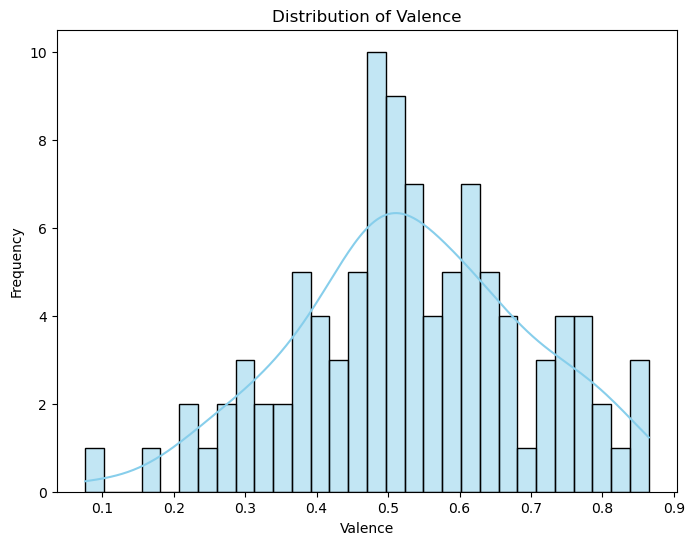

In [95]:
numeric_columns = Alters_TS.select_dtypes(include=['float64', 'int64']).columns

# Draw distribution plots for numerical variables 
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=Network_TS, x=column, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### B2 - Categorical variables

In [96]:
# Define a function to compare categorical variables
def compare_categorical_variable(df_1, df_2, variable):
    print(f"Comparison of {variable}:")
    print(f"Clara Luciani's {variable}: {df_1[variable].iloc[0]}")
    print(f"Clara Luciani's alters {variable}:")
    print(df_2[[variable]].value_counts(normalize=True) * 100)
    print("\n")

# Loop through each categorical variable
for col in Alters_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name":
        compare_categorical_variable(TS_ego, Alters_TS, col)


Comparison of Genres:
Clara Luciani's Genres: ['chanson', 'french pop']
Clara Luciani's alters Genres:
Genres                                                                                             
['chanson', 'french pop']                                                                              25.0
['chanson', 'french pop', 'french rock', 'nouvelle chanson francaise']                                 10.0
['chanson', 'french pop', 'french rock']                                                               10.0
['chanson', 'french pop', 'variete francaise']                                                         10.0
['belgian pop', 'french pop', 'variete francaise']                                                      5.0
['chanson', 'electro-pop francais', 'french indie pop', 'french pop', 'nouvelle chanson francaise']     5.0
['chanson', 'french indie folk', 'french pop', 'nouvelle chanson francaise']                            5.0
['chanson', 'french rock', 'nouvelle chan

When comparing the entire network and Clara Luciani's alters, we can interpret the results to identify the characteristics potentially used by Spotify in the artist recommendation process:

- **Genres:** Clara Luciani's primary genre is "french pop," which is also prevalent among her alters. Other common genres include "french rock," "nouvelle chanson francaise," and "variete francaise." This suggests that Spotify likely recommends artists who share similar genre characteristics with Clara Luciani.
  
- **Nationality:** The majority of Clara Luciani's alters are from France, aligning with Clara Luciani's nationality. This indicates a preference for artists from the same country. However, there are also some alters from Belgium (which is also a French speaking country). Spotify may consider local or artists with the same cultural/linguistic background in its recommendations. 

- **Type:** Clara Luciani and her alters are mostly categorized as "Person," indicating individual artists. However, there are also some alters categorized as "Group." Spotify likely recommends both solo artists and groups to cater to diverse listener preferences, but still priorizes solo artists.

- **Gender:** Clara Luciani is female, and there is a slightly higher proportion of male alters compared to female alters in the network. This indicates that Spotify's recommendations may not be biased toward gender but rather focus on diverse representation.


Gender-wise, the recommended artists have a slightly higher proportion of males, but there is still a significant representation of female artists.
In summary, Spotify's artist recommendation process likely considers factors such as genre similarity, nationality, activity status, artist type, and gender representation to provide diverse and personalized recommendations to users listening to Clara Luciani.

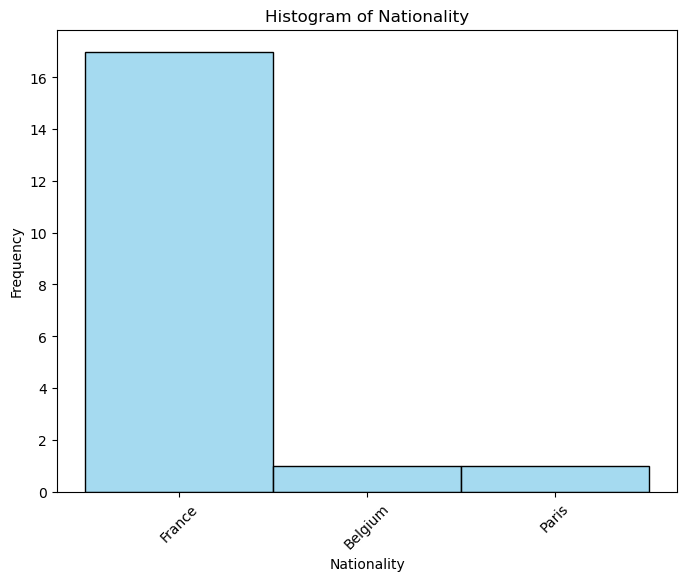

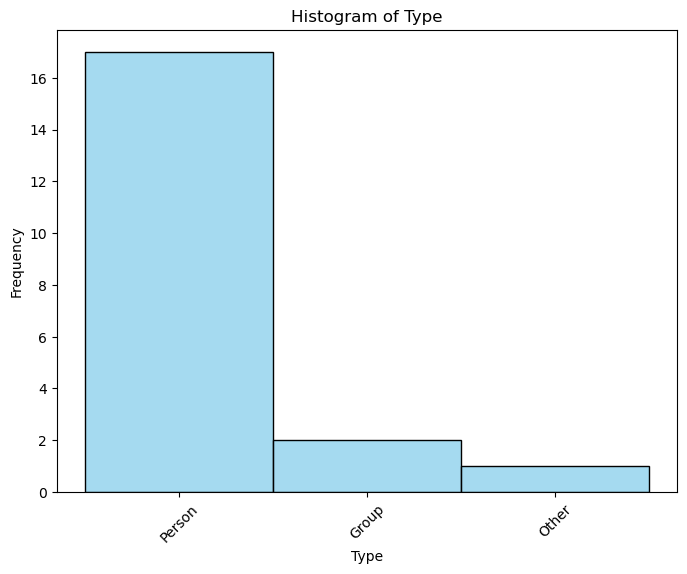

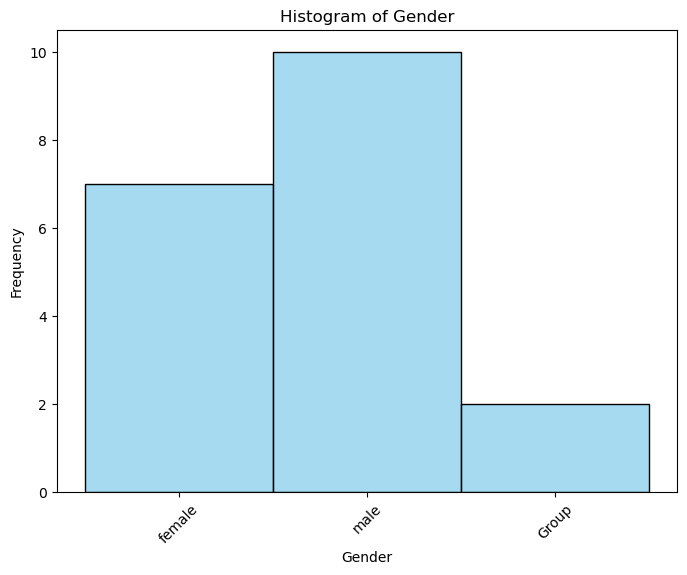

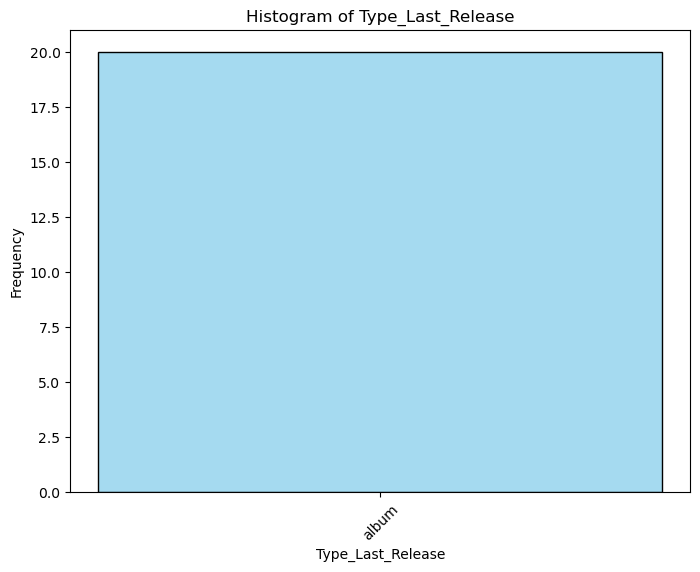

In [97]:
# Loop through each categorical variable except "Artist_Name"
for col in Alters_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name" and col != "Genres":
        plt.figure(figsize=(8, 6))
        sns.histplot(data=Alters_TS, x=col, color='skyblue', discrete=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show() 

In [98]:
## Blau index (for a categorical variable with more than 2 categories)

# Function
def blau(df, col):
    return (1- ((df[col].value_counts() / df[col].count()) ** 2).sum())
    
# List to store Blau index results
blau_results = {}

# List to store Index of Qualitative Variation results
# This is a normalized version of Blau
# It is equal to Blau * k/(k-1), where k is the number of categories
iqv_results = {}

# List to store Herfindahl-Hirschman index (HHI) results
# equal to 1 - Blau
hhi_results = {}

# Loop through categorical columns except "Artist_Name"
for col in Alters_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name" and Alters_TS[col].nunique() > 2:  # Check if the column has more than 2 distinct categories
        blau_results[col] = blau(Alters_TS, col)  # Calculate Blau index and store the result
        iqv_results[col] = blau(Alters_TS, col)*Alters_TS[col].nunique()/(Alters_TS[col].nunique()-1)
        hhi_results[col] = 1 - blau(Alters_TS, col)

# Print Blau index for each eligible categorical variable
for col, index in blau_results.items():
    print(f"Blaux Index for {col}: {index}")

# Print IQV for each eligible categorical variable
for col, index in iqv_results.items():
    print(f"Index of Qualitative Variation for {col}: {index}")

# Print HHI for each eligible categorical variable
for col, index in hhi_results.items():
    print(f"Herfindahl-Hirschman index for {col}: {index}")

Blaux Index for Genres: 0.885
Blaux Index for Nationality: 0.19390581717451527
Blaux Index for Type: 0.2650000000000001
Blaux Index for Gender: 0.5761772853185596
Index of Qualitative Variation for Genres: 0.9587500000000001
Index of Qualitative Variation for Nationality: 0.2908587257617729
Index of Qualitative Variation for Type: 0.3975000000000002
Index of Qualitative Variation for Gender: 0.8642659279778394
Herfindahl-Hirschman index for Genres: 0.11499999999999999
Herfindahl-Hirschman index for Nationality: 0.8060941828254847
Herfindahl-Hirschman index for Type: 0.7349999999999999
Herfindahl-Hirschman index for Gender: 0.4238227146814404


These statistical metrics offer valuable insights into the diversity and concentration of attributes within the wider network and particularly among artists recommended by Spotify when Clara Luciani's music is streamed.

- **Blaux Index:**
    - Genres: The Blaux Index gauges the diversity of genres, with higher values indicating greater diversity. Across the entire network, the Blaux Index for genres stands at 0.9174, suggesting a rich diversity of musical genres among all artists. However, when focusing on Clara Luciani's recommended artists, the Blaux Index for genres slightly dips to 0.885, indicating a nuanced reduction in recommended genre diversity compared to the entire network.
    - Nationality: For nationality diversity, the Blaux Index is 0.2257 in the overall network, signifying a moderate diversity of nationalities among all artists. Yet, when considering Clara Luciani's recommendations, the Blaux Index for nationality diminishes to 0.1939, suggesting a decreased diversity in recommended nationalities compared to the broader network.
    - Gender: Regarding gender diversity, the Blaux Index is 0.6512 across the entire network, indicating a moderate diversity of genders among all artists. However, within Clara Luciani's recommendations, the Blaux Index for gender slightly rises to 0.5762, suggesting a marginally higher diversity in recommended genders compared to the overall network.

- **Index of Qualitative Variation:**
    - Genres: This index measures the variability of genres, with higher values indicating greater variability. Across the entire network, the Index of Qualitative Variation for genres is 0.9429, suggesting a high variability of genres among all artists. Yet, among Clara Luciani's recommended artists, the Index of Qualitative Variation for genres slightly declines to 0.9588, implying a nuanced reduction in recommended genre variability compared to the entire network.
    - Nationality: When it comes to nationality variability, the overall network showcases an Index of Qualitative Variation of 0.2709, indicating a moderate variability of nationalities among all artists. However, among Clara Luciani's recommendations, this index slightly increases to 0.2909, suggesting a slightly heightened variability in recommended nationalities compared to the broader network.
    - Gender: The Index of Qualitative Variation for gender is 0.9767 across the entire network, indicating a high variability of genders among all artists. Yet, within Clara Luciani's recommendations, this index rises to 0.8643, signifying an increased variability in recommended genders compared to the overall network.

- **Herfindahl-Hirschman Index (HHI):**
    - Genres: This index reflects the concentration of genres, with higher values indicating greater concentration. Across the entire network, the HHI for genres is 0.0826, indicating low concentration of genres among all artists. However, among Clara Luciani's recommended artists, the HHI for genres rises to 0.115, indicating a higher concentration of genres among recommendations compared to the entire network.
    - Nationality: For nationality concentration, the overall network exhibits an HHI of 0.7743, indicating moderate concentration of nationalities among all artists. Nevertheless, among Clara Luciani's recommendations, this index increases to 0.8061, indicating a higher concentration of nationalities compared to the broader network.
    - Gender: The HHI for gender across the entire network is 0.3488, indicating moderate concentration of genders among all artists. However, within Clara Luciani's recommendations, this index slightly decreases to 0.4238, indicating a lower concentration of genders among recommended artists compared to the overall network.

In summary, these statistics suggest that while there is generally high diversity in genres, nationalities, and genders among artists in the broader network, the recommendations made by Spotify when Clara Luciani's music is played might exhibit slightly lower diversity and higher concentration in some aspects, such as genres and nationalities. Nevertheless, there remains considerable variability and relatively low concentration in recommended characteristics, indicating that Spotify likely aims to provide diverse recommendations even within specific contexts like Clara Luciani's music.

### B3 - Structural measures

In [99]:
# Find isolates (components consisting in 1 node)
list(nx.isolates(EgoNetTS)) 

[]

In [100]:
# Density
print("Density :", nx.density(EgoNetTS))

# Transitivity
print("Transitivity :", nx.transitivity(EgoNetTS)) 

# Diameter : we need to use the unidrected version of the graph because it is not strongly connected
EgoNetTS_UG = nx.DiGraph.to_undirected(EgoNetTS)
print("Diameter :", nx.diameter(EgoNetTS_UG)) 

print("Average shortest path length :", nx.average_shortest_path_length(EgoNetTS_UG)) 

Density : 0.2394736842105263
Transitivity : 0.3588235294117647
Diameter : 4
Average shortest path length : 1.7947368421052632


These statistical measures provide insights into the structural characteristics of the network as a whole and specifically among the artists recommended by Spotify when Clara Luciani's music is played.

- **Density:**
    - Entire Network: The density of the entire network is 0.1096, indicating that roughly 10.96% of all possible connections between artists exist in the network. This suggests a relatively sparse network where not every artist is directly connected to every other artist.
    - Clara Luciani's Recommendations: The density of the network comprising only the artists recommended by Spotify when listening to Clara Luciani is notably higher at 0.2395. This suggests a denser network of connections among recommended artists compared to the entire network. In the context of Spotify's artist recommendations, this higher density implies a stronger interconnectivity or similarity among the recommended artists, potentially reflecting a narrower range of musical styles or genres within Clara Luciani's recommended pool.

- **Transitivity:**
    - Entire Network: The transitivity of the entire network is 0.443, indicating the extent to which artist connections tend to form triangles or closed loops. This suggests a moderate level of clustering or community structure within the network, where artists who are connected to the same artist are likely to be connected to each other as well.
    - Clara Luciani's Recommendations: The transitivity of the network for Clara Luciani's recommendations is slightly lower at 0.3588. This indicates a relatively lower tendency for connected artists to form closed loops compared to the entire network. In Spotify's recommendation context, this could suggest that while there is still some clustering among recommended artists, it might not be as pronounced as in the broader network, potentially reflecting a wider range of musical influences or styles among Clara Luciani's recommended artists.

- **Diameter:**
    - Entire Network: The diameter of the entire network is 4, indicating the maximum number of steps it takes to reach the farthest pair of artists in the network. This suggests relatively short paths of connection between most artists in the network.
    - Clara Luciani's Recommendations: The diameter remains the same at 4 for Clara Luciani's recommendations, indicating a similar maximum distance between artists as in the entire network. This implies that even within Clara Luciani's recommended pool, there are relatively short paths of connection between most artists, facilitating efficient navigation and exploration of recommended music.

- **Average Shortest Path Length:**
    - Entire Network: The average shortest path length in the entire network is 2.3311, indicating the average number of steps it takes to connect any pair of artists. This suggests relatively short average distances between artists in the network.
    - Clara Luciani's Recommendations: The average shortest path length is notably lower at 1.7947 for Clara Luciani's recommendations. This indicates shorter average distances between recommended artists compared to the entire network, implying that artists recommended alongside Clara Luciani are more closely connected on average. In Spotify's recommendation context, this could signify a more cohesive and tightly connected group of artists within Clara Luciani's recommended pool.

In [101]:
# degree centrality
nx.degree_centrality(EgoNetTS)

{'Suzane': 0.47368421052631576,
 'Eddy de Pretto': 0.631578947368421,
 'Hoshi': 0.8421052631578947,
 'Therapie TAXI': 0.42105263157894735,
 'Juliette Armanet': 0.7368421052631579,
 'Camélia Jordana': 0.47368421052631576,
 '-M-': 0.15789473684210525,
 'Gaëtan Roussel': 0.3157894736842105,
 'Jenifer': 0.47368421052631576,
 'Christophe Willem': 0.47368421052631576,
 'Zazie': 0.7368421052631579,
 'Les Frangines': 0.21052631578947367,
 'Vianney': 0.47368421052631576,
 'Marc Lavoine': 0.47368421052631576,
 'Calogero': 0.3684210526315789,
 'Grand Corps Malade': 0.631578947368421,
 'Angèle': 0.47368421052631576,
 'Julien Doré': 0.8421052631578947,
 'Benjamin Biolay': 0.21052631578947367,
 'Michel Berger': 0.15789473684210525}

In [102]:
# The 2 artists with the highest indegree centrality
highest_indegree = sorted(nx.in_degree_centrality(EgoNetTS).items(), key=lambda x: x[1], reverse=True)[:2]
print("The 2 artists with the highest indegree centrality:")
for artist, centrality in highest_indegree:
    print(artist, centrality)

# The 2 artists with the highest outdegree centrality
highest_outdegree = sorted(nx.out_degree_centrality(EgoNetTS).items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest outdegree centrality:")
for artist, centrality in highest_outdegree:
    print(artist, centrality)

# The 2 artists with the highest degree centrality
highest_degree = sorted(nx.degree_centrality(EgoNetTS).items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest degree centrality:")
for artist, centrality in highest_degree:
    print(artist, centrality)

# The 2 artists with the lowest indegree centrality
lowest_indegree = sorted(nx.in_degree_centrality(EgoNetTS).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest indegree centrality:")
for artist, centrality in lowest_indegree:
    print(artist, centrality)

# The 2 artists with the lowest outdegree centrality
lowest_outdegree = sorted(nx.out_degree_centrality(EgoNetTS).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest outdegree centrality:")
for artist, centrality in lowest_outdegree:
    print(artist, centrality)

# The 2 artists with the lowest degree centrality
lowest_degree = sorted(nx.degree_centrality(EgoNetTS).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest degree centrality:")
for artist, centrality in lowest_degree:
    print(artist, centrality)

The 2 artists with the highest indegree centrality:
Zazie 0.5263157894736842
Hoshi 0.3684210526315789

The 2 artists with the highest outdegree centrality:
Julien Doré 0.5789473684210527
Hoshi 0.47368421052631576

The 2 artists with the highest degree centrality:
Hoshi 0.8421052631578947
Julien Doré 0.8421052631578947

The 2 artists with the lowest indegree centrality:
Angèle 0.05263157894736842
-M- 0.10526315789473684

The 2 artists with the lowest outdegree centrality:
Gaëtan Roussel 0.0
-M- 0.05263157894736842

The 2 artists with the lowest degree centrality:
-M- 0.15789473684210525
Michel Berger 0.15789473684210525


In the broader network of artist recommendations on Spotify, Renan Luce and Grégoire emerge as the most influential figures, receiving the highest number of recommendations from other artists. Conversely, Vanessa Paradis and Jean-Jacques Goldman have minimal influence, receiving very few recommendations and making few themselves.

When focusing specifically on artists recommended alongside Clara Luciani, Zazie and Julien Doré stand out as the most influential, receiving the highest number of recommendations from other artists within this context. Conversely, Angèle and Gaëtan Roussel are among the least influential, with minimal influence and recommendations in the Clara Luciani recommendation network.

In [103]:
# Get all unique nodes from the graph
unique_nodes = list(superstar_network_restricted.nodes())

# Create a DataFrame with the unique nodes
df_unique_nodes = pd.DataFrame(unique_nodes, columns=['Artist_Name'])

df_unique_nodes.to_csv('artists_ClaraLuciani.csv',  index=False)
Network_TS.to_csv('artists_attr_ClaraLuciani.csv',  index=False)

### B4 - Extra analysis

In [104]:
data = {}
with open("artists_attr_ClaraLuciani.csv", "r", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        artist_name = row["Artist_Name"]
        genres = row["Genres"].strip("[]").replace("'", "").split(",")
        data[artist_name] = genres


with open("artist_genre_pairs_TS.txt", "w") as f:
    for artist, genres in data.items():
        for genre in genres:
            if genre.strip():
                f.write(f"{artist},{genre.strip()}\n")

In [106]:
with open("artist_genre_pairs_TS.txt", "r") as file:
    lines = file.readlines()

G = nx.Graph()

artistes = set()
genres = set()
genres_WC=[]

for line in lines:
    artiste, genre = line.strip().split(",")
    artistes.add(artiste)
    genres.add(genre)
    genres_WC.append(genre)

G.add_nodes_from(artistes, bipartite=0)  
G.add_nodes_from(genres, bipartite=1) 

for line in lines:
    artiste, genre = line.strip().split(",")
    G.add_edge(artiste, genre)

pos = nx.bipartite_layout(G, artistes)

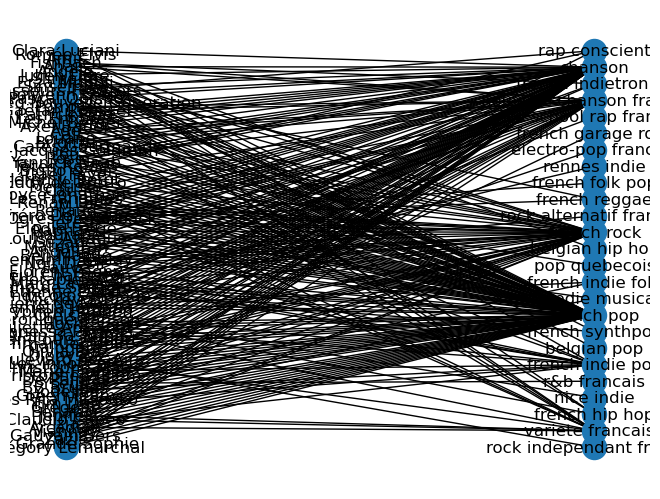

In [107]:
nx.draw(G, pos, with_labels=True)
plt.show()

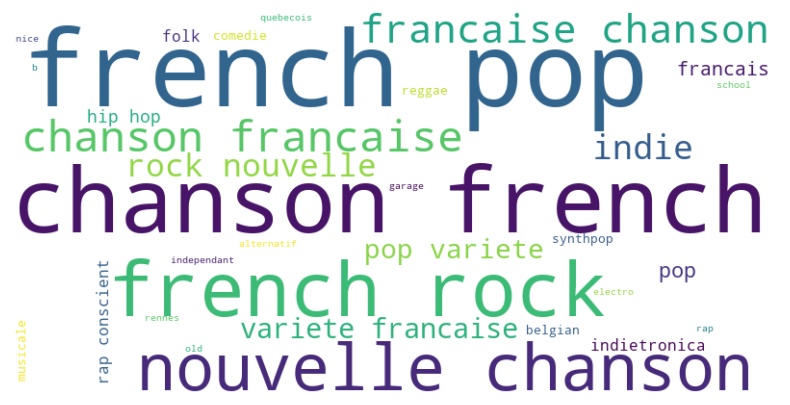

In [108]:
text = ' '.join(genres_WC)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [110]:
# Popularity of genres
left_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
right_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 1}

In [111]:
print("Nombre de genres: ",len(right_nodes))

Nombre de genres:  25


In [112]:
right_degrees = G.degree(right_nodes)

print("Degré des nœuds de la partition droite :", right_degrees)

Degré des nœuds de la partition droite : [('rock independant francais', 1), ('variete francaise', 12), ('french hip hop', 3), ('nice indie', 1), ('r&b francais', 1), ('french indie pop', 13), ('belgian pop', 1), ('french synthpop', 2), ('french pop', 79), ('comedie musicale', 2), ('french indie folk', 2), ('pop quebecois', 1), ('belgian hip hop', 1), ('french rock', 40), ('rock alternatif francais', 1), ('french reggae', 2), ('french folk pop', 1), ('rennes indie', 1), ('electro-pop francais', 1), ('french garage rock', 1), ('old school rap francais', 1), ('nouvelle chanson francaise', 29), ('french indietronica', 3), ('chanson', 64), ('rap conscient', 3)]


In [113]:
# Display first top 10 of genres with the degrees and the centrality 
genre_nodes = [node for node in G.nodes if G.nodes[node]['bipartite'] == 1]
degree_centralities = nx.degree_centrality(G)
genre_degree_centralities = {node: degree_centralities[node] for node in genre_nodes}
sorted_genre_centralities = sorted(genre_degree_centralities.items(), key=lambda x: x[1], reverse=True)

print("Les 10 genres avec les plus gros degrés et leurs centralités :")
for node, centrality in sorted_genre_centralities[:10]:
    degree = G.degree[node]
    print(f"Genre : {node}, Degré : {degree}, Centralité de degré : {centrality}")

Les 10 genres avec les plus gros degrés et leurs centralités :
Genre : french pop, Degré : 79, Centralité de degré : 0.6370967741935484
Genre : chanson, Degré : 64, Centralité de degré : 0.5161290322580645
Genre : french rock, Degré : 40, Centralité de degré : 0.3225806451612903
Genre : nouvelle chanson francaise, Degré : 29, Centralité de degré : 0.23387096774193547
Genre : french indie pop, Degré : 13, Centralité de degré : 0.10483870967741934
Genre : variete francaise, Degré : 12, Centralité de degré : 0.0967741935483871
Genre : french hip hop, Degré : 3, Centralité de degré : 0.024193548387096774
Genre : french indietronica, Degré : 3, Centralité de degré : 0.024193548387096774
Genre : rap conscient, Degré : 3, Centralité de degré : 0.024193548387096774
Genre : french synthpop, Degré : 2, Centralité de degré : 0.016129032258064516


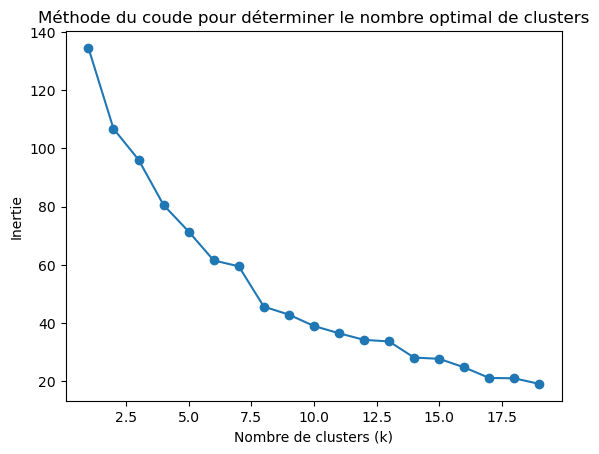

In [114]:
# Cluster of genres
# We will identify clusters or groups of genres that are often associated with each other in the graph. 
# To do this, we will use a data clustering technique such as the K-means algorithm to group similar genres into distinct clusters.
genres = [node for node in G.nodes if G.nodes[node]['bipartite'] == 1]
adjacency_matrix = nx.bipartite.biadjacency_matrix(G, row_order=artistes, column_order=genres)
adjacency_matrix_np = adjacency_matrix.toarray()
k_values = range(1, 20)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(adjacency_matrix_np)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

In [175]:
# Clusters identification
kmeans = KMeans(n_clusters=10)
cluster_assignments = kmeans.fit_predict(adjacency_matrix_np)

genre_clusters = {}
for i, genre in enumerate(genres):
    cluster_id = cluster_assignments[i]
    if cluster_id not in genre_clusters:
        genre_clusters[cluster_id] = []
    genre_clusters[cluster_id].append(genre)

print("Nombre de genres dans chaque cluster :")
for cluster_id, genres_in_cluster in genre_clusters.items():
    genre_count = len(genres_in_cluster)
    genres_str = ', '.join(genres_in_cluster)
    print(f"Cluster {cluster_id}: {genre_count} genres - {genres_str}")


Nombre de genres dans chaque cluster :
Cluster 1: 8 genres - rock independant francais, nice indie, r&b francais, french synthpop, french pop, french indie folk, electro-pop francais, old school rap francais
Cluster 4: 4 genres - variete francaise, rock alternatif francais, nouvelle chanson francaise, rap conscient
Cluster 5: 5 genres - french hip hop, comedie musicale, french reggae, rennes indie, french indietronica
Cluster 7: 1 genres - french indie pop
Cluster 6: 3 genres - belgian pop, pop quebecois, french garage rock
Cluster 2: 2 genres - belgian hip hop, chanson
Cluster 3: 1 genres - french rock
Cluster 8: 1 genres - french folk pop


# V - Statistical characterization of the Network 

## A - Statistical properties of the degree

### A1 - Degree Distribution (Directed Graph)

In [116]:
in_degrees = [superstar_network_restricted.in_degree(node) for node in superstar_network_restricted.nodes()]
out_degrees = [superstar_network_restricted.out_degree(node) for node in superstar_network_restricted.nodes()]
total_degrees = [superstar_network_restricted.degree(node) for node in superstar_network_restricted.nodes()]

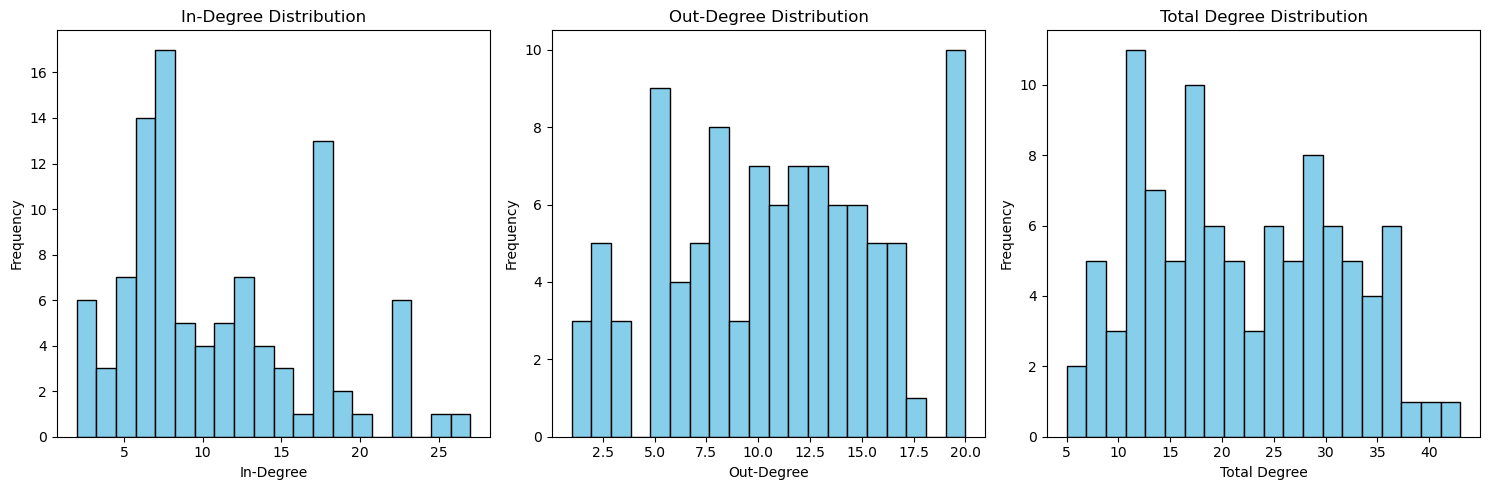

In [117]:
# Plot histograms for in-degree, out-degree, and total degree distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(in_degrees, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.title('In-Degree Distribution')

plt.subplot(1, 3, 2)
plt.hist(out_degrees, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.title('Out-Degree Distribution')

plt.subplot(1, 3, 3)
plt.hist(total_degrees, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Degree')
plt.ylabel('Frequency')
plt.title('Total Degree Distribution')

plt.tight_layout()
plt.show()

* The histograms shows the distribution of node degrees in the network.
* The histograms of in-degree, out-degree, and total degree distributions show a skew towards a lower number of degrees for most nodes. This suggests that most artists are recommended by only a few others, with a few nodes (likely popular artists) having high in-degree and out-degree values, indicative of a heterogeneous (scale-free) network.

In [118]:
# Applying log-binning to degree distribution
def logBinning(degreeList, nbin):
    kmin = min(degreeList)
    kmax = max(degreeList)
    logBins = np.logspace(np.log10(kmin), np.log10(kmax), num=nbin)
    logBinDensity, binedges = np.histogram(degreeList, bins=logBins, density=True)
    logBins = np.delete(logBins, -1)
    return logBinDensity, logBins

In [119]:
pk_in, k_in = logBinning(in_degrees, 1000)
pk_out, k_out = logBinning(out_degrees, 1000)
pk_total, k_total = logBinning(total_degrees, 1000)

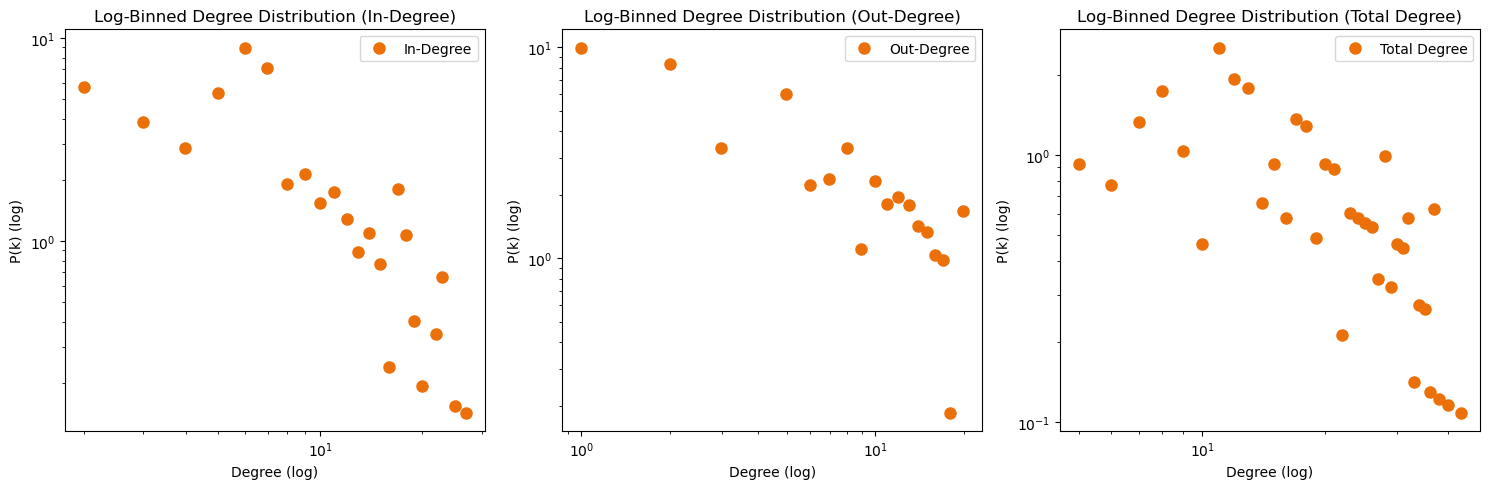

In [120]:
# Plot log-binned for in-degree, out-degree, and total degree distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.loglog(k_in, pk_in, 'o', color='#EB7009', markersize=8, label='In-Degree')
plt.xlabel('Degree (log)')
plt.ylabel('P(k) (log)')
plt.title('Log-Binned Degree Distribution (In-Degree)')
plt.legend()

plt.subplot(1, 3, 2)
plt.loglog(k_out, pk_out, 'o', color='#EB7009', markersize=8, label='Out-Degree')
plt.xlabel('Degree (log)')
plt.ylabel('P(k) (log)')
plt.title('Log-Binned Degree Distribution (Out-Degree)')
plt.legend()

plt.subplot(1, 3, 3)
plt.loglog(k_total, pk_total, 'o', color='#EB7009', markersize=8, label='Total Degree')
plt.xlabel('Degree (log)')
plt.ylabel('P(k) (log)')
plt.title('Log-Binned Degree Distribution (Total Degree)')
plt.legend()

plt.tight_layout()
plt.show()

* The log-binned degree distribution graphs provide insights into the connectivity patterns of the network and reveal the structure of the network on a multiplicative scale.
* A straight-line trend (power-law (pareto) distribution) in these plots is characteristic of scale-free networks, where few nodes (artists) act as hubs with a high number of connections.

### A2 - Degree Distribution (Undirected Graph)

In [121]:
superstar_network_undirected = nx.read_edgelist('Clara_Luciani_Network_names.txt', create_using=nx.Graph(), delimiter=', ', data=False)
superstar_network_restricted_undirected = nx.Graph()

for node in superstar_network.nodes():
    if superstar_network.out_degree(node) > 0:
        superstar_network_restricted_undirected.add_node(node)
        for succ in superstar_network.successors(node):
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted_undirected.add_edge(node, succ)

print(superstar_network_restricted_undirected.number_of_edges())

761


In [122]:
print(superstar_network_restricted_undirected)

Graph with 100 nodes and 761 edges


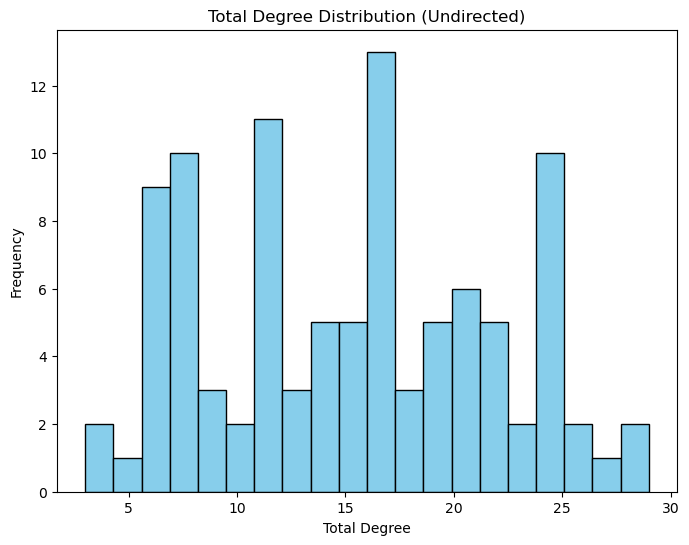

In [123]:
# Plot histograms for total degree distributions for the undirected graph
total_degrees_undirected = [superstar_network_restricted_undirected.degree(node) for node in superstar_network_restricted_undirected.nodes()]

plt.figure(figsize=(8, 6))
plt.hist(total_degrees_undirected, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Degree')
plt.ylabel('Frequency')
plt.title('Total Degree Distribution (Undirected)')
plt.show()

* The degree distribution of the undirected graph provides a view of the network's structure without the directionality of recommendations.
* This histogram helps in understanding the general connectivity of the nodes, which may point to the average number of other artists an artist is associated with in the network. The graph show how interconnected the network is, potentially indicating a 'small-world' nature where most nodes can be reached from every other by a small number of steps.

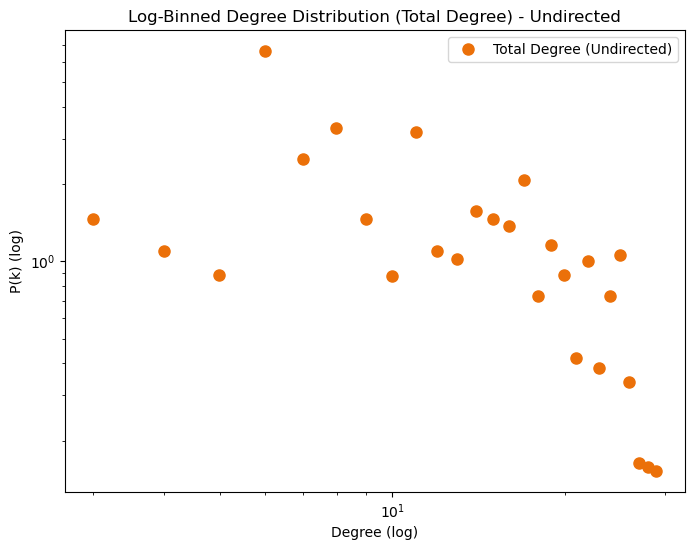

In [124]:
# Applying log-binning to degree distribution for undirected graph
pk, k = logBinning(total_degrees_undirected, 1000)

plt.figure(figsize=(8, 6))
plt.loglog(k, pk, 'o', color='#EB7009', markersize=8, label='Total Degree (Undirected)')
plt.xlabel('Degree (log)')
plt.ylabel('P(k) (log)')
plt.title('Log-Binned Degree Distribution (Total Degree) - Undirected')
plt.legend()
plt.show()

* Similar to the directed case, this plot is useful for identifying the scaling properties of the network. It could indicate a hierarchy where a small number of artists are highly connected. As it suggest the presence of influential nodes with many connections, which can have significant implications for network dynamics and information flow.

### A3 - Degree assortativity/correlation (Directed Graph)

In [125]:
TS_Nodes_Attributes = pd.read_csv('Clara_Luciani_Attr_Network.csv')

In [126]:
superstar_network = nx.read_edgelist('Clara_Luciani_Network_names.txt', comments="Node", create_using=nx.DiGraph(), delimiter=',', data=False)

In [127]:
superstar_network_restricted = nx.DiGraph()
for node in superstar_network.nodes():
    if superstar_network.out_degree(node) > 0:
        superstar_network_restricted.add_node(node)
        for succ in superstar_network.successors(node):
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted.add_edge(node, succ)

In [128]:
# Add nodes with attributes
for _, row in TS_Nodes_Attributes.iterrows():
    artist_name = row['Artist_Name']
    attributes = row.drop('Artist_Name').to_dict()
    superstar_network_restricted.add_node(artist_name, **attributes)

# View results
print(superstar_network_restricted.nodes(data=True))

[('Clara Luciani', {'NB_Followers': 798028, 'Genres': "['chanson', 'french pop']", 'Popularity': 57, 'Nationality': 'France', 'Age': 32.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2022, 'Type_Last_Release': 'album', 'Acousticness': 0.1592, 'Danceability': 0.6616666666666667, 'Duration_MS': 195706.3333333333, 'Energy': 0.7593333333333333, 'Instrumentalness': 0.0002395766666666, 'Liveness': 0.161, 'Loudness': -6.297999999999999, 'Speechiness': 0.0472333333333333, 'Tempo': 113.662, 'Valence': 0.7926666666666667}), ('Juliette Armanet', {'NB_Followers': 331392, 'Genres': "['chanson', 'electro-pop francais', 'french indie pop', 'french pop', 'nouvelle chanson francaise']", 'Popularity': 56, 'Nationality': 'France', 'Age': 40.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2023, 'Type_Last_Release': 'album', 'Acousticness': 0.35533333333

In [129]:
# Calculate degree assortativity
degree_assortativity = nx.degree_assortativity_coefficient(superstar_network_restricted)
print("Degree Assortativity Coefficient:", degree_assortativity)

Degree Assortativity Coefficient: 0.06725705437166377


* The assortativity coefficient value indicates a weak level of the likelihood of nodes to attach to others with similar degree. A positive value implies a preference for connecting to similar nodes.

In [130]:
# Calculate assortativity based on specific attributes
categorical_attributes = ['Genres', 'Nationality', 'Type', 'Gender', 'Age']
numerical_attributes = ['NB_Followers', 'Popularity', 'Total_Release', 'Available_Markets', 'Year_Last_Release', 
                        'Acousticness', 'Danceability', 'Duration_MS', 'Energy', 'Instrumentalness', 
                        'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']

for cat_attr in categorical_attributes:
    assortativity = nx.attribute_assortativity_coefficient(superstar_network_restricted, cat_attr)
    print(f"Assortativity based on {cat_attr}: {assortativity}")

for num_attr in numerical_attributes:
    assortativity = nx.numeric_assortativity_coefficient(superstar_network_restricted, num_attr)
    print(f"Assortativity based on {num_attr}: {assortativity}")

Assortativity based on Genres: 0.15114120003338063
Assortativity based on Nationality: 0.01597154332693411
Assortativity based on Type: 0.18066247430849067
Assortativity based on Gender: 0.18799240334116682
Assortativity based on Age: -0.007784761717043183
Assortativity based on NB_Followers: 0.468071755194949
Assortativity based on Popularity: 0.4489324139984172
Assortativity based on Total_Release: 0.25073816267277577
Assortativity based on Available_Markets: -0.04888728391547841
Assortativity based on Year_Last_Release: 0.017339657703602664
Assortativity based on Acousticness: 0.07534772048318268
Assortativity based on Danceability: 0.005355912458723428
Assortativity based on Duration_MS: 0.09691096959368307
Assortativity based on Energy: 0.14037594477488236
Assortativity based on Instrumentalness: 0.006535178355115056
Assortativity based on Liveness: -0.013639361391425204
Assortativity based on Loudness: 0.10707025246578399
Assortativity based on Speechiness: 0.21911292226374135
As

* The assortativity based on categorical and numerical attributes provides insights into the homophily of the network. For instance, assortativity based on genres or nationality can suggest a tendency of artists to be recommended with those of similar genres or from the same countries.

In [131]:
# Degree mixing : Calculate the average degree of neighbors for each node
kDict = dict(superstar_network_restricted.degree())
knn = {}
for n in superstar_network_restricted.nodes():
    #neighbors = list(superstar_network_restricted.neighbors(n))
    neighbor_degrees = [kDict[v] for v in superstar_network_restricted.neighbors(n)]
    knn[n] = np.mean(neighbor_degrees)

/opt/mamba/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/mamba/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


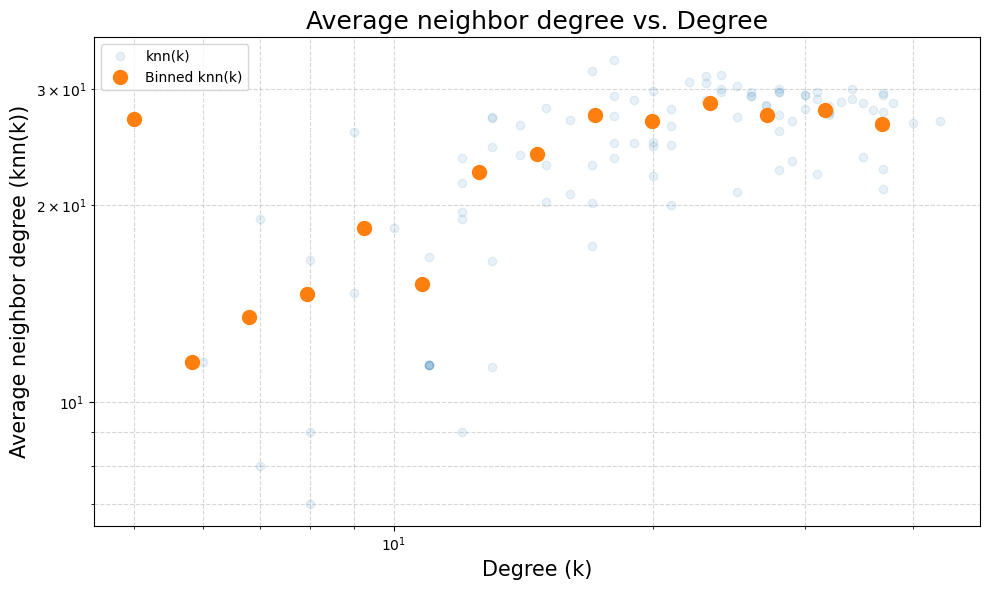

In [132]:
# Plot the average degree of neighbors for each node
xx = list(kDict.values())
yy = [knn[n] for n in kDict.keys()]
xx_filtered = [x for x, y in zip(xx, yy) if not np.isnan(y)]
yy_filtered = [y for y in yy if not np.isnan(y)]

plt.figure(figsize=(10, 6))
plt.loglog(xx_filtered, yy_filtered, 'o', alpha=0.1, label='knn(k)')

logBins = np.logspace(np.log2(np.nanmin(xx_filtered)), np.log2(np.nanmax(xx_filtered)), base=2, num=15)
ybin, xbin, _ = scipy.stats.binned_statistic(xx_filtered, yy_filtered, statistic='mean', bins=logBins)
plt.loglog(xbin[:-1], ybin, 'o', markersize=10, label='Binned knn(k)')

plt.xlabel('Degree (k)', size=15)
plt.ylabel('Average neighbor degree (knn(k))', size=15)
plt.title('Average neighbor degree vs. Degree', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* These scatter plots show the relationship between the degree of a node and the average degree of its neighbors. An upward trend would indicate assortative mixing, meaning high-degree nodes tend to connect with other high-degree nodes.

### A4 - Degree assortativity/correlation (Undirected Graph)

In [133]:
superstar_network_undirected = nx.read_edgelist('Clara_Luciani_Network_names.txt', create_using=nx.Graph(), delimiter=', ', data=False)
superstar_network_restricted_undirected = nx.Graph()

for node in superstar_network.nodes():
    if superstar_network.out_degree(node) > 0:
        superstar_network_restricted_undirected.add_node(node)
        for succ in superstar_network.successors(node):
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted_undirected.add_edge(node, succ)

print(superstar_network_restricted_undirected.number_of_edges())

761


In [134]:
# Add nodes with attributes
for _, row in TS_Nodes_Attributes.iterrows():
    artist_name = row['Artist_Name']
    attributes = row.drop('Artist_Name').to_dict()
    superstar_network_restricted_undirected.add_node(artist_name, **attributes)

# View results
print(superstar_network_restricted_undirected.nodes(data=True))

[('Clara Luciani', {'NB_Followers': 798028, 'Genres': "['chanson', 'french pop']", 'Popularity': 57, 'Nationality': 'France', 'Age': 32.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2022, 'Type_Last_Release': 'album', 'Acousticness': 0.1592, 'Danceability': 0.6616666666666667, 'Duration_MS': 195706.3333333333, 'Energy': 0.7593333333333333, 'Instrumentalness': 0.0002395766666666, 'Liveness': 0.161, 'Loudness': -6.297999999999999, 'Speechiness': 0.0472333333333333, 'Tempo': 113.662, 'Valence': 0.7926666666666667}), ('Juliette Armanet', {'NB_Followers': 331392, 'Genres': "['chanson', 'electro-pop francais', 'french indie pop', 'french pop', 'nouvelle chanson francaise']", 'Popularity': 56, 'Nationality': 'France', 'Age': 40.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2023, 'Type_Last_Release': 'album', 'Acousticness': 0.35533333333

In [135]:
# Calculate degree assortativity
degree_assortativity = nx.degree_assortativity_coefficient(superstar_network_restricted_undirected)
print("Degree Assortativity Coefficient:", degree_assortativity)

Degree Assortativity Coefficient: 0.2209706556931873


* The assortativity coefficient value indicates a moderate level of the likelihood of nodes to attach to others with similar degree. A positive value implies a preference for connecting to similar nodes.

In [136]:
# Calculate assortativity based on specific attributes
categorical_attributes = ['Genres', 'Nationality', 'Type', 'Gender', 'Age']
numerical_attributes = ['NB_Followers', 'Popularity', 'Total_Release', 'Available_Markets', 'Year_Last_Release', 
                        'Acousticness', 'Danceability', 'Duration_MS', 'Energy', 'Instrumentalness', 
                        'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']

for cat_attr in categorical_attributes:
    assortativity = nx.attribute_assortativity_coefficient(superstar_network_restricted_undirected, cat_attr)
    print(f"Assortativity based on {cat_attr}: {assortativity}")

for num_attr in numerical_attributes:
    assortativity = nx.numeric_assortativity_coefficient(superstar_network_restricted_undirected, num_attr)
    print(f"Assortativity based on {num_attr}: {assortativity}")

Assortativity based on Genres: 0.13913058647712492
Assortativity based on Nationality: 0.004523424878838124
Assortativity based on Type: 0.1890153577069634
Assortativity based on Gender: 0.18376062085052444
Assortativity based on Age: -0.011428159946232976
Assortativity based on NB_Followers: 0.40455615329040107
Assortativity based on Popularity: 0.3726687173993767
Assortativity based on Total_Release: 0.20399062498899112
Assortativity based on Available_Markets: -0.04400983231765316
Assortativity based on Year_Last_Release: -0.0019056465380672587
Assortativity based on Acousticness: 0.047829984542065836
Assortativity based on Danceability: 0.0003331181575489604
Assortativity based on Duration_MS: 0.058373338244892915
Assortativity based on Energy: 0.12821112066889034
Assortativity based on Instrumentalness: -0.004631348942313208
Assortativity based on Liveness: -0.017303812635192168
Assortativity based on Loudness: 0.08685380732809123
Assortativity based on Speechiness: 0.199299189882

* The assortativity based on categorical and numerical attributes provides insights into the homophily of the network. For instance, assortativity based on genres or nationality can suggest a tendency of artists to be recommended with those of similar genres or from the same countries.

In [137]:
# Degree mixing : Calculate the average degree of neighbors for each node
kDict = dict(superstar_network_restricted_undirected.degree())
knn = {}
for n in superstar_network_restricted_undirected.nodes():
    #neighbors = list(superstar_network_restricted.neighbors(n))
    neighbor_degrees = [kDict[v] for v in superstar_network_restricted_undirected.neighbors(n)]
    knn[n] = np.mean(neighbor_degrees)

/opt/mamba/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/mamba/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


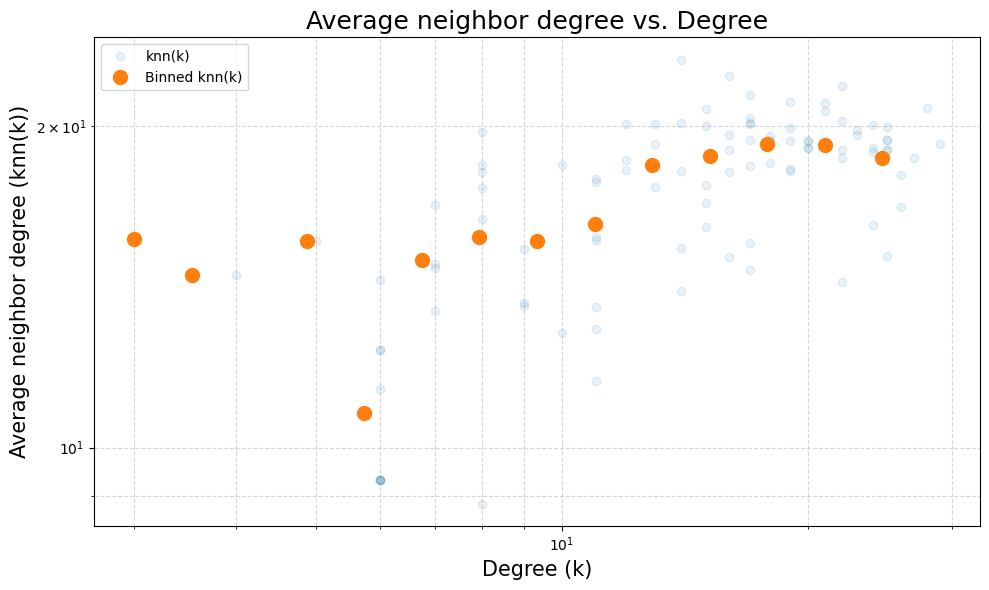

In [138]:
# Plot the average degree of neighbors for each node
xx = list(kDict.values())
yy = [knn[n] for n in kDict.keys()]
xx_filtered = [x for x, y in zip(xx, yy) if not np.isnan(y)]
yy_filtered = [y for y in yy if not np.isnan(y)]

plt.figure(figsize=(10, 6))
plt.loglog(xx_filtered, yy_filtered, 'o', alpha=0.1, label='knn(k)')

logBins = np.logspace(np.log2(np.nanmin(xx_filtered)), np.log2(np.nanmax(xx_filtered)), base=2, num=15)
ybin, xbin, _ = scipy.stats.binned_statistic(xx_filtered, yy_filtered, statistic='mean', bins=logBins)
plt.loglog(xbin[:-1], ybin, 'o', markersize=10, label='Binned knn(k)')

plt.xlabel('Degree (k)', size=15)
plt.ylabel('Average neighbor degree (knn(k))', size=15)
plt.title('Average neighbor degree vs. Degree', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* These scatter plots show the relationship between the degree of a node and the average degree of its neighbors. An upward trend would indicate assortative mixing, meaning high-degree nodes tend to connect with other high-degree nodes.

### A5 - Weighted networks (Directed Graph)

In [139]:
# Assign weights based on the Popularity attribute
for u, v in superstar_network_restricted.edges():
    popularity_u = superstar_network_restricted.nodes[u]['Popularity']
    popularity_v = superstar_network_restricted.nodes[v]['Popularity']
    weight = max(popularity_u, popularity_v)
    superstar_network_restricted[u][v]['weight'] = weight
    
# View results
print(superstar_network_restricted.edges(data=True))

[('Clara Luciani', 'Juliette Armanet', {'weight': 57}), ('Clara Luciani', 'Julien Doré', {'weight': 60}), ('Clara Luciani', 'Hoshi', {'weight': 63}), ('Clara Luciani', 'Zazie', {'weight': 57}), ('Clara Luciani', 'Camélia Jordana', {'weight': 57}), ('Clara Luciani', 'Eddy de Pretto', {'weight': 57}), ('Clara Luciani', 'Les Frangines', {'weight': 57}), ('Clara Luciani', '-M-', {'weight': 57}), ('Clara Luciani', 'Grand Corps Malade', {'weight': 60}), ('Clara Luciani', 'Calogero', {'weight': 59}), ('Clara Luciani', 'Marc Lavoine', {'weight': 57}), ('Clara Luciani', 'Angèle', {'weight': 66}), ('Clara Luciani', 'Christophe Willem', {'weight': 57}), ('Clara Luciani', 'Vianney', {'weight': 65}), ('Clara Luciani', 'Jenifer', {'weight': 57}), ('Clara Luciani', 'Gaëtan Roussel', {'weight': 57}), ('Clara Luciani', 'Suzane', {'weight': 57}), ('Clara Luciani', 'Benjamin Biolay', {'weight': 57}), ('Clara Luciani', 'Michel Berger', {'weight': 57}), ('Clara Luciani', 'Therapie TAXI', {'weight': 60}), (

In [140]:
# Calculate node strength
in_strength = dict(superstar_network_restricted.in_degree(weight='weight'))
out_strength = dict(superstar_network_restricted.out_degree(weight='weight'))

# View results
print("In-Strength:", in_strength)

In-Strength: {'Clara Luciani': 655, 'Juliette Armanet': 979, 'Julien Doré': 366, 'Hoshi': 1076, 'Zazie': 1027, 'Camélia Jordana': 495, 'Eddy de Pretto': 1006, 'Les Frangines': 818, '-M-': 632, 'Grand Corps Malade': 369, 'Calogero': 417, 'Marc Lavoine': 941, 'Angèle': 264, 'Christophe Willem': 1202, 'Vianney': 1106, 'Jenifer': 1212, 'Gaëtan Roussel': 1071, 'Suzane': 782, 'Benjamin Biolay': 378, 'Michel Berger': 391, 'Therapie TAXI': 735, 'Izïa': 516, 'Brigitte': 360, 'Fishbach': 148, 'Feu! Chatterton': 533, 'Ben Mazué': 693, 'Zaho de Sagazan': 434, 'Véronique Sanson': 218, 'Marie-Flore': 265, 'Adé': 398, 'Étienne Daho': 307, 'Jean-Louis Aubert': 1209, 'Raphaël': 948, 'Pascal Obispo': 959, 'BB Brunes': 277, 'Bénabar': 920, 'Florent Pagny': 629, 'Olivia Ruiz': 1197, 'Christophe Maé': 537, 'Claudio Capéo': 1006, 'Trois Cafés Gourmands': 801, 'Pierre de Maere': 295, 'Boulevard des Airs': 601, 'Mentissa': 360, 'Louane': 321, 'Arcadian': 712, 'Slimane': 515, 'Jérémy Frerot': 665, 'Fréro Delav

In [141]:
# View results
print("Out-Strength:", out_strength)

Out-Strength: {'Clara Luciani': 1174, 'Juliette Armanet': 1140, 'Julien Doré': 1205, 'Hoshi': 1263, 'Zazie': 1091, 'Camélia Jordana': 1038, 'Eddy de Pretto': 1171, 'Les Frangines': 1008, '-M-': 1141, 'Grand Corps Malade': 1209, 'Calogero': 1003, 'Marc Lavoine': 575, 'Angèle': 990, 'Christophe Willem': 637, 'Vianney': 1170, 'Jenifer': 408, 'Gaëtan Roussel': 718, 'Suzane': 807, 'Benjamin Biolay': 306, 'Michel Berger': 260, 'Therapie TAXI': 794, 'Izïa': 505, 'Brigitte': 639, 'Fishbach': 104, 'Feu! Chatterton': 359, 'Ben Mazué': 918, 'Zaho de Sagazan': 620, 'Véronique Sanson': 104, 'Marie-Flore': 101, 'Adé': 622, 'Étienne Daho': 289, 'Jean-Louis Aubert': 386, 'Raphaël': 935, 'Pascal Obispo': 729, 'BB Brunes': 718, 'Bénabar': 643, 'Florent Pagny': 664, 'Olivia Ruiz': 859, 'Christophe Maé': 863, 'Claudio Capéo': 984, 'Trois Cafés Gourmands': 883, 'Pierre de Maere': 464, 'Boulevard des Airs': 895, 'Mentissa': 540, 'Louane': 822, 'Arcadian': 614, 'Slimane': 641, 'Jérémy Frerot': 814, 'Fréro De

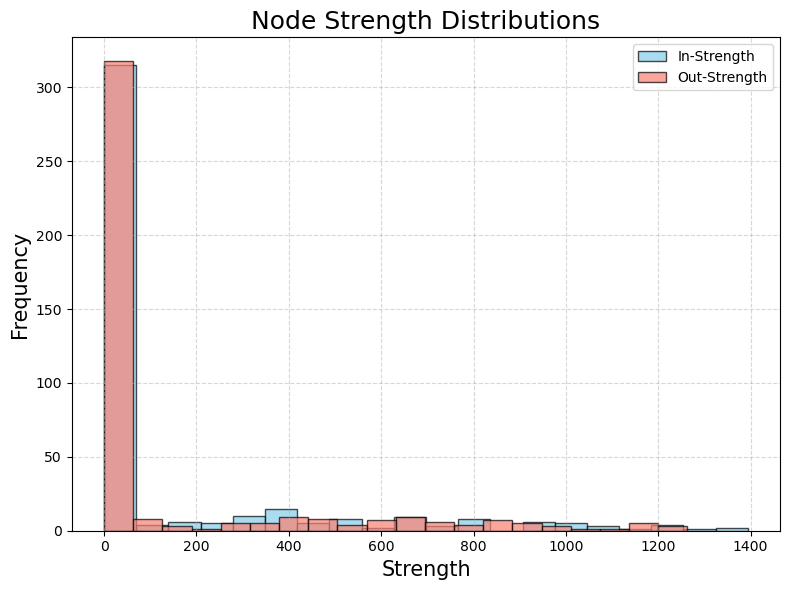

In [50]:
# Strength Distributions
in_strength_values = list(in_strength.values())
out_strength_values = list(out_strength.values())

plt.figure(figsize=(8, 6))
plt.hist(in_strength_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='In-Strength')
plt.hist(out_strength_values, bins=20, color='salmon', edgecolor='black', alpha=0.7, label='Out-Strength')
plt.xlabel('Strength', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Node Strength Distributions', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* These histograms show the distribution of node strengths in the network. Since the strength is weighted by artist popularity, this plot highlights how influence (through recommendations) is distributed among artists.By weighting connections based on artist popularity, node strength distributions provide a measure of influence within the network. High-strength nodes could signify influential artists within the recommendation network.
* By comparing the distributions of in-strength and out-strength, we notice that we have similar frequencies indicate that there are comparable numbers of nodes with similar strengths in both the in-strength and out-strength distributions. The similar frequencies indicate that the network experiences interactions or influence in both directions, without a significant bias towards incoming or outgoing edges. The differences in strength levels suggest that there's a significant flow of influence or interactions coming into those nodes from other nodes in the network.

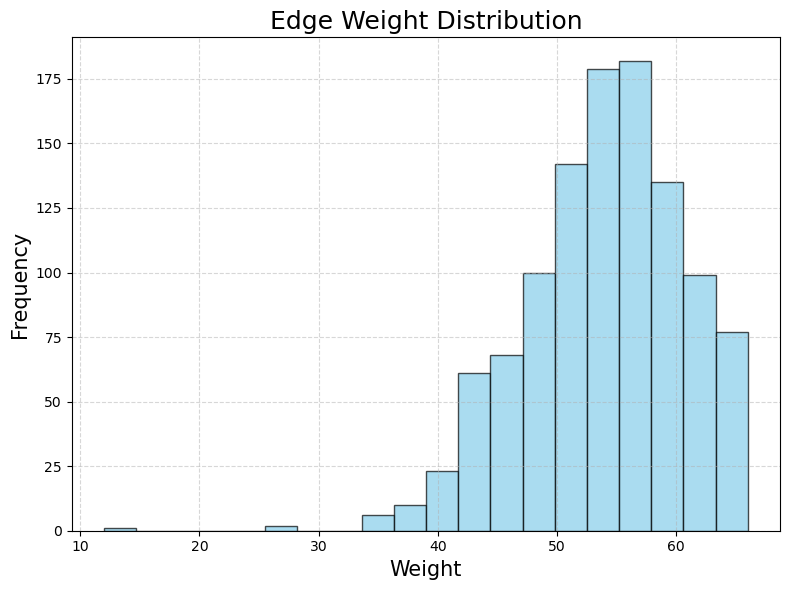

In [142]:
# Weight Distributions
edge_weights = [data['weight'] for _, _, data in superstar_network_restricted.edges(data=True)]

plt.figure(figsize=(8, 6))
plt.hist(edge_weights, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Weight', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Edge Weight Distribution', size=18)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* The distribution of edge weights reveals how the recommendation strengths are spread across the network. We notice a peak at a particular weight range (close to 55), it indicates that a significant number of edges have weights within that ranges which suggests that recommendations are mostly among equally popular artists.

In [143]:
# Correlation Between node degree and edge weights (by using Pearson correlation coefficient)
node_weights = {}
for node in superstar_network_restricted.nodes():
    node_weight = sum(data['weight'] for _, _, data in superstar_network_restricted.edges(node, data=True)) # Calculate the sum of edge weights connected to each node
    node_weights[node] = node_weight
node_weight_values = np.array(list(node_weights.values()))
degree_values = np.array([superstar_network_restricted.degree(node) for node in superstar_network_restricted.nodes()])

correlation_coefficient, p_value = pearsonr(degree_values, node_weight_values)

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)


Pearson correlation coefficient: 0.9321156227151357
p-value: 5.960180736523494e-183


* The Pearson correlation coefficient between node degree and edge weights is 0.932, with a very low p-value (close to zero). This indicates a strong positive correlation between the two variables.
* In simpler terms, as the degree of a node (its number of connections) increases, the total weight of its edges also tends to increase significantly. This suggests that nodes with higher degrees tend to have stronger and more influential connections within the network.

In [144]:
# Weight assignment based on the order of recommendation
def assign_weight_based_on_recommendation_order(G):
    sorted_edges = sorted(G.edges(), key=lambda x: x[1])  
    weight_value = 1.0 
    for u, v in sorted_edges:
        G[u][v]['weight'] = weight_value
        weight_value += 0.1  
assign_weight_based_on_recommendation_order(superstar_network_restricted)

# View results
print(superstar_network_restricted.edges(data=True))

[('Clara Luciani', 'Juliette Armanet', {'weight': 56.20000000000053}), ('Clara Luciani', 'Julien Doré', {'weight': 55.60000000000052}), ('Clara Luciani', 'Hoshi', {'weight': 46.700000000000394}), ('Clara Luciani', 'Zazie', {'weight': 106.39999999999823}), ('Clara Luciani', 'Camélia Jordana', {'weight': 18.599999999999998}), ('Clara Luciani', 'Eddy de Pretto', {'weight': 29.600000000000154}), ('Clara Luciani', 'Les Frangines', {'weight': 63.80000000000064}), ('Clara Luciani', '-M-', {'weight': 1.0}), ('Clara Luciani', 'Grand Corps Malade', {'weight': 41.50000000000032}), ('Clara Luciani', 'Calogero', {'weight': 17.899999999999988}), ('Clara Luciani', 'Marc Lavoine', {'weight': 70.80000000000025}), ('Clara Luciani', 'Angèle', {'weight': 6.399999999999994}), ('Clara Luciani', 'Christophe Willem', {'weight': 21.700000000000042}), ('Clara Luciani', 'Vianney', {'weight': 100.89999999999854}), ('Clara Luciani', 'Jenifer', {'weight': 52.400000000000475}), ('Clara Luciani', 'Gaëtan Roussel', {'

In [145]:
# Calculate node strength
in_strength = dict(superstar_network_restricted.in_degree(weight='weight'))
out_strength = dict(superstar_network_restricted.out_degree(weight='weight'))

# View results
print("In-Strength:", in_strength)

In-Strength: {'Clara Luciani': 269.5000000000009, 'Juliette Armanet': 969.0000000000091, 'Julien Doré': 335.10000000000315, 'Hoshi': 807.5000000000068, 'Zazie': 1930.4999999999673, 'Camélia Jordana': 171.00000000000003, 'Eddy de Pretto': 516.8000000000028, 'Les Frangines': 967.5000000000092, '-M-': 16.500000000000004, 'Grand Corps Malade': 250.50000000000193, 'Calogero': 127.39999999999995, 'Marc Lavoine': 1217.2000000000035, 'Angèle': 26.199999999999974, 'Christophe Willem': 524.4000000000012, 'Vianney': 1728.8999999999744, 'Jenifer': 1175.9000000000108, 'Gaëtan Roussel': 769.5000000000059, 'Suzane': 1330.6999999999844, 'Benjamin Biolay': 81.89999999999982, 'Michel Berger': 527.8, 'Therapie TAXI': 1156.1999999999855, 'Izïa': 493.5000000000043, 'Brigitte': 96.59999999999978, 'Fishbach': 107.70000000000071, 'Feu! Chatterton': 352.50000000000233, 'Ben Mazué': 128.99999999999977, 'Zaho de Sagazan': 741.9999999999877, 'Véronique Sanson': 410.99999999999375, 'Marie-Flore': 363.5000000000007

In [146]:
# View results
print("Out-Strength:", out_strength)

Out-Strength: {'Clara Luciani': 1005.799999999998, 'Juliette Armanet': 963.1999999999942, 'Julien Doré': 890.1999999999977, 'Hoshi': 1210.6999999999946, 'Zazie': 1126.0999999999976, 'Camélia Jordana': 1258.4999999999939, 'Eddy de Pretto': 1063.2999999999956, 'Les Frangines': 905.6000000000013, '-M-': 1226.599999999996, 'Grand Corps Malade': 1031.0999999999976, 'Calogero': 968.1999999999977, 'Marc Lavoine': 728.0999999999975, 'Angèle': 941.0999999999972, 'Christophe Willem': 861.799999999998, 'Vianney': 962.2999999999989, 'Jenifer': 485.9999999999992, 'Gaëtan Roussel': 802.4999999999991, 'Suzane': 784.2999999999977, 'Benjamin Biolay': 315.2999999999983, 'Michel Berger': 381.29999999999876, 'Therapie TAXI': 502.59999999999883, 'Izïa': 461.60000000000065, 'Brigitte': 574.6999999999987, 'Fishbach': 92.00000000000077, 'Feu! Chatterton': 382.49999999999847, 'Ben Mazué': 993.7999999999929, 'Zaho de Sagazan': 544.9999999999986, 'Véronique Sanson': 149.50000000000006, 'Marie-Flore': 52.00000000

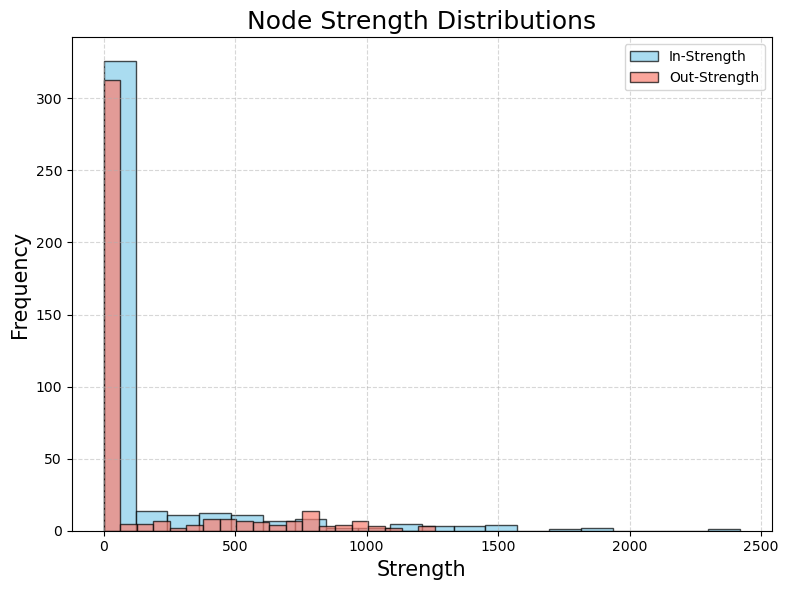

In [147]:
# Strength Distributions
in_strength_values = list(in_strength.values())
out_strength_values = list(out_strength.values())

plt.figure(figsize=(8, 6))
plt.hist(in_strength_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='In-Strength')
plt.hist(out_strength_values, bins=20, color='salmon', edgecolor='black', alpha=0.7, label='Out-Strength')
plt.xlabel('Strength', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Node Strength Distributions', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* These histograms show the distribution of node strengths in the network. Since the strength is weighted by artist popularity, this plot highlights how influence (through recommendations) is distributed among artists.By weighting connections based on artist's order, node strength distributions provide a measure of influence within the network. High-strength nodes could signify influential artists within the recommendation network.
* By comparing the distributions of in-strength and out-strength, we notice that we have similar frequencies indicate that there are comparable numbers of nodes with similar strengths in both the in-strength and out-strength distributions. The similar frequencies indicate that the network experiences interactions or influence in both directions, without a significant bias towards incoming or outgoing edges. The differences in strength levels suggest that there's a significant flow of influence or interactions coming into those nodes from other nodes in the network.

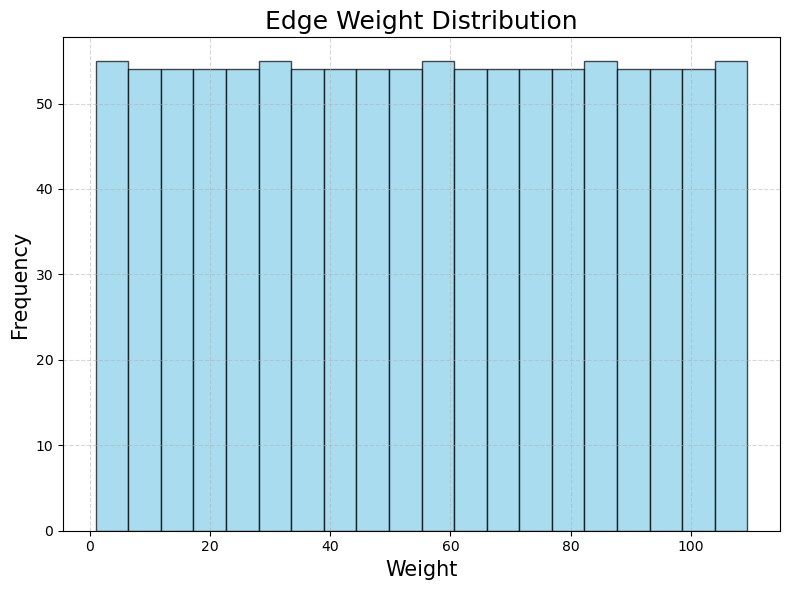

In [148]:
# Weight Distributions
edge_weights = [data['weight'] for _, _, data in superstar_network_restricted.edges(data=True)]

plt.figure(figsize=(8, 6))
plt.hist(edge_weights, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Weight', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Edge Weight Distribution', size=18)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* The distribution of edge weights reveals how the recommendation strengths are spread across the network. 
* As the weight distribution appears random and does not reflect a clear pattern, it may indicate a more varied or unpredictable influence of recommendation order on connection strength.

In [58]:
# Correlation Between node degree and edge weights (by using Pearson correlation coefficient)
node_weights = {}
for node in superstar_network_restricted.nodes():
    node_weight = sum(data['weight'] for _, _, data in superstar_network_restricted.edges(node, data=True)) # Calculate the sum of edge weights connected to each node
    node_weights[node] = node_weight
node_weight_values = np.array(list(node_weights.values()))
degree_values = np.array([superstar_network_restricted.degree(node) for node in superstar_network_restricted.nodes()])

correlation_coefficient, p_value = pearsonr(degree_values, node_weight_values)

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: 0.951908890737879
p-value: 9.639796116159999e-213


* The Pearson correlation coefficient between node degree and edge weights is 0.95, with a very low p-value (close to zero). This indicates a strong positive correlation between the two variables.
* In simpler terms, as the degree of a node (its number of connections) increases, the total weight of its edges also tends to increase significantly. This suggests that nodes with higher degrees tend to have stronger and more influential connections within the network.

### A6 - Weighted networks (Undirected Graph)

In [149]:
# Assign weights based on the Popularity attribute
for u, v in superstar_network_restricted_undirected.edges():
    popularity_u = superstar_network_restricted_undirected.nodes[u]['Popularity']
    popularity_v = superstar_network_restricted_undirected.nodes[v]['Popularity']
    weight = max(popularity_u, popularity_v)
    superstar_network_restricted_undirected[u][v]['weight'] = weight
    
# View results
print(superstar_network_restricted_undirected.edges(data=True))

[('Clara Luciani', 'Juliette Armanet', {'weight': 57}), ('Clara Luciani', 'Julien Doré', {'weight': 60}), ('Clara Luciani', 'Hoshi', {'weight': 63}), ('Clara Luciani', 'Zazie', {'weight': 57}), ('Clara Luciani', 'Camélia Jordana', {'weight': 57}), ('Clara Luciani', 'Eddy de Pretto', {'weight': 57}), ('Clara Luciani', 'Les Frangines', {'weight': 57}), ('Clara Luciani', '-M-', {'weight': 57}), ('Clara Luciani', 'Grand Corps Malade', {'weight': 60}), ('Clara Luciani', 'Calogero', {'weight': 59}), ('Clara Luciani', 'Marc Lavoine', {'weight': 57}), ('Clara Luciani', 'Angèle', {'weight': 66}), ('Clara Luciani', 'Christophe Willem', {'weight': 57}), ('Clara Luciani', 'Vianney', {'weight': 65}), ('Clara Luciani', 'Jenifer', {'weight': 57}), ('Clara Luciani', 'Gaëtan Roussel', {'weight': 57}), ('Clara Luciani', 'Suzane', {'weight': 57}), ('Clara Luciani', 'Benjamin Biolay', {'weight': 57}), ('Clara Luciani', 'Michel Berger', {'weight': 57}), ('Clara Luciani', 'Therapie TAXI', {'weight': 60}), (

In [150]:
# Calculate node strength
strength = dict(superstar_network_restricted_undirected.degree(weight='weight'))

# View results
print("Strength:", strength)

Strength: {'Clara Luciani': 1292, 'Juliette Armanet': 1435, 'Julien Doré': 1331, 'Hoshi': 1644, 'Zazie': 1567, 'Camélia Jordana': 1148, 'Eddy de Pretto': 1294, 'Les Frangines': 1249, '-M-': 1487, 'Grand Corps Malade': 1275, 'Calogero': 1243, 'Marc Lavoine': 1094, 'Angèle': 990, 'Christophe Willem': 1247, 'Vianney': 1496, 'Jenifer': 1261, 'Gaëtan Roussel': 1401, 'Suzane': 925, 'Benjamin Biolay': 635, 'Michel Berger': 495, 'Therapie TAXI': 855, 'Izïa': 724, 'Brigitte': 639, 'Fishbach': 148, 'Feu! Chatterton': 581, 'Ben Mazué': 918, 'Zaho de Sagazan': 682, 'Véronique Sanson': 218, 'Marie-Flore': 265, 'Adé': 622, 'Étienne Daho': 403, 'Jean-Louis Aubert': 1254, 'Raphaël': 1333, 'Pascal Obispo': 959, 'BB Brunes': 945, 'Bénabar': 1235, 'Florent Pagny': 959, 'Olivia Ruiz': 1397, 'Christophe Maé': 1164, 'Claudio Capéo': 1462, 'Trois Cafés Gourmands': 1071, 'Pierre de Maere': 464, 'Boulevard des Airs': 1012, 'Mentissa': 598, 'Louane': 888, 'Arcadian': 913, 'Slimane': 899, 'Jérémy Frerot': 982, '

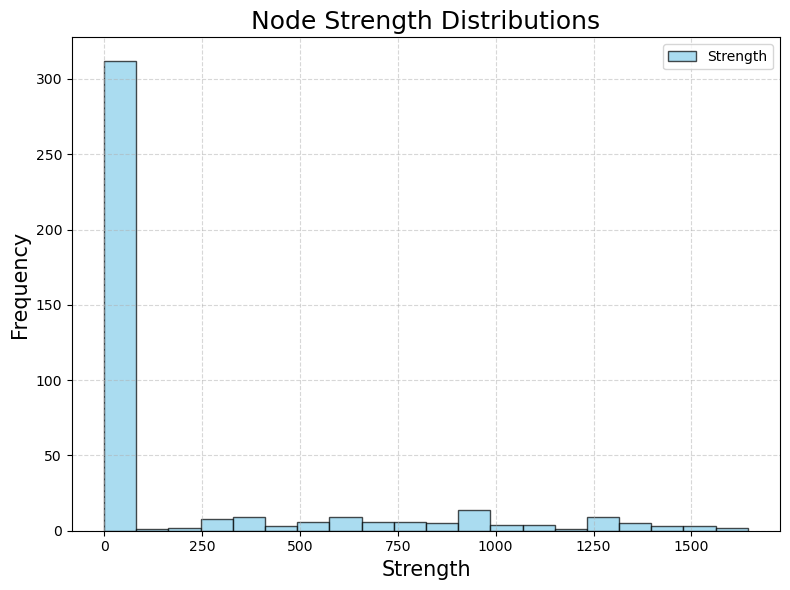

In [151]:
# Strength Distributions
strength_values = list(strength.values())

plt.figure(figsize=(8, 6))
plt.hist(strength_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Strength')
plt.xlabel('Strength', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Node Strength Distributions', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* This histogram show the distribution of node strengths in the network. Since the strength is weighted by artist popularity, this plot highlights how influence (through recommendations) is distributed among artists. By weighting connections based on artist popularity, node strength distributions provide a measure of influence within the network. High-strength nodes could signify influential artists within the recommendation network. 

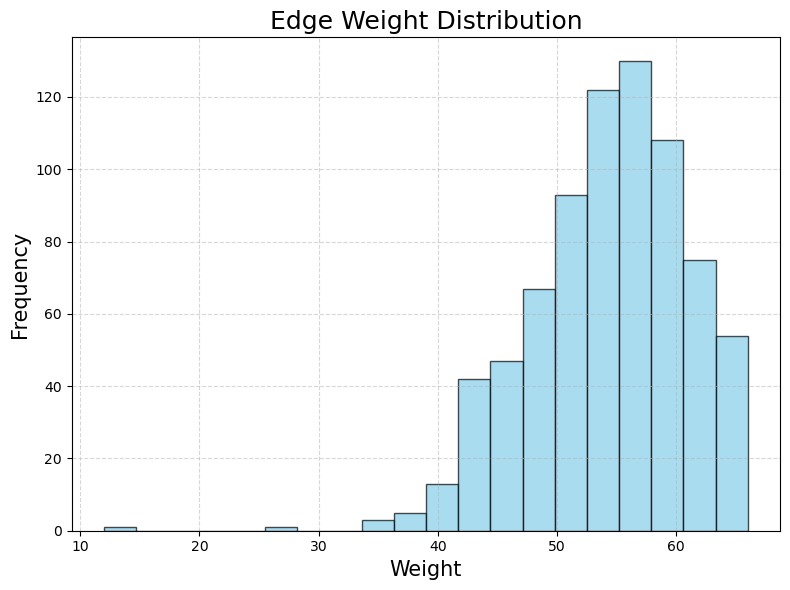

In [152]:
# Weight Distributions
edge_weights = [data['weight'] for _, _, data in superstar_network_restricted_undirected.edges(data=True)]

plt.figure(figsize=(8, 6))
plt.hist(edge_weights, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Weight', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Edge Weight Distribution', size=18)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* The distribution of edge weights reveals how the recommendation strengths are spread across the network. 
* As the weight distribution appears random and does not reflect a clear pattern, it may indicate a more varied or unpredictable influence of recommendation order on connection strength.

In [153]:
# Correlation Between node degree and edge weights (by using Pearson correlation coefficient)
node_weights = {}
for node in superstar_network_restricted_undirected.nodes():
    node_weight = sum(data['weight'] for _, _, data in superstar_network_restricted_undirected.edges(node, data=True)) # Calculate the sum of edge weights connected to each node
    node_weights[node] = node_weight
node_weight_values = np.array(list(node_weights.values()))
degree_values = np.array([superstar_network_restricted_undirected.degree(node) for node in superstar_network_restricted_undirected.nodes()])

correlation_coefficient, p_value = pearsonr(degree_values, node_weight_values)

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9949632395694386
p-value: 0.0


* The Pearson correlation coefficient between node degree and edge weights is 0.99, with a very low p-value (close to zero). This indicates a strong positive correlation between the two variables.
* In simpler terms, as the degree of a node (its number of connections) increases, the total weight of its edges also tends to increase significantly. This suggests that nodes with higher degrees tend to have stronger and more influential connections within the network.

In [154]:
# Weight assignment based on the order of recommendation
def assign_weight_based_on_recommendation_order(G):
    sorted_edges = sorted(G.edges(), key=lambda x: x[1])  
    weight_value = 1.0 
    for u, v in sorted_edges:
        G[u][v]['weight'] = weight_value
        weight_value += 0.1  
assign_weight_based_on_recommendation_order(superstar_network_restricted_undirected)

# View results
print(superstar_network_restricted_undirected.edges(data=True))

[('Clara Luciani', 'Juliette Armanet', {'weight': 38.60000000000028}), ('Clara Luciani', 'Julien Doré', {'weight': 38.400000000000276}), ('Clara Luciani', 'Hoshi', {'weight': 32.700000000000195}), ('Clara Luciani', 'Zazie', {'weight': 75.99999999999996}), ('Clara Luciani', 'Camélia Jordana', {'weight': 15.499999999999963}), ('Clara Luciani', 'Eddy de Pretto', {'weight': 20.90000000000003}), ('Clara Luciani', 'Les Frangines', {'weight': 43.200000000000344}), ('Clara Luciani', '-M-', {'weight': 1.0}), ('Clara Luciani', 'Grand Corps Malade', {'weight': 28.200000000000134}), ('Clara Luciani', 'Calogero', {'weight': 15.099999999999964}), ('Clara Luciani', 'Marc Lavoine', {'weight': 49.20000000000043}), ('Clara Luciani', 'Angèle', {'weight': 5.699999999999997}), ('Clara Luciani', 'Christophe Willem', {'weight': 17.499999999999982}), ('Clara Luciani', 'Vianney', {'weight': 71.50000000000021}), ('Clara Luciani', 'Jenifer', {'weight': 36.00000000000024}), ('Clara Luciani', 'Gaëtan Roussel', {'w

In [155]:
# Calculate node strength
strength = dict(superstar_network_restricted_undirected.degree(weight='weight'))

# View results
print("Strength:", strength)

Strength: {'Clara Luciani': 846.0000000000042, 'Juliette Armanet': 970.1000000000037, 'Julien Doré': 683.9000000000032, 'Hoshi': 1045.7000000000055, 'Zazie': 1243.2000000000055, 'Camélia Jordana': 901.4000000000052, 'Eddy de Pretto': 770.1000000000042, 'Les Frangines': 814.500000000005, '-M-': 972.3000000000062, 'Grand Corps Malade': 691.3000000000042, 'Calogero': 695.7000000000037, 'Marc Lavoine': 918.9000000000067, 'Angèle': 513.8000000000036, 'Christophe Willem': 768.500000000004, 'Vianney': 1032.6000000000047, 'Jenifer': 826.6000000000056, 'Gaëtan Roussel': 816.300000000005, 'Suzane': 891.8000000000055, 'Benjamin Biolay': 325.6000000000009, 'Michel Berger': 470.3000000000037, 'Therapie TAXI': 607.1000000000043, 'Izïa': 474.8000000000019, 'Brigitte': 366.50000000000136, 'Fishbach': 115.50000000000057, 'Feu! Chatterton': 370.00000000000153, 'Ben Mazué': 484.50000000000114, 'Zaho de Sagazan': 644.500000000002, 'Véronique Sanson': 266.60000000000105, 'Marie-Flore': 201.40000000000174, 

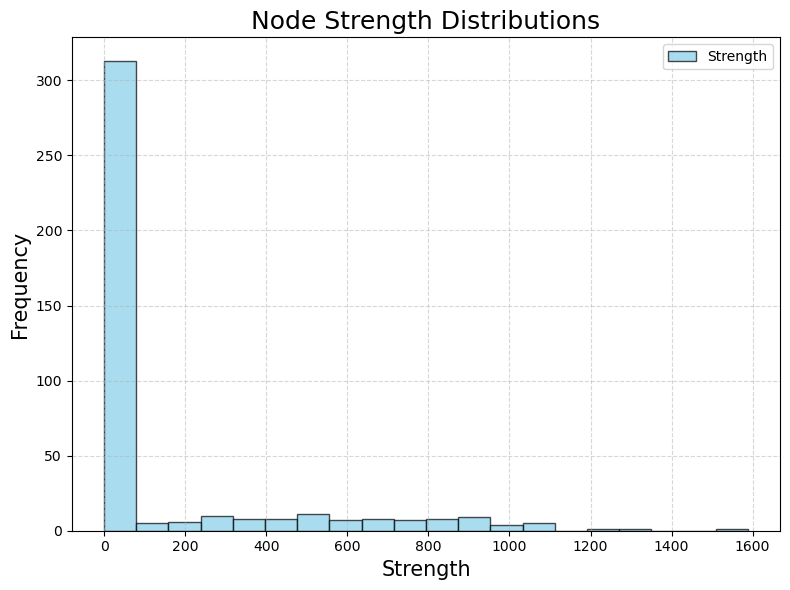

In [156]:
# Strength Distributions
strength_values = list(strength.values())

plt.figure(figsize=(8, 6))
plt.hist(strength_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Strength')
plt.xlabel('Strength', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Node Strength Distributions', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* This histogram show the distribution of node strengths in the network. Since the strength is weighted by artist popularity, this plot highlights how influence (through recommendations) is distributed among artists. By weighting connections based on artist's order, node strength distributions provide a measure of influence within the network. High-strength nodes could signify influential artists within the recommendation network.

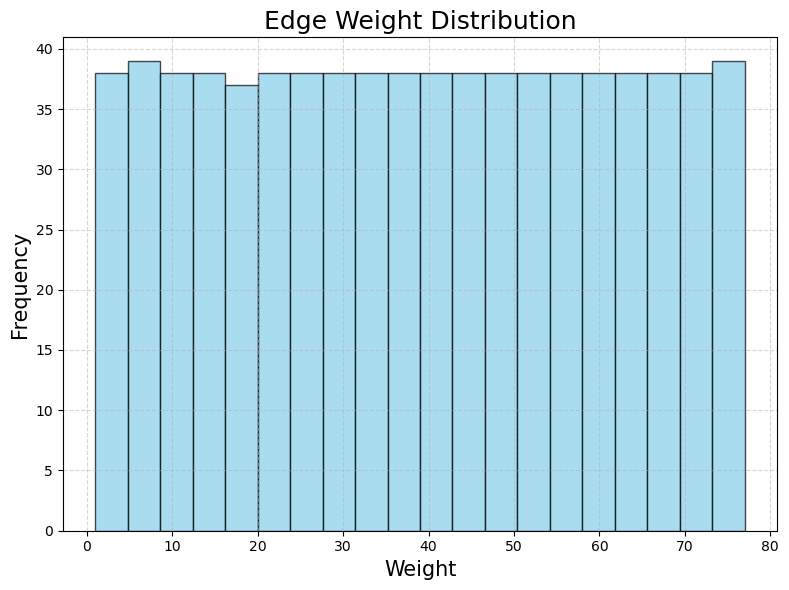

In [157]:
# Weight Distributions
edge_weights = [data['weight'] for _, _, data in superstar_network_restricted_undirected.edges(data=True)]

plt.figure(figsize=(8, 6))
plt.hist(edge_weights, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Weight', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Edge Weight Distribution', size=18)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* The distribution of edge weights reveals how the recommendation strengths are spread across the network. 
* As the weight distribution appears random and does not reflect a clear pattern, it may indicate a more varied or unpredictable influence of recommendation order on connection strength.

In [158]:
# Correlation Between node degree and edge weights (by using Pearson correlation coefficient)
node_weights = {}
for node in superstar_network_restricted_undirected.nodes():
    node_weight = sum(data['weight'] for _, _, data in superstar_network_restricted_undirected.edges(node, data=True)) # Calculate the sum of edge weights connected to each node
    node_weights[node] = node_weight
node_weight_values = np.array(list(node_weights.values()))
degree_values = np.array([superstar_network_restricted_undirected.degree(node) for node in superstar_network_restricted_undirected.nodes()])

correlation_coefficient, p_value = pearsonr(degree_values, node_weight_values)

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9471741403618514
p-value: 1.3497794319504743e-204


### A7 - Rich Club (Undirected Graph)

In [159]:
superstar_network_undirected = nx.read_edgelist('Clara_Luciani_Network_names.txt', create_using=nx.Graph(), delimiter=', ', data=False)
superstar_network_restricted_undirected = nx.Graph()

for node in superstar_network.nodes():
    if superstar_network.out_degree(node) > 0:
        superstar_network_restricted_undirected.add_node(node)
        for succ in superstar_network.successors(node):
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted_undirected.add_edge(node, succ)

print(superstar_network_restricted_undirected.number_of_edges())

761


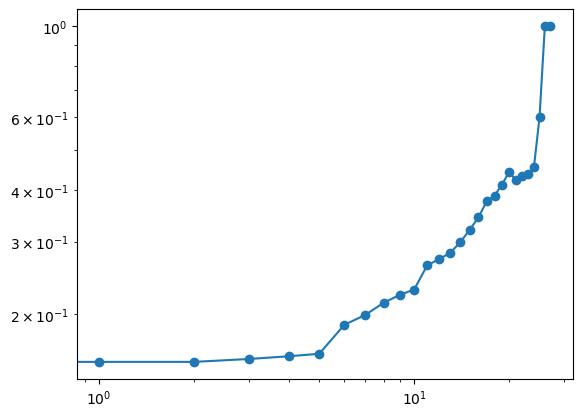

In [160]:
superstar_network_restricted_undirected.remove_edges_from(nx.selfloop_edges(superstar_network_restricted_undirected))
rc = nx.rich_club_coefficient(superstar_network_restricted_undirected, normalized=False, seed=42)
plt.loglog(rc.keys(),rc.values(),'o-')

* Each point on the graph represents the rich club coefficient at a certain node degree.
* The plotted points form a curve that rises sharply, suggests the presence of rich clubs in the network, where highly connected nodes tend to form tightly interconnected groups. The higher the line, the stronger the tendency for rich clubs to form in the network.

## B -Dynamical network property

### B1 - The Robustness (Undirected Graph based on random failure)

In [161]:
nodes_small=[i for i in superstar_network_restricted_undirected.nodes() if superstar_network_restricted_undirected.degree(i)>5]
len(nodes_small)

97

In [162]:
Gs= superstar_network_restricted_undirected.subgraph(nodes_small)
fList=np.linspace(0,1,20)
NtoRem=[int(i*Gs.number_of_nodes()) for i in fList]
print(NtoRem)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 51, 56, 61, 66, 71, 76, 81, 86, 91, 97]


In [163]:
sf=[]
for nn in NtoRem[:-3]:
    thisG=Gs.copy()
    ll=random.sample(list(Gs.nodes()),nn)
    thisG.remove_nodes_from(ll)
    thisSf=len(max(sorted(nx.connected_components(thisG), key = len, reverse=True)))
    sf.append(thisSf/float(Gs.number_of_nodes()))

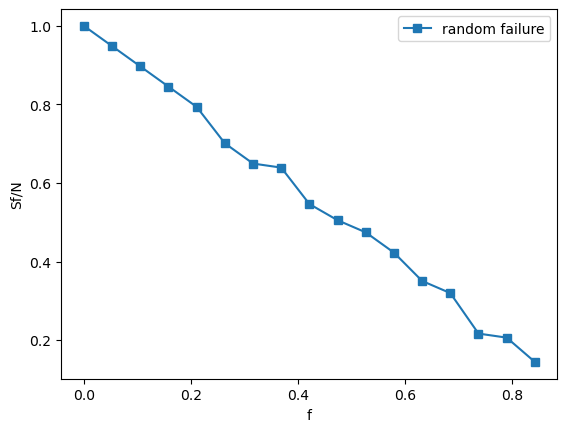

In [164]:
plt.plot(fList[:-3],sf,'s-',label='random failure')
plt.xlabel('f')
plt.ylabel('Sf/N')
plt.legend()
plt.show()

* This graph illustrates the network's resilience to random node failures.

* As more nodes are removed, the normalized size of the largest connected component decreases. This indicates that the network becomes more fragmented and less resilient to random failures. The downward trend in the curve suggests that even a small fraction of node removal can significantly impact the network's connectivity. This information is crucial for understanding the network's robustness and designing strategies to enhance its resilience against random failures.
* As we have a gradual decline suggests greater resilience, it indicates that even with the removal of nodes, the network remains relatively well-connected.

### B2 - The Robustness (Undirected Graph based on centrality) : Target Attack

In [165]:
centrality_measure = nx.degree_centrality(superstar_network_restricted_undirected)
nodes_sorted_by_centrality = sorted(centrality_measure, key=centrality_measure.get, reverse=True)
fList = np.linspace(0, 1, 20)
NtoRem = [int(i * len(nodes_sorted_by_centrality)) for i in fList]

In [166]:
sf = []
for nn in NtoRem[:-3]:
    thisG = superstar_network_restricted_undirected.copy()
    nodes_to_remove = nodes_sorted_by_centrality[:nn]
    thisG.remove_nodes_from(nodes_to_remove)
    largest_cc_size = len(max(nx.connected_components(thisG), key=len))
    sf.append(largest_cc_size / float(len(superstar_network_restricted_undirected)))

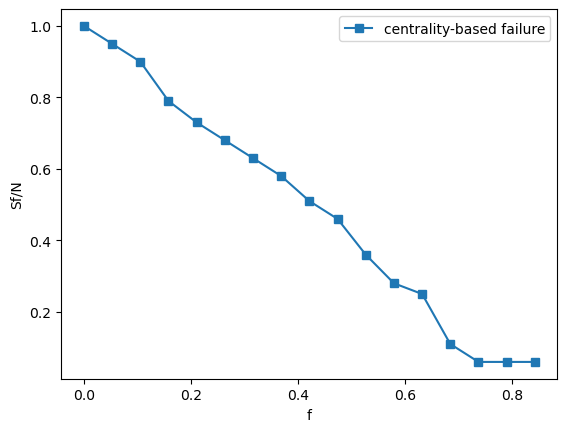

In [167]:
plt.plot(fList[:-3], sf, 's-', label='centrality-based failure')
plt.xlabel('f')
plt.ylabel('Sf/N')
plt.legend()
plt.show()

* In this case, the robustness analysis involves targeted removal of nodes based on centrality measures (degree centrality). The resulting graph can highlight the importance of specific artists within the network. Nodes with high centrality values that, when removed, lead to a significant reduction in network connectivity, may represent key influencers or central figures within the music industry.
* As the centrality-based failure line decreases gradually as more nodes are removed, it indicates that the network is relatively robust to targeted attacks on highly central nodes. So even if highly central nodes are removed, the network can still maintain its overall connectivity reasonably well.

### B3 - Page rank (Directed Graph)

In [168]:
PR = nx.pagerank(superstar_network_restricted)
sorted_PR = sorted(PR.items(), key=lambda x: x[1], reverse=True)

# View results
print("PageRank values for each artist (in descending order):")
for artist, rank in sorted_PR:
    print(f"{artist}: {rank}")

PageRank values for each artist (in descending order):
Têtes Raides: 0.038035542112846855
Les Ogres De Barback: 0.03634369349225223
Pascal Obispo: 0.021866107429889425
Renan Luce: 0.020142319534120483
Les Innocents: 0.019458009798134224
Yannick Noah: 0.017929646048862533
Nolwenn Leroy: 0.01712606023381865
Olivia Ruiz: 0.016856167276918622
Zazie: 0.015018000776144565
Patrick Fiori: 0.0141926591344964
Les Enfoirés: 0.013954524445023046
Raphaël: 0.013515378158933819
Jean-Louis Aubert: 0.013111894404692945
Mickey 3d: 0.012790473850541384
Marc Lavoine: 0.012734583733416564
Grégoire: 0.01270920043313976
Lou: 0.012294199954203864
La Grande Sophie: 0.011963792278299412
Kids United Nouvelle Generation: 0.01121040947667968
Rose: 0.010205179232071739
Maurane: 0.010139926060079761
Les Rita Mitsouko: 0.00989887728519253
Therapie TAXI: 0.009743715508098414
Élodie Frégé: 0.009706145531426631
Étienne Daho: 0.0095782278957538
Emmanuel Moire: 0.009537767364402053
Jenifer: 0.009194019714683963
Green Team

* PageRank measures the importance of each artist in the network based on the structure of connections.
* Artists with higher PageRank values are more influential and are likely to be recommended more frequently.
* Conversely, artists with lower PageRank values may have less influence and may be recommended less often.

### B4 - Page rank (Undirected Graph)

In [169]:
PR = nx.pagerank(superstar_network_restricted_undirected)
sorted_PR = sorted(PR.items(), key=lambda x: x[1], reverse=True)

# View results
print("PageRank values for each artist (in descending order):")
for artist, rank in sorted_PR:
    print(f"{artist}: {rank}")

PageRank values for each artist (in descending order):
Juliette Armanet: 0.01703497566553606
Les Frangines: 0.016843853728244308
Renan Luce: 0.016702174672676595
-M-: 0.01644014255302498
Hoshi: 0.015952308122597965
Olivia Ruiz: 0.015904301556418435
Zazie: 0.015863197492127144
Eddy de Pretto: 0.015218490478442488
Gaëtan Roussel: 0.01496632459929892
Bénabar: 0.01457907947477748
Claudio Capéo: 0.014436011481386275
Jean-Louis Aubert: 0.014235268955212307
Les Enfoirés: 0.014187086710329871
Grégoire: 0.014138306479006239
Raphaël: 0.01390370139512691
Christophe Willem: 0.013779599028353367
Clara Luciani: 0.013557214047414176
Vianney: 0.013504518063354445
Camélia Jordana: 0.013365224474892702
Jenifer: 0.013328497800305891
Julien Doré: 0.012907586403481214
Emmanuel Moire: 0.012631632417991817
Grand Corps Malade: 0.012475987315665424
Les Innocents: 0.012138461772517845
Calogero: 0.012133761852989818
Cali: 0.012129991381334408
Suzane: 0.012123572744736332
Mickey 3d: 0.012047398857272684
Marc Lavo

### B5 - Community detection (Directed Graph)

In [170]:
# Assign weights based on the Popularity attribute
for u, v in superstar_network_restricted.edges():
    popularity_u = superstar_network_restricted.nodes[u]['Popularity']
    popularity_v = superstar_network_restricted.nodes[v]['Popularity']
    weight = max(popularity_u, popularity_v)
    superstar_network_restricted[u][v]['weight'] = weight
    
# View results
print(superstar_network_restricted.edges(data=True))

[('Clara Luciani', 'Juliette Armanet', {'weight': 57}), ('Clara Luciani', 'Julien Doré', {'weight': 60}), ('Clara Luciani', 'Hoshi', {'weight': 63}), ('Clara Luciani', 'Zazie', {'weight': 57}), ('Clara Luciani', 'Camélia Jordana', {'weight': 57}), ('Clara Luciani', 'Eddy de Pretto', {'weight': 57}), ('Clara Luciani', 'Les Frangines', {'weight': 57}), ('Clara Luciani', '-M-', {'weight': 57}), ('Clara Luciani', 'Grand Corps Malade', {'weight': 60}), ('Clara Luciani', 'Calogero', {'weight': 59}), ('Clara Luciani', 'Marc Lavoine', {'weight': 57}), ('Clara Luciani', 'Angèle', {'weight': 66}), ('Clara Luciani', 'Christophe Willem', {'weight': 57}), ('Clara Luciani', 'Vianney', {'weight': 65}), ('Clara Luciani', 'Jenifer', {'weight': 57}), ('Clara Luciani', 'Gaëtan Roussel', {'weight': 57}), ('Clara Luciani', 'Suzane', {'weight': 57}), ('Clara Luciani', 'Benjamin Biolay', {'weight': 57}), ('Clara Luciani', 'Michel Berger', {'weight': 57}), ('Clara Luciani', 'Therapie TAXI', {'weight': 60}), (

In [171]:
C = nx.community.louvain_communities(superstar_network_restricted, weight='weight', resolution=0.6)
community_artists = {}
for i, community in enumerate(C):
    community_frozenset = frozenset(community)
    community_artists[i] = community_frozenset

# View results
for community_id, community_frozenset in community_artists.items():
    print(f"Community {community_id}: {community_frozenset}")


Community 0: frozenset({'Marie-Flore', 'Orelsan', 'Hyphen Hyphen', 'Pomme', 'Gaël Faye', 'Bigflo & Oli', 'Pierre de Maere', 'Tim Dup', 'Grand Corps Malade', 'Casseurs Flowters', 'Eddy de Pretto', 'Adé', 'Zaho de Sagazan', 'Therapie TAXI', 'Feu! Chatterton', 'Fauve', 'Angèle', 'Yseult', 'Fishbach', 'Ben Mazué', 'Roméo Elvis', 'Suzane', 'Juliette Armanet', 'Hoshi', 'Brigitte', 'Clara Luciani', 'Izïa'})
Community 1: frozenset({'Green Team', 'Carla', 'Erza Muqoli', 'Kids United Nouvelle Generation', 'Angelina', 'Lou'})
Community 2: frozenset({'Cali', 'La Grande Sophie', 'Les Innocents', 'Raphaël', 'Élodie Frégé', 'Tété', 'Les Ogres De Barback', 'Dionysos', 'Axel Bauer', 'Olivia Ruiz', 'Gauvain Sers', '-M-', 'Jean-Louis Aubert', 'Renan Luce', 'Vanessa Paradis', 'Alain Bashung', 'Gaëtan Roussel', 'Camélia Jordana', 'Bénabar', 'Les Rita Mitsouko', 'Mickey 3d', 'Étienne Daho', 'Sinsémilia', 'Têtes Raides', 'Rose', 'Julien Doré', 'Yodelice', 'Anaïs', 'BB Brunes', 'Noir Désir', 'De Palmas', 'Ben

* Louvain community detection indicate the modular structure, revealing clusters or communities of artists within the network. Artists within the same community may have similar attributes or be part of a common genre or label, and they are more densely connected to each other than to artists outside their community.
* Community 0: This community comprises a diverse range of popular artists with high scores of popularity, suggesting that they share similar fan bases or frequently collaborate with each other. These artists may belong to similar music genres or have overlapping audiences, leading to strong connections within the community.
* Community 1: This community consists of artists who may have distinct styles or appeal to a specific niche audience. Despite being smaller in size compared to Community 0, the artists within this community share commonalities that make them more closely connected to each other than to artists outside the community. The presence of artists like Taylor Swift, Justin Bieber, and Shawn Mendes in the same community indicates commonalities in their music or audience demographics.
* Community 2: Artists in this community may have unique characteristics or appeal to a particular demographic, resulting in a distinct cluster within the network. The smaller size of this community suggests a tighter-knit group with more specialized connections.
* Community 3: FINNEAS appears to be a standalone artist in a community of their own, indicating a unique position within the network. This could be due to factors such as a distinct musical style, solo career, or limited collaborations with other artists in the dataset.
* Overall, the communities reflect the underlying structure of the network and provide insights into how artists are interconnected based on their popularity scores and possibly other factors like musical genres, collaborations, or audience demographics.

In [172]:
communities = nx.community.greedy_modularity_communities(superstar_network_restricted)

# Afficher les communautés détectées
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

Community 1: frozenset({'Louane', 'Grégory Lemarchal', 'Christophe Maé', 'Maurane', 'Boulevard des Airs', 'Zazie', 'Fréro Delavega', 'Calogero', 'Emmanuel Moire', 'Michel Berger', 'Les Frangines', 'Joyce Jonathan', 'Les Enfoirés', 'Vianney', 'Patrick Fiori', 'Véronique Sanson', 'Arcadian', 'Jérémy Frerot', 'Claudio Capéo', 'Jenifer', 'Grégoire', 'Pascal Obispo', 'Nolwenn Leroy', 'Marc Lavoine', 'Slimane', 'Yannick Noah', 'Florent Pagny', 'Jean-Jacques Goldman', 'De Palmas', 'Trois Cafés Gourmands', 'Amir', 'Christophe Willem'})
Community 2: frozenset({'Cali', 'La Grande Sophie', 'Les Innocents', 'Élodie Frégé', 'Raphaël', 'Tété', 'Les Ogres De Barback', 'Dionysos', 'Olivia Ruiz', 'Gauvain Sers', 'Axel Bauer', 'Renaud', '-M-', 'Jean-Louis Aubert', 'Vanessa Paradis', 'Renan Luce', 'Alain Bashung', 'Gaëtan Roussel', 'Bénabar', 'Mickey 3d', 'Les Rita Mitsouko', 'Étienne Daho', 'Sinsémilia', 'Têtes Raides', 'Rose', 'Yodelice', 'Anaïs', 'BB Brunes', 'Noir Désir', 'Benjamin Biolay', 'Matmatah

* The modularity score measures the strength of division of a network into communities. A higher modularity score indicates a stronger community structure.
* The detected communities provide insights into the underlying structure of the superstar network. Artists within the same community may share common traits, genres, collaborations, or fan bases. Understanding these communities can help identify clusters of related artists and uncover underlying patterns or trends in the music industry.

### B6 - Community detection (Undirected Graph)

In [173]:
C = nx.community.louvain_communities(superstar_network_restricted_undirected, weight='weight', resolution=0.6)
community_artists = {}
for i, community in enumerate(C):
    community_frozenset = frozenset(community)
    community_artists[i] = community_frozenset

# View results
for community_id, community_frozenset in community_artists.items():
    print(f"Community {community_id}: {community_frozenset}")

Community 0: frozenset({'Grégory Lemarchal', 'Louane', 'Christophe Maé', 'Maurane', 'Boulevard des Airs', 'Zazie', 'Fréro Delavega', 'Calogero', 'Renaud', 'Emmanuel Moire', 'Michel Berger', 'Les Frangines', 'Les Enfoirés', 'Joyce Jonathan', 'Vianney', 'Patrick Fiori', 'Hoshi', 'Véronique Sanson', 'Mentissa', 'Arcadian', 'Jérémy Frerot', 'Claudio Capéo', 'Jenifer', 'Bigflo & Oli', 'Grégoire', 'Pascal Obispo', 'Grand Corps Malade', 'Nolwenn Leroy', 'Marc Lavoine', 'Slimane', 'Yannick Noah', 'Florent Pagny', 'Julien Doré', 'Jean-Jacques Goldman', 'De Palmas', 'Trois Cafés Gourmands', 'Amir', 'Christophe Willem'})
Community 1: frozenset({'Marie-Flore', 'Orelsan', 'Hyphen Hyphen', 'Clara Luciani', 'Pomme', 'Gaël Faye', 'Pierre de Maere', 'Tim Dup', 'Casseurs Flowters', 'Adé', 'Zaho de Sagazan', 'Therapie TAXI', 'Feu! Chatterton', 'Fauve', 'Angèle', 'Yseult', 'Fishbach', 'Ben Mazué', 'Suzane', 'Roméo Elvis', 'Juliette Armanet', 'Eddy de Pretto', 'Izïa'})
Community 2: frozenset({'Green Team',

* Overall, the community detection algorithm has effectively grouped artists based on their network connections, providing insights into the underlying structure of the music network and potential relationships between artists.
* Community 0: This community includes artists like Miley Cyrus, Lady Gaga, Cardi B, and others. These artists likely share similar characteristics or musical styles, leading to strong connections within this group.
* Community 1: Artists such as Taylor Swift, Ed Sheeran, Ariana Grande, and Justin Bieber are grouped together in this community. These artists might have overlapping fan bases, collaborations, or similar genres, resulting in their close association within the network.
* Community 2: This community consists of a diverse range of artists including girl in red, Arctic Monkeys, Olivia Rodrigo, and Billie Eilish. While they may not have direct collaborations, they might share thematic elements or appeal to similar audiences, leading to their clustering within this community.
* There are no standalone artists in a community of their own.

In [174]:
communities = nx.community.greedy_modularity_communities(superstar_network_restricted_undirected)

# Afficher les communautés détectées
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

Community 1: frozenset({'Louane', 'Grégory Lemarchal', 'Christophe Maé', 'Maurane', 'Boulevard des Airs', 'Zazie', 'Fréro Delavega', 'Calogero', 'Emmanuel Moire', 'Michel Berger', 'Les Frangines', 'Joyce Jonathan', 'Les Enfoirés', 'Hoshi', 'Vianney', 'Patrick Fiori', 'Mentissa', 'Véronique Sanson', 'Arcadian', 'Jérémy Frerot', 'Claudio Capéo', 'Jenifer', 'Bigflo & Oli', 'Grégoire', 'Pascal Obispo', 'Grand Corps Malade', 'Nolwenn Leroy', 'Marc Lavoine', 'Slimane', 'Yannick Noah', 'Florent Pagny', 'De Palmas', 'Jean-Jacques Goldman', 'Trois Cafés Gourmands', 'Amir', 'Christophe Willem'})
Community 2: frozenset({'Marie-Flore', 'Orelsan', 'Hyphen Hyphen', 'Camélia Jordana', 'Pomme', 'Pierre de Maere', 'Gaël Faye', 'Tim Dup', 'Eddy de Pretto', 'Casseurs Flowters', 'Adé', 'Zaho de Sagazan', 'Therapie TAXI', 'Feu! Chatterton', 'Julien Doré', 'Yodelice', 'Angèle', 'Fauve', 'Yseult', 'Fishbach', '-M-', 'Alain Bashung', 'Benjamin Biolay', 'Ben Mazué', 'Roméo Elvis', 'Suzane', 'Juliette Armanet',